In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd

# Try reading the file as a CSV instead of an XLS
try:
    df = pd.read_csv('/content/healthcare-dataset-stroke-data.xls')
    print("File loaded successfully as a CSV.")
except pd.errors.ParserError:
    print("File is not a valid CSV. Trying to repair or convert...")


df.head()

File loaded successfully as a CSV.


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
df.shape

(5110, 12)

# SMOKE Test

In [ ]:
import pandas as pd

def smoke_test(df):

    test_results = {}

    # Check if the DataFrame is empty
    test_results['is_empty'] = df.empty

    # Check for null values
    test_results['null_count'] = df.isnull().sum().sum()

    # Check for duplicate rows
    test_results['duplicate_rows'] = df.duplicated().sum()

    # Check column data types
    test_results['column_types'] = df.dtypes.to_dict()

    # Check basic statistics for numerical columns
    if not df.empty:
        test_results['basic_statistics'] = df.describe().to_dict()

    return test_results


# Run the smoke test
results = smoke_test(df)

# Print results
for key, value in results.items():
    print(f"{key}: {value}")


is_empty: False
null_count: 201
duplicate_rows: 0
column_types: {'id': dtype('int64'), 'gender': dtype('O'), 'age': dtype('float64'), 'hypertension': dtype('int64'), 'heart_disease': dtype('int64'), 'ever_married': dtype('O'), 'work_type': dtype('O'), 'Residence_type': dtype('O'), 'avg_glucose_level': dtype('float64'), 'bmi': dtype('float64'), 'smoking_status': dtype('O'), 'stroke': dtype('int64')}
basic_statistics: {'id': {'count': 5110.0, 'mean': 36517.82935420744, 'std': 21161.721624827136, 'min': 67.0, '25%': 17741.25, '50%': 36932.0, '75%': 54682.0, 'max': 72940.0}, 'age': {'count': 5110.0, 'mean': 43.226614481409, 'std': 22.61264672311352, 'min': 0.08, '25%': 25.0, '50%': 45.0, '75%': 61.0, 'max': 82.0}, 'hypertension': {'count': 5110.0, 'mean': 0.0974559686888454, 'std': 0.29660667423378534, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 0.0, 'max': 1.0}, 'heart_disease': {'count': 5110.0, 'mean': 0.05401174168297456, 'std': 0.22606298750336476, 'min': 0.0, '25%': 0.0, '50%': 0.0, '

# dropping the ID column

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
df

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0             Urban             228.69  36.6  formerly smoked       1  
1             Rural             202.21   NaN     never smoked       1  
2             Rural             105.92  32.5     never smoked       1  
3             Urban             171.23  34.4           smokes       1  
4             Rural             174.12  24.0     never smoked       1  
...             ...                ...   ...              ...     ...  
5105          Urban              83.75   NaN     never smoked       0  
5106          Urban             125.20  40.0     never smoked       0  
5107          Rural              82.99  30.6     never smoked       0  
5108          Rural             166.29  25.6  formerly smoked       0  
5109          Urban              85.28  26.2          Unknown       0  

[5110 rows x 11 columns]

# Discriptive statistics

In [ ]:
df.describe().to_csv('stroke_descriptive_stats.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# Missing Value handling

In [ ]:
# prompt: give missing value percentage

# Calculate missing value percentage for each column
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
# prompt: handle the missing values using iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with missing values

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the numerical columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Handle missing values in categorical columns (using mode imputation as an example)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Now 'df' has imputed missing values
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# EDA

In [ ]:
# prompt: apply label encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over categorical columns and apply label encoding
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now df has label encoded categorical features
print(df.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0           0.0            1.0             1          2   
1       0  61.0           0.0            0.0             1          3   
2       1  80.0           0.0            1.0             1          2   
3       0  49.0           0.0            0.0             1          2   
4       0  79.0           1.0            0.0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1     1.0  
1               0             202.21  30.972397               2     1.0  
2               0             105.92  32.500000               2     1.0  
3               1             171.23  34.400000               3     1.0  
4               0             174.12  24.000000               2     1.0  


In [ ]:

for column in categorical_cols:
  num_categories = df[column].nunique()
  print(f"Column '{column}' has {num_categories} categories.")


Column 'gender' has 3 categories.
Column 'ever_married' has 2 categories.
Column 'work_type' has 5 categories.
Column 'Residence_type' has 2 categories.
Column 'smoking_status' has 4 categories.


<ipython-input-13-01ef11fdfeaa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=specific_category_data, x='Column', y='Number of Categories', palette='viridis')


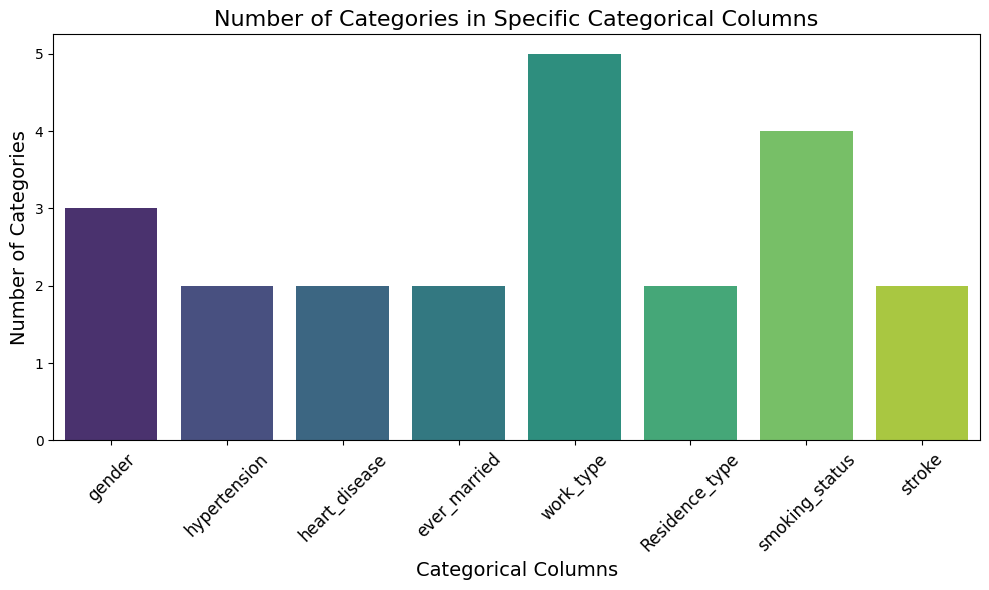

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'categorical_cols' is defined as before
# Defining specific columns and their counts
specific_category_counts = {
    'gender': 3,
    'hypertension': 2,
    'heart_disease': 2,
    'ever_married': 2,
    'work_type': 5,
    'Residence_type': 2,
    'smoking_status': 4,
    'stroke': 2
}

# Creating a dataframe for the specific columns
specific_category_data = pd.DataFrame({
    'Column': specific_category_counts.keys(),
    'Number of Categories': specific_category_counts.values()
})

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=specific_category_data, x='Column', y='Number of Categories', palette='viridis')
plt.title("Number of Categories in Specific Categorical Columns", fontsize=16)
plt.xlabel("Categorical Columns", fontsize=14)
plt.ylabel("Number of Categories", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-14-a020c2047c26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cmap)
<ipython-input-14-a020c2047c26>:6: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(x=col, data=df, palette=cmap)


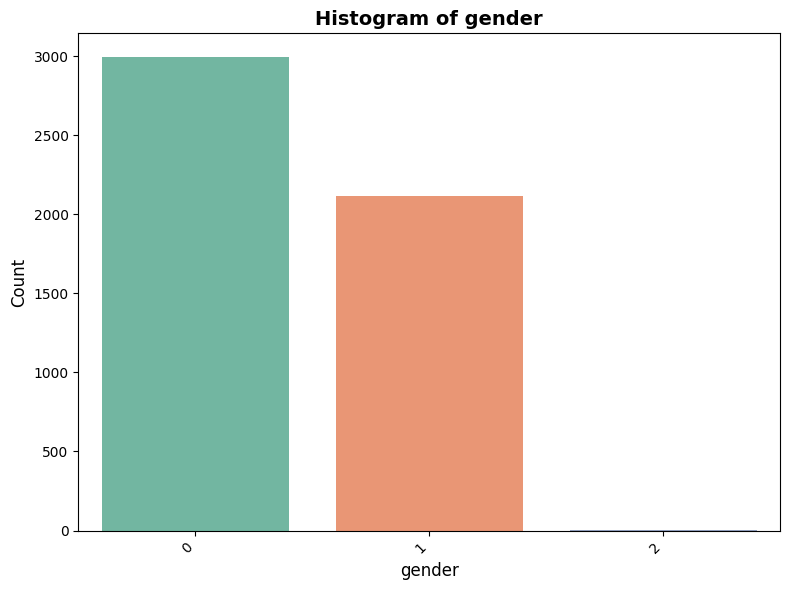

<ipython-input-14-a020c2047c26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cmap)
<ipython-input-14-a020c2047c26>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df, palette=cmap)


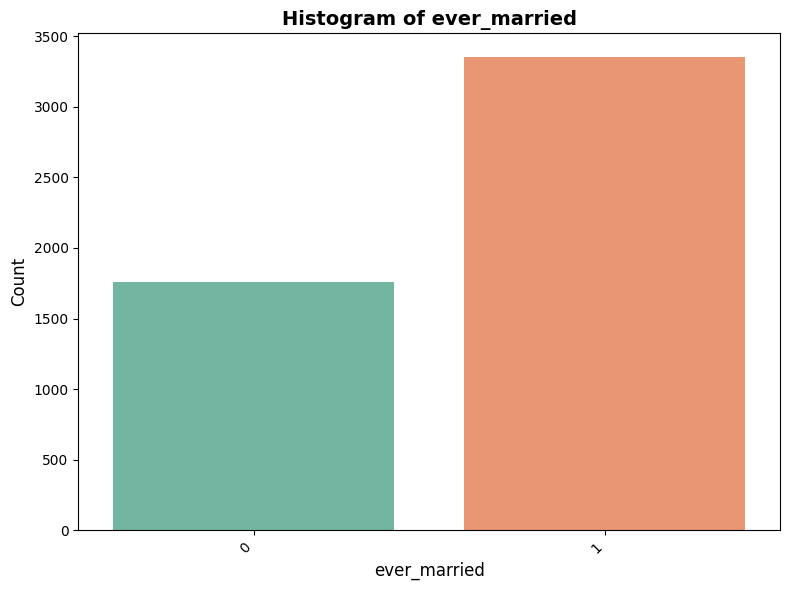

<ipython-input-14-a020c2047c26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cmap)
<ipython-input-14-a020c2047c26>:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(x=col, data=df, palette=cmap)


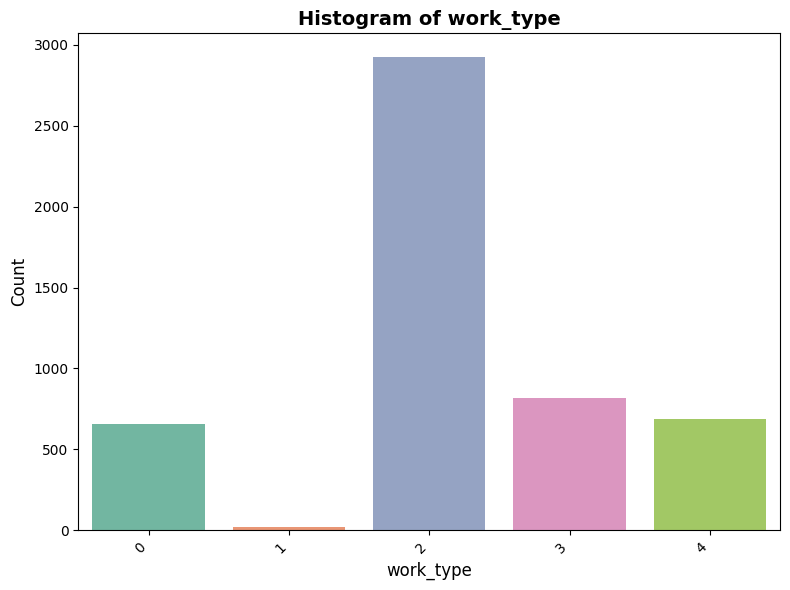

<ipython-input-14-a020c2047c26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cmap)
<ipython-input-14-a020c2047c26>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=col, data=df, palette=cmap)


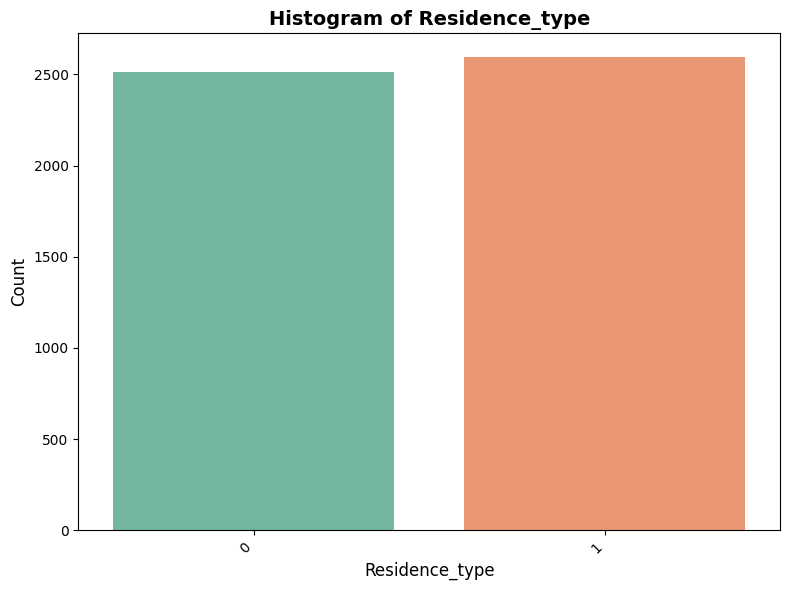

<ipython-input-14-a020c2047c26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette=cmap)
<ipython-input-14-a020c2047c26>:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x=col, data=df, palette=cmap)


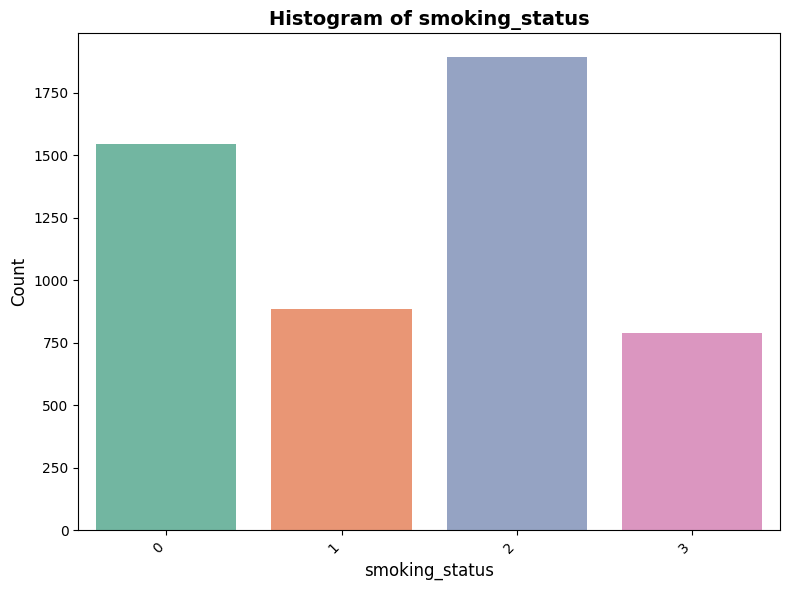

In [ ]:
# Using a colormap for the histograms
cmap = sns.color_palette("Set2")  # Choosing a colormap

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.countplot(x=col, data=df, palette=cmap)
    plt.title(f'Histogram of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.2/161.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (5110, 11)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  4
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of

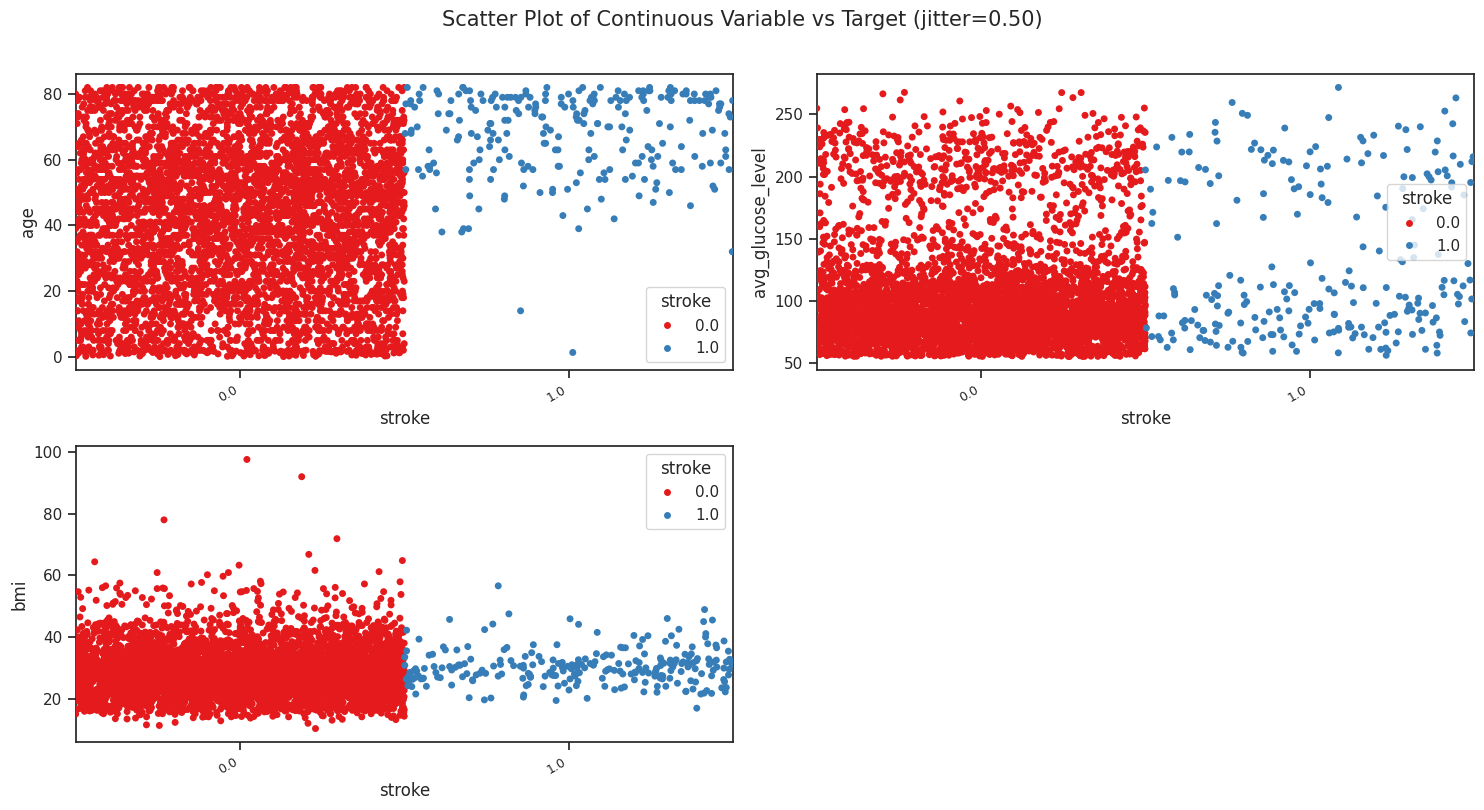

Total Number of Scatter Plots = 6


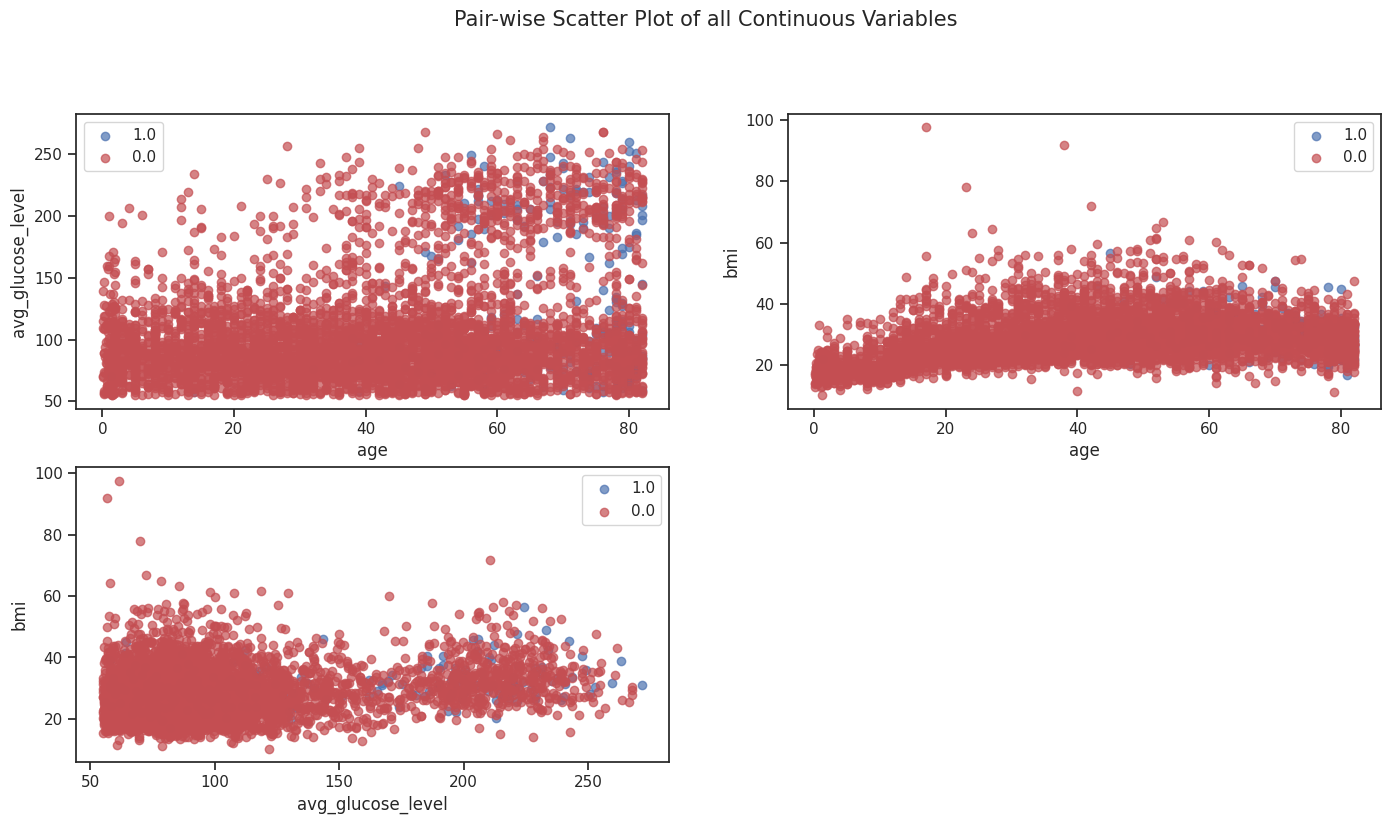

Could not draw some Distribution Plots 'numpy.float64' object has no attribute 'startswith'


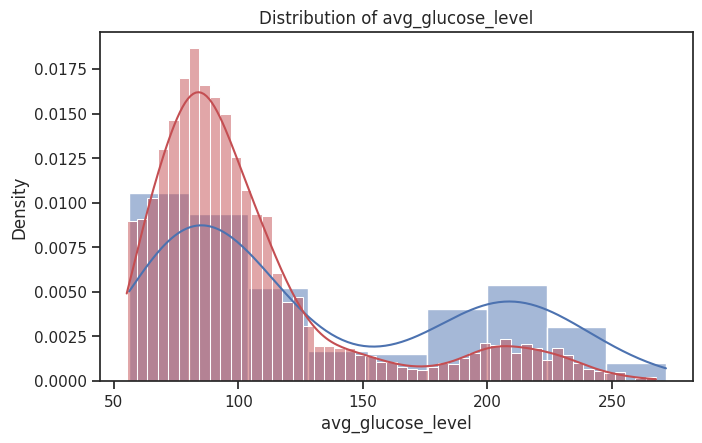

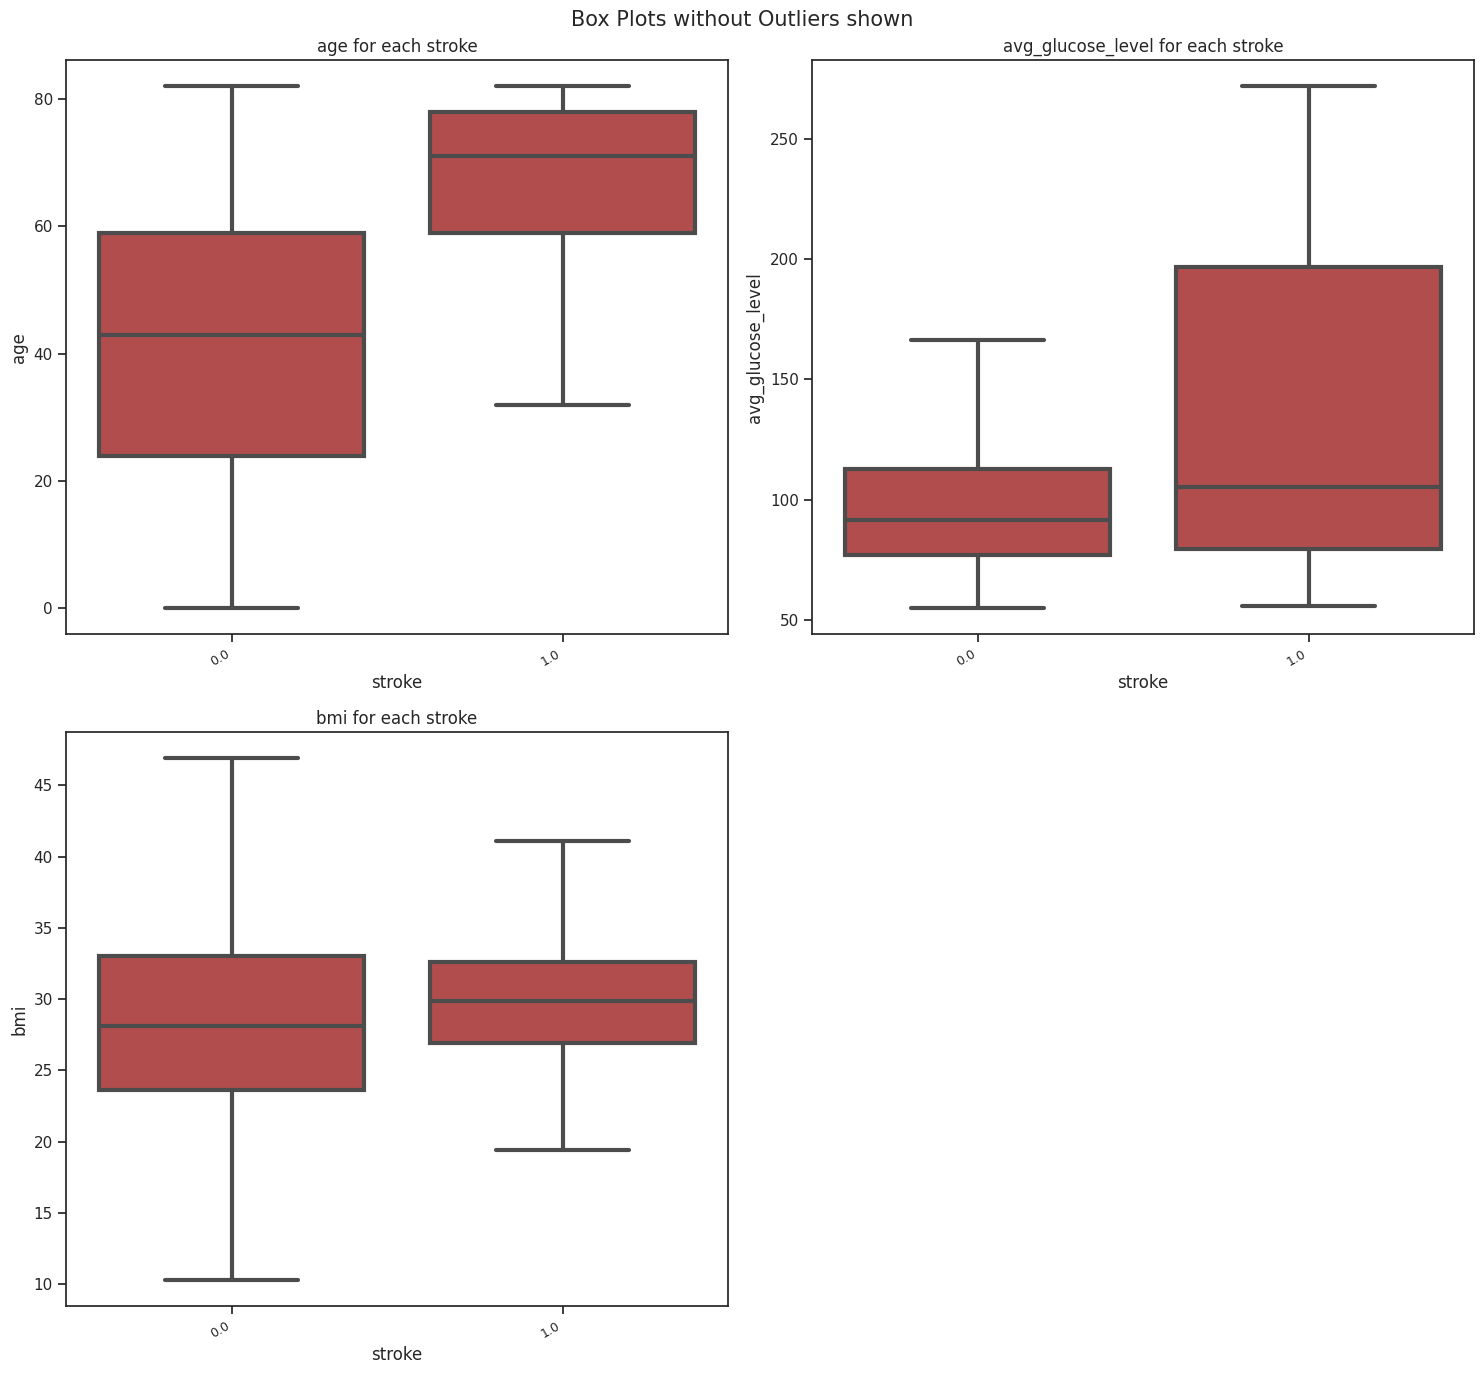

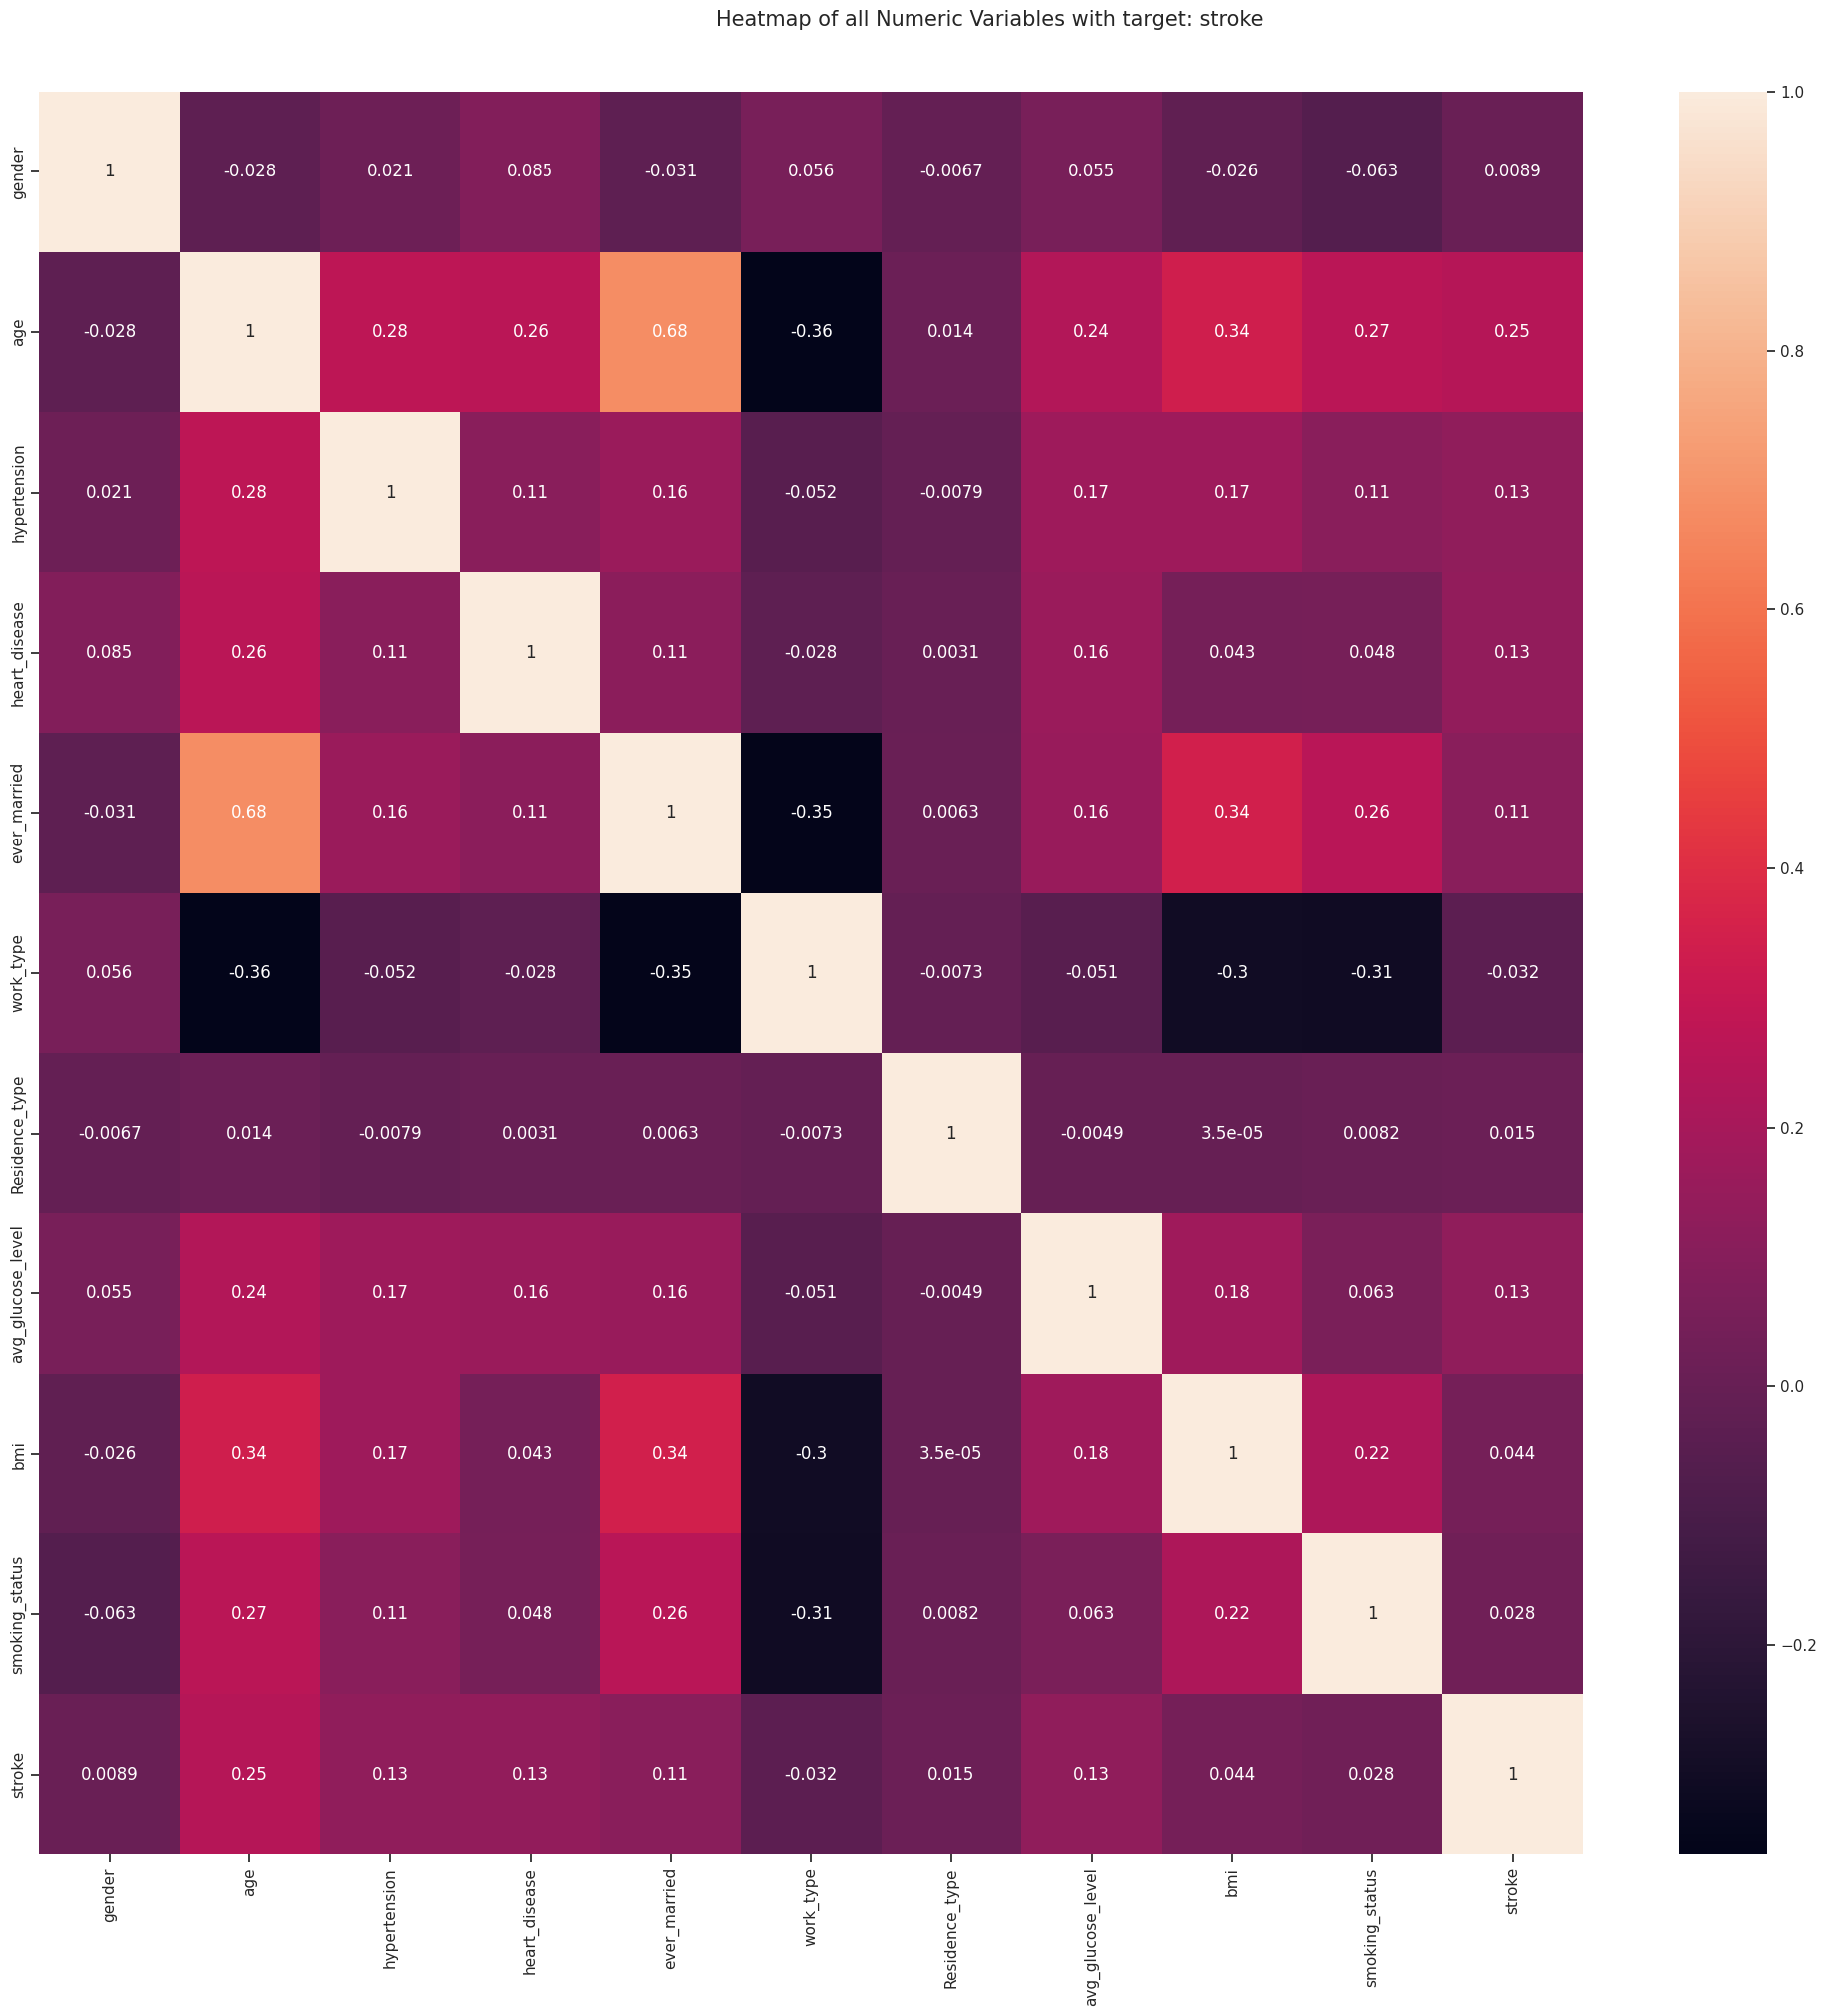

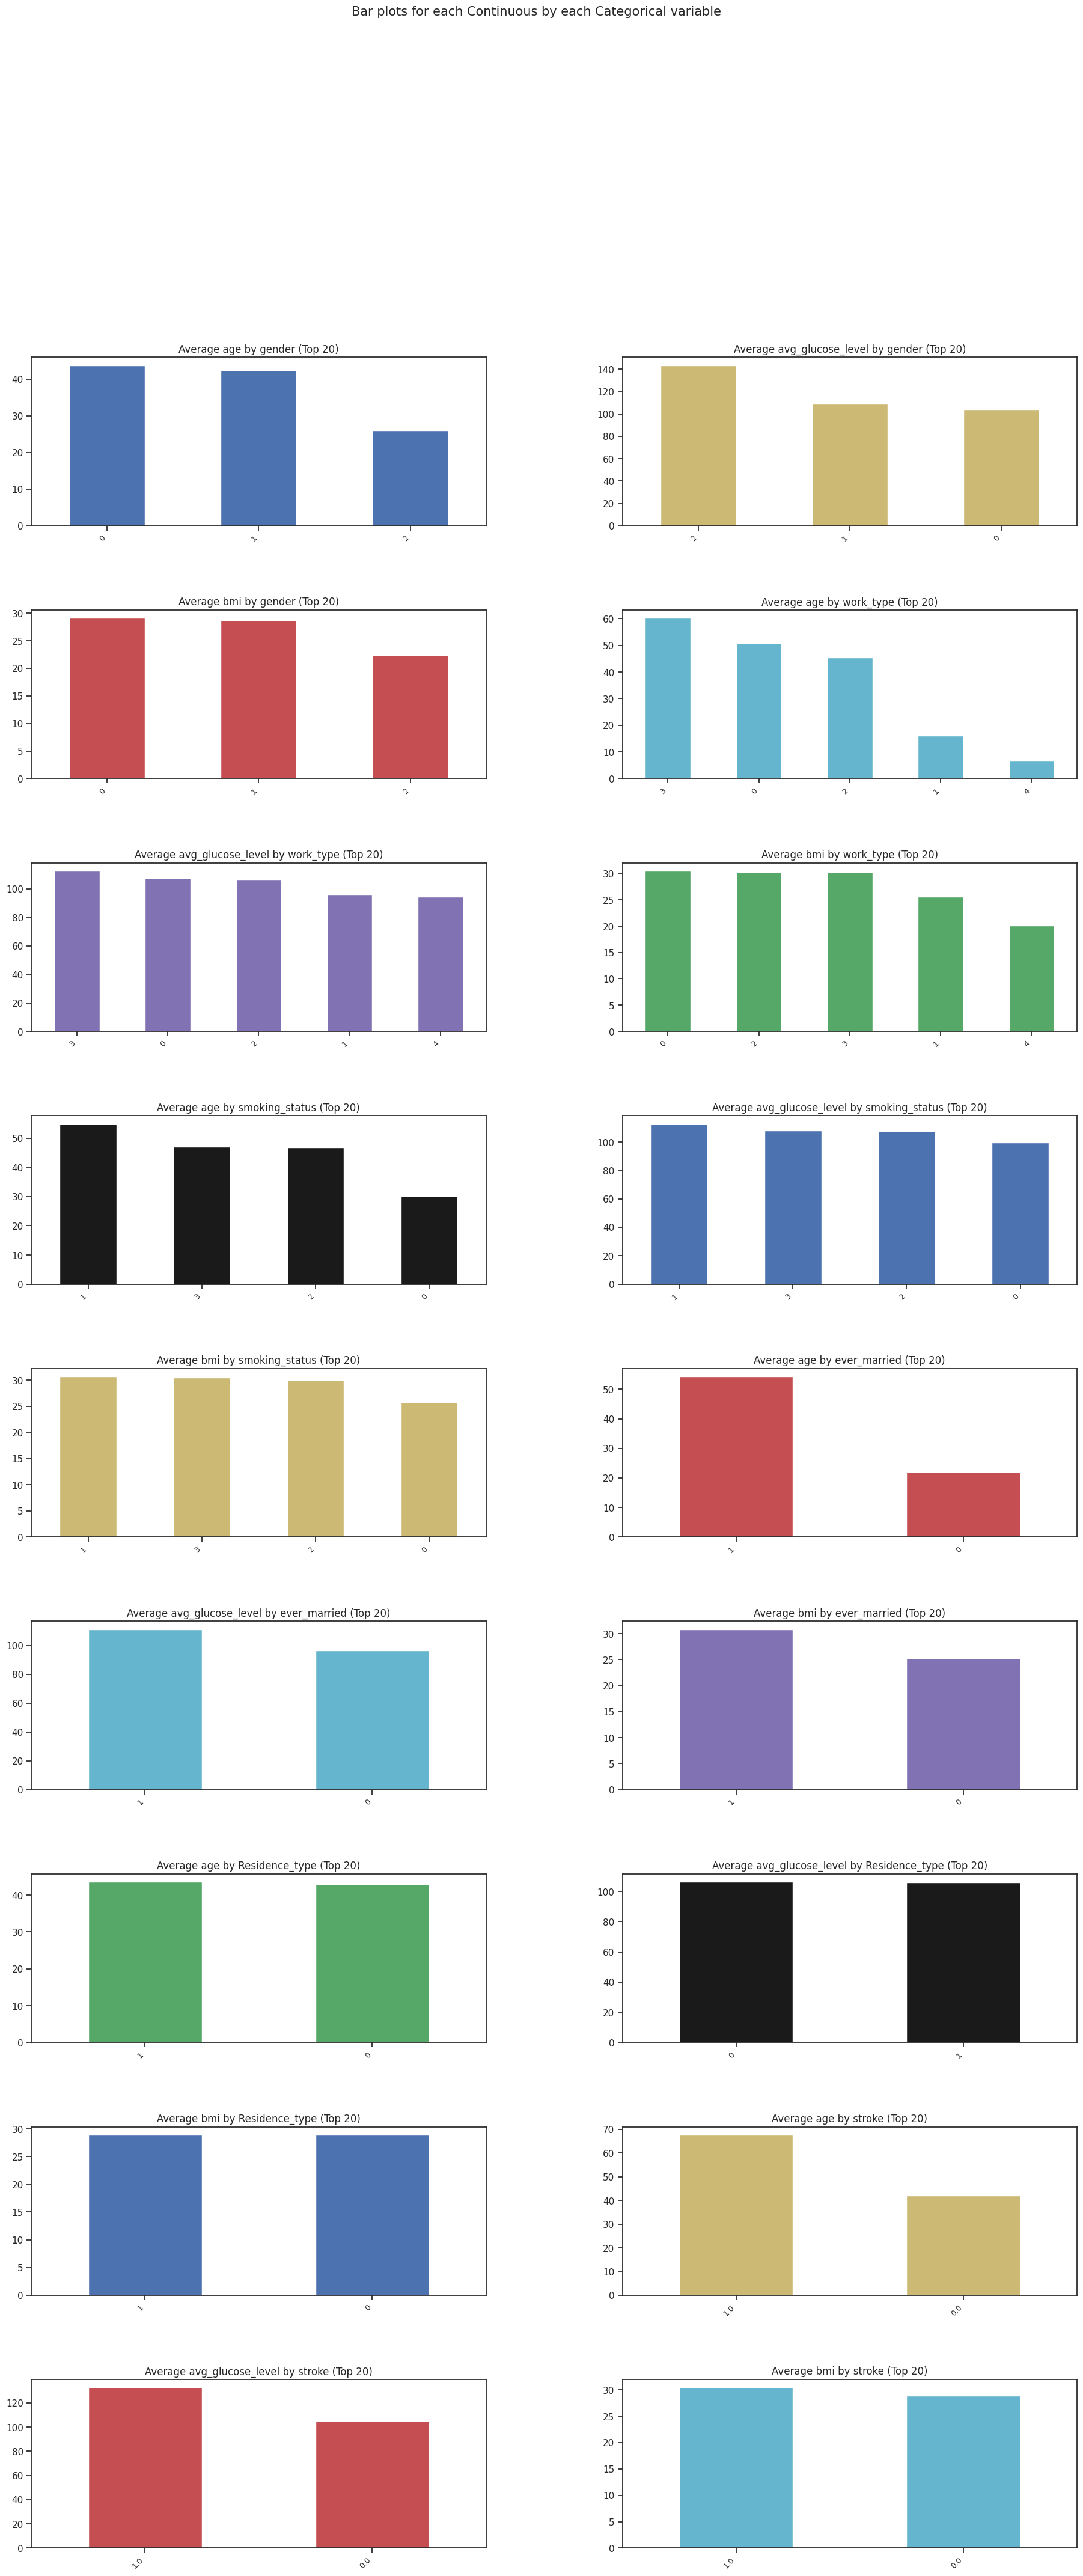

All Plots done
Time to run AutoViz = 21 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
#you have to specify the target variable
dft = AV.AutoViz(df, depVar = 'stroke')

In [ ]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']

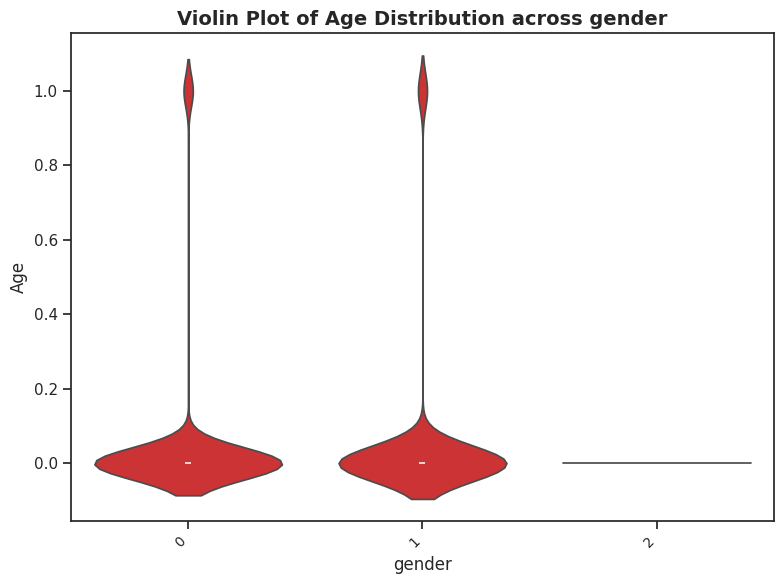

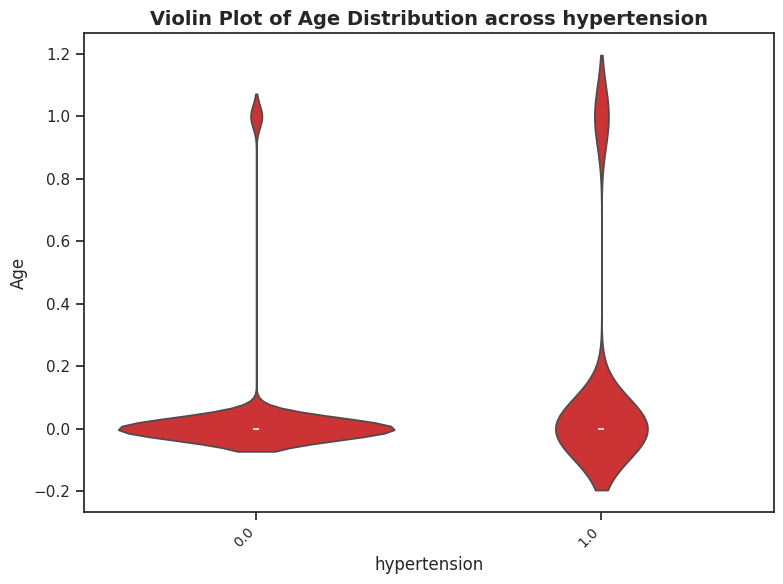

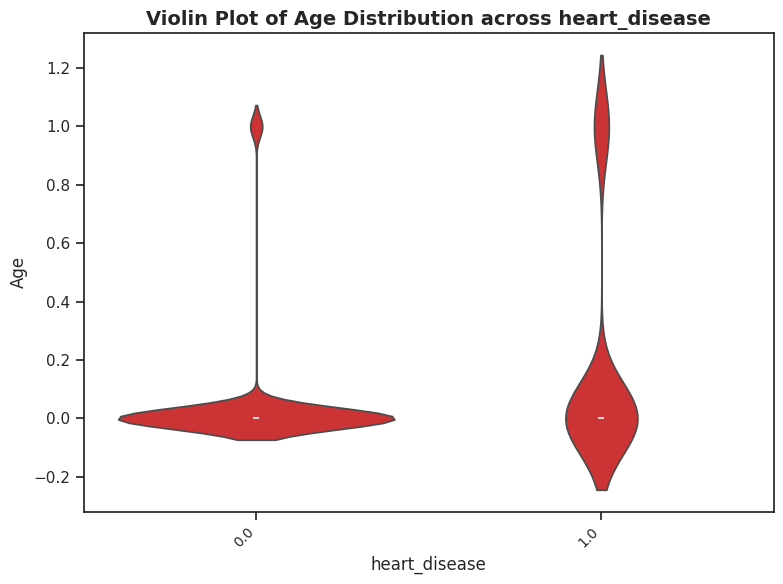

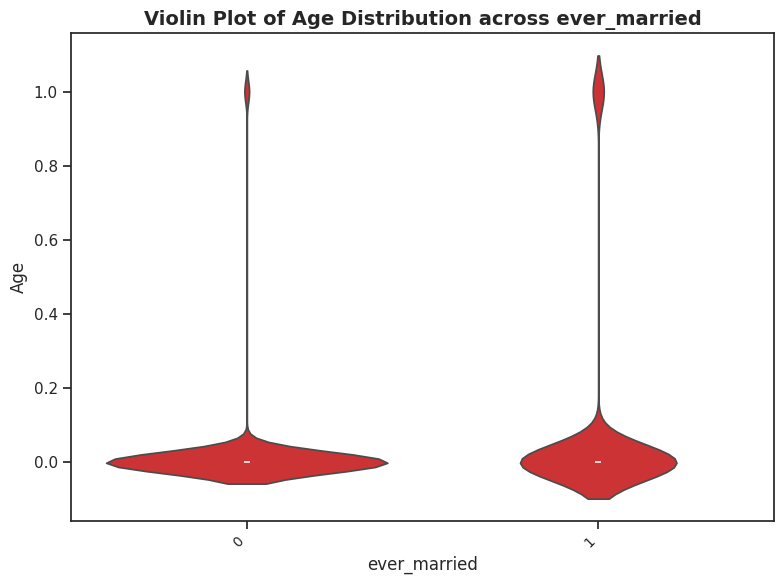

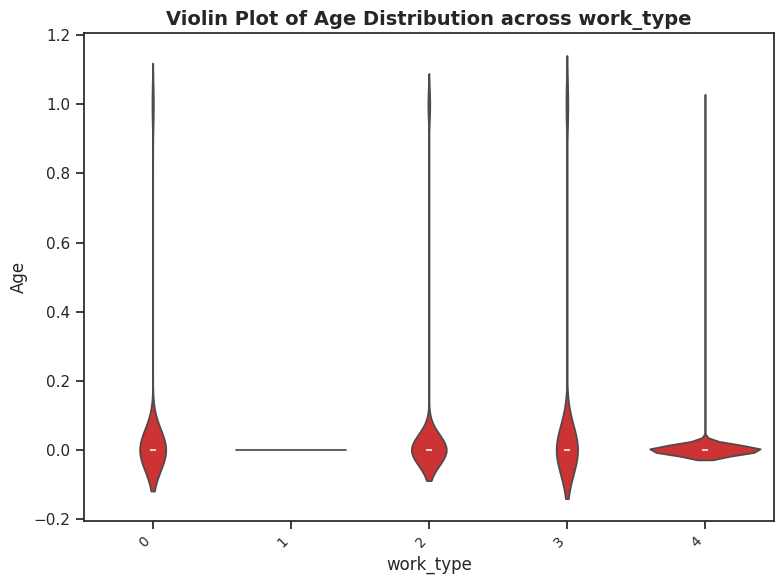

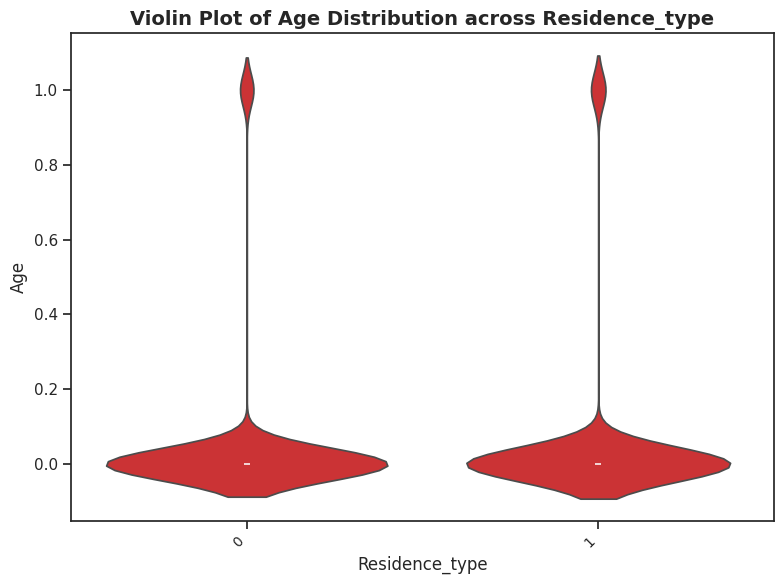

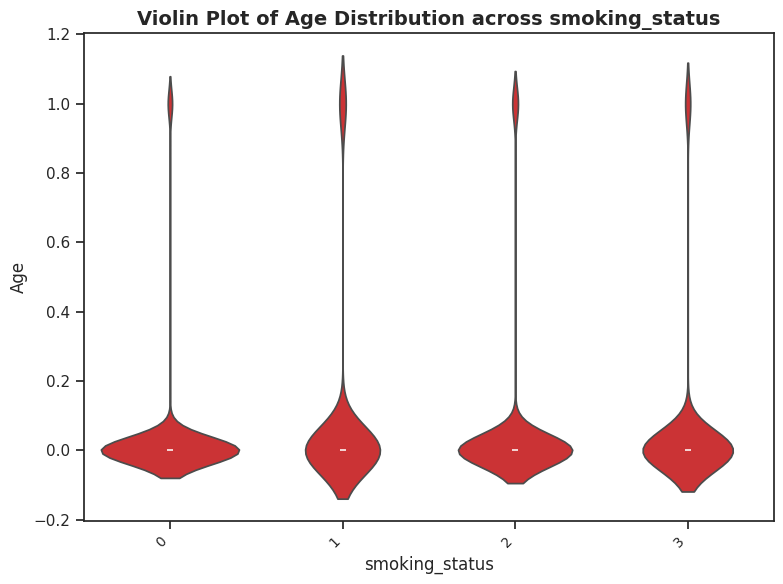

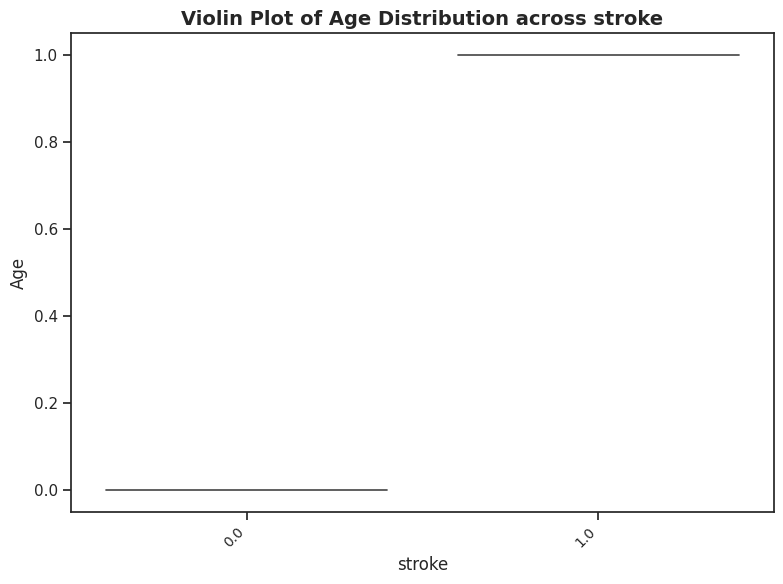

In [ ]:
# prompt: do violin plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'categorical_cols' is defined as before

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col, y='stroke', data=df) # Replace 'age' with your numerical column of interest
    plt.title(f'Violin Plot of Age Distribution across {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Age', fontsize=12) # Adjust y-axis label if necessary
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

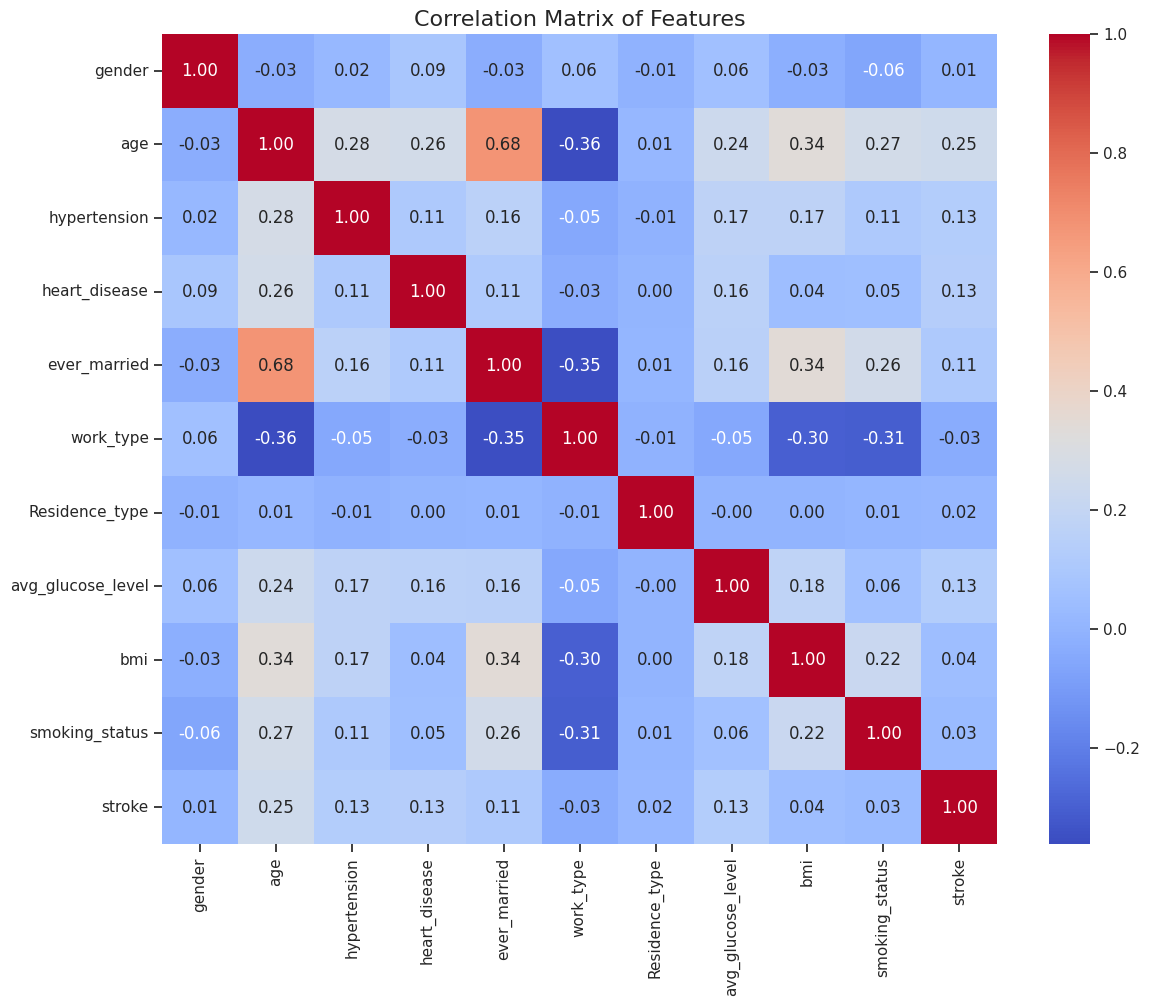

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

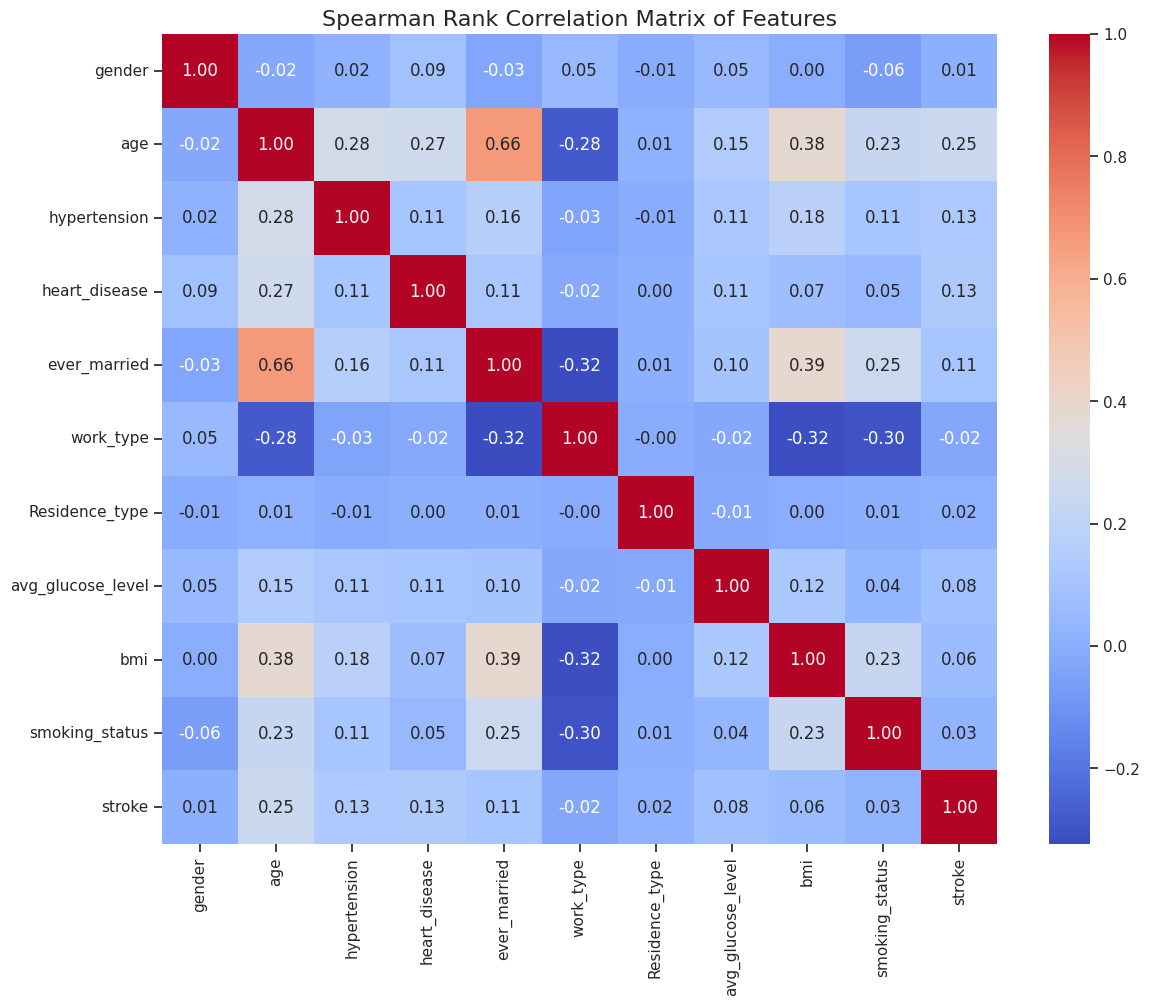

In [ ]:
spearman_corr = df.corr(method='spearman')

# Create a heatmap of the Spearman correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Rank Correlation Matrix of Features', fontsize=16)
plt.show()

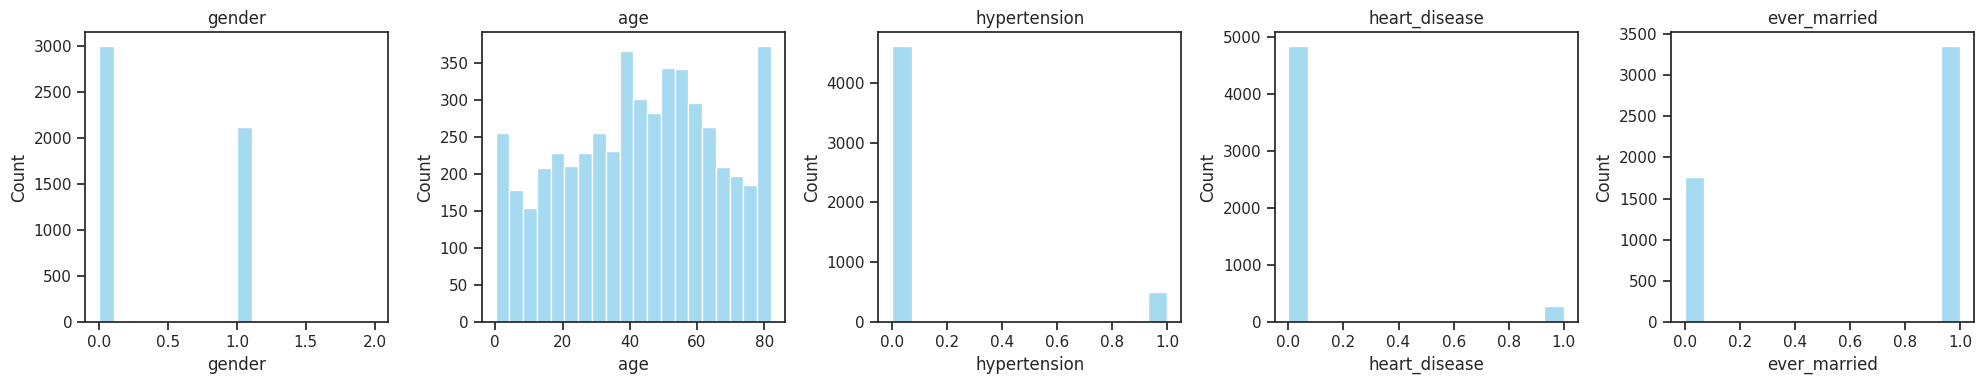

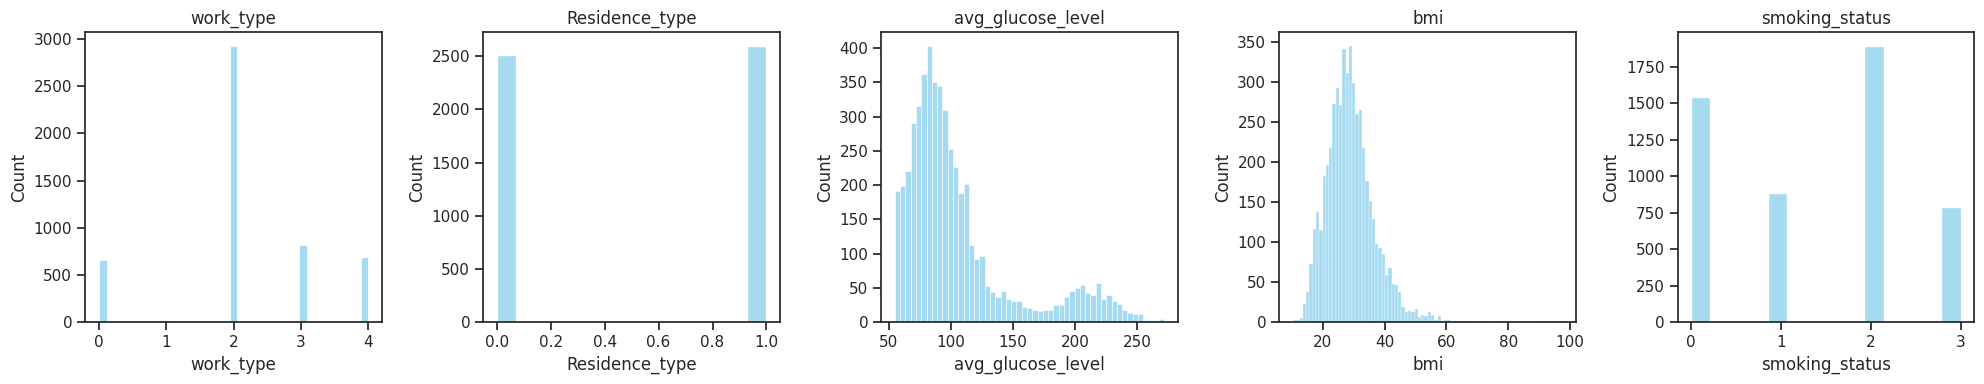

TypeError: 'Axes' object is not subscriptable

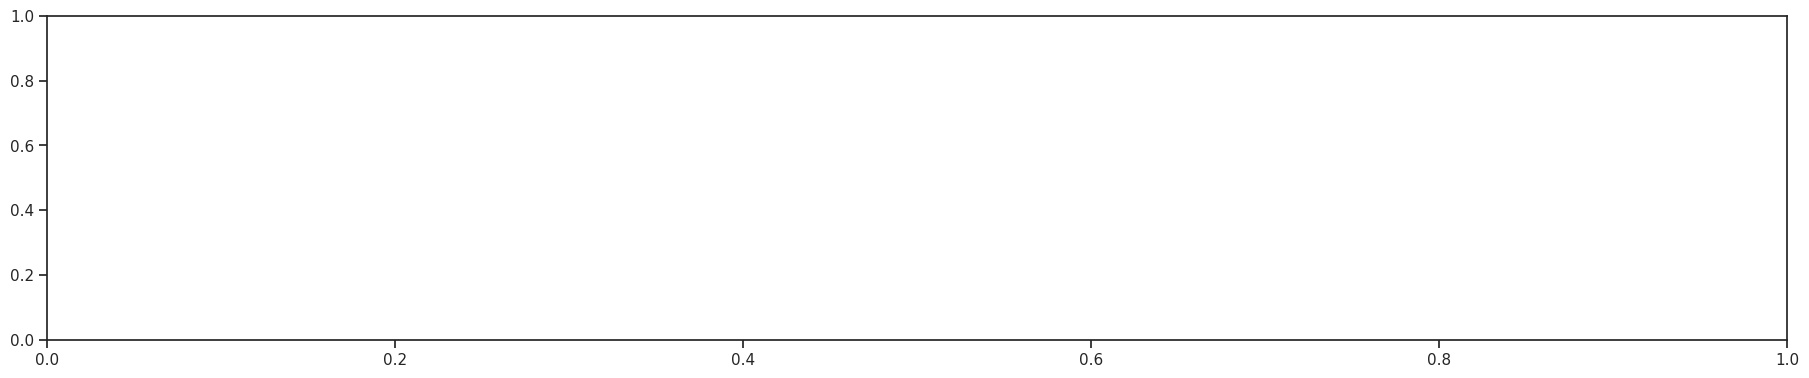

In [ ]:
# Select numeric columns from df
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Plotting numeric columns with subplots and removing unused subplots
for i in range(0, len(numeric_columns), 5):
    num_plots = min(5, len(numeric_columns) - i)  # Determine the number of plots for the current row
    fig, axs = plt.subplots(1, num_plots, figsize=(20, 4))

    for j in range(num_plots):
        sns.histplot(df[numeric_columns[i + j]], kde=False, ax=axs[j], color='skyblue')
        axs[j].set_title(numeric_columns[i + j])

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
# prompt: find partial correaltion amoung all the variables

from pingouin import partial_corr

# Assuming 'df' is your DataFrame containing the variables for which you want to calculate partial correlation

# Create an empty DataFrame to store the partial correlation results
partial_corr_results = pd.DataFrame(columns=['Variable1', 'Variable2', 'Partial Correlation', 'p-value'])

# Iterate through all pairs of variables
for i in range(len(df.columns)):
  for j in range(i + 1, len(df.columns)):
    var1 = df.columns[i]
    var2 = df.columns[j]

    # Calculate partial correlation controlling for all other variables
    other_vars = [col for k, col in enumerate(df.columns) if k != i and k != j]
    if len(other_vars)>0:
      partial_corr_result = partial_corr(data=df, x=var1, y=var2, covar=other_vars)

      # Append the results to the DataFrame
      partial_corr_results = pd.concat([partial_corr_results, pd.DataFrame({'Variable1': [var1], 'Variable2': [var2],
                                                                         'Partial Correlation': [partial_corr_result['r'][0]],
                                                                         'p-value': [partial_corr_result['p-val'][0]]})])

print(partial_corr_results)


      Variable1          Variable2       Partial Correlation     p-value  
0             gender                age      -0.031738        2.340394e-02
0             gender       hypertension       0.021738        1.205720e-01
0             gender      heart_disease       0.085922        7.921541e-10
0             gender       ever_married       0.004063        7.717046e-01
0             gender          work_type       0.026057        6.276436e-02
0             gender     Residence_type      -0.005354        7.022392e-01
0             gender  avg_glucose_level       0.051092        2.617112e-04
0             gender                bmi      -0.008052        5.653109e-01
0             gender     smoking_status      -0.047463        6.965744e-04
0             gender             stroke       0.000782        9.554508e-01
0                age       hypertension       0.172791        1.762012e-35
0                age      heart_disease       0.219911        6.594528e-57
0                age     

In [ ]:
# prompt: partial_corr_results save in csv

# Save the partial correlation results to a CSV file
partial_corr_results.to_csv('Stroke_partial_correlation_results.csv', index=False)

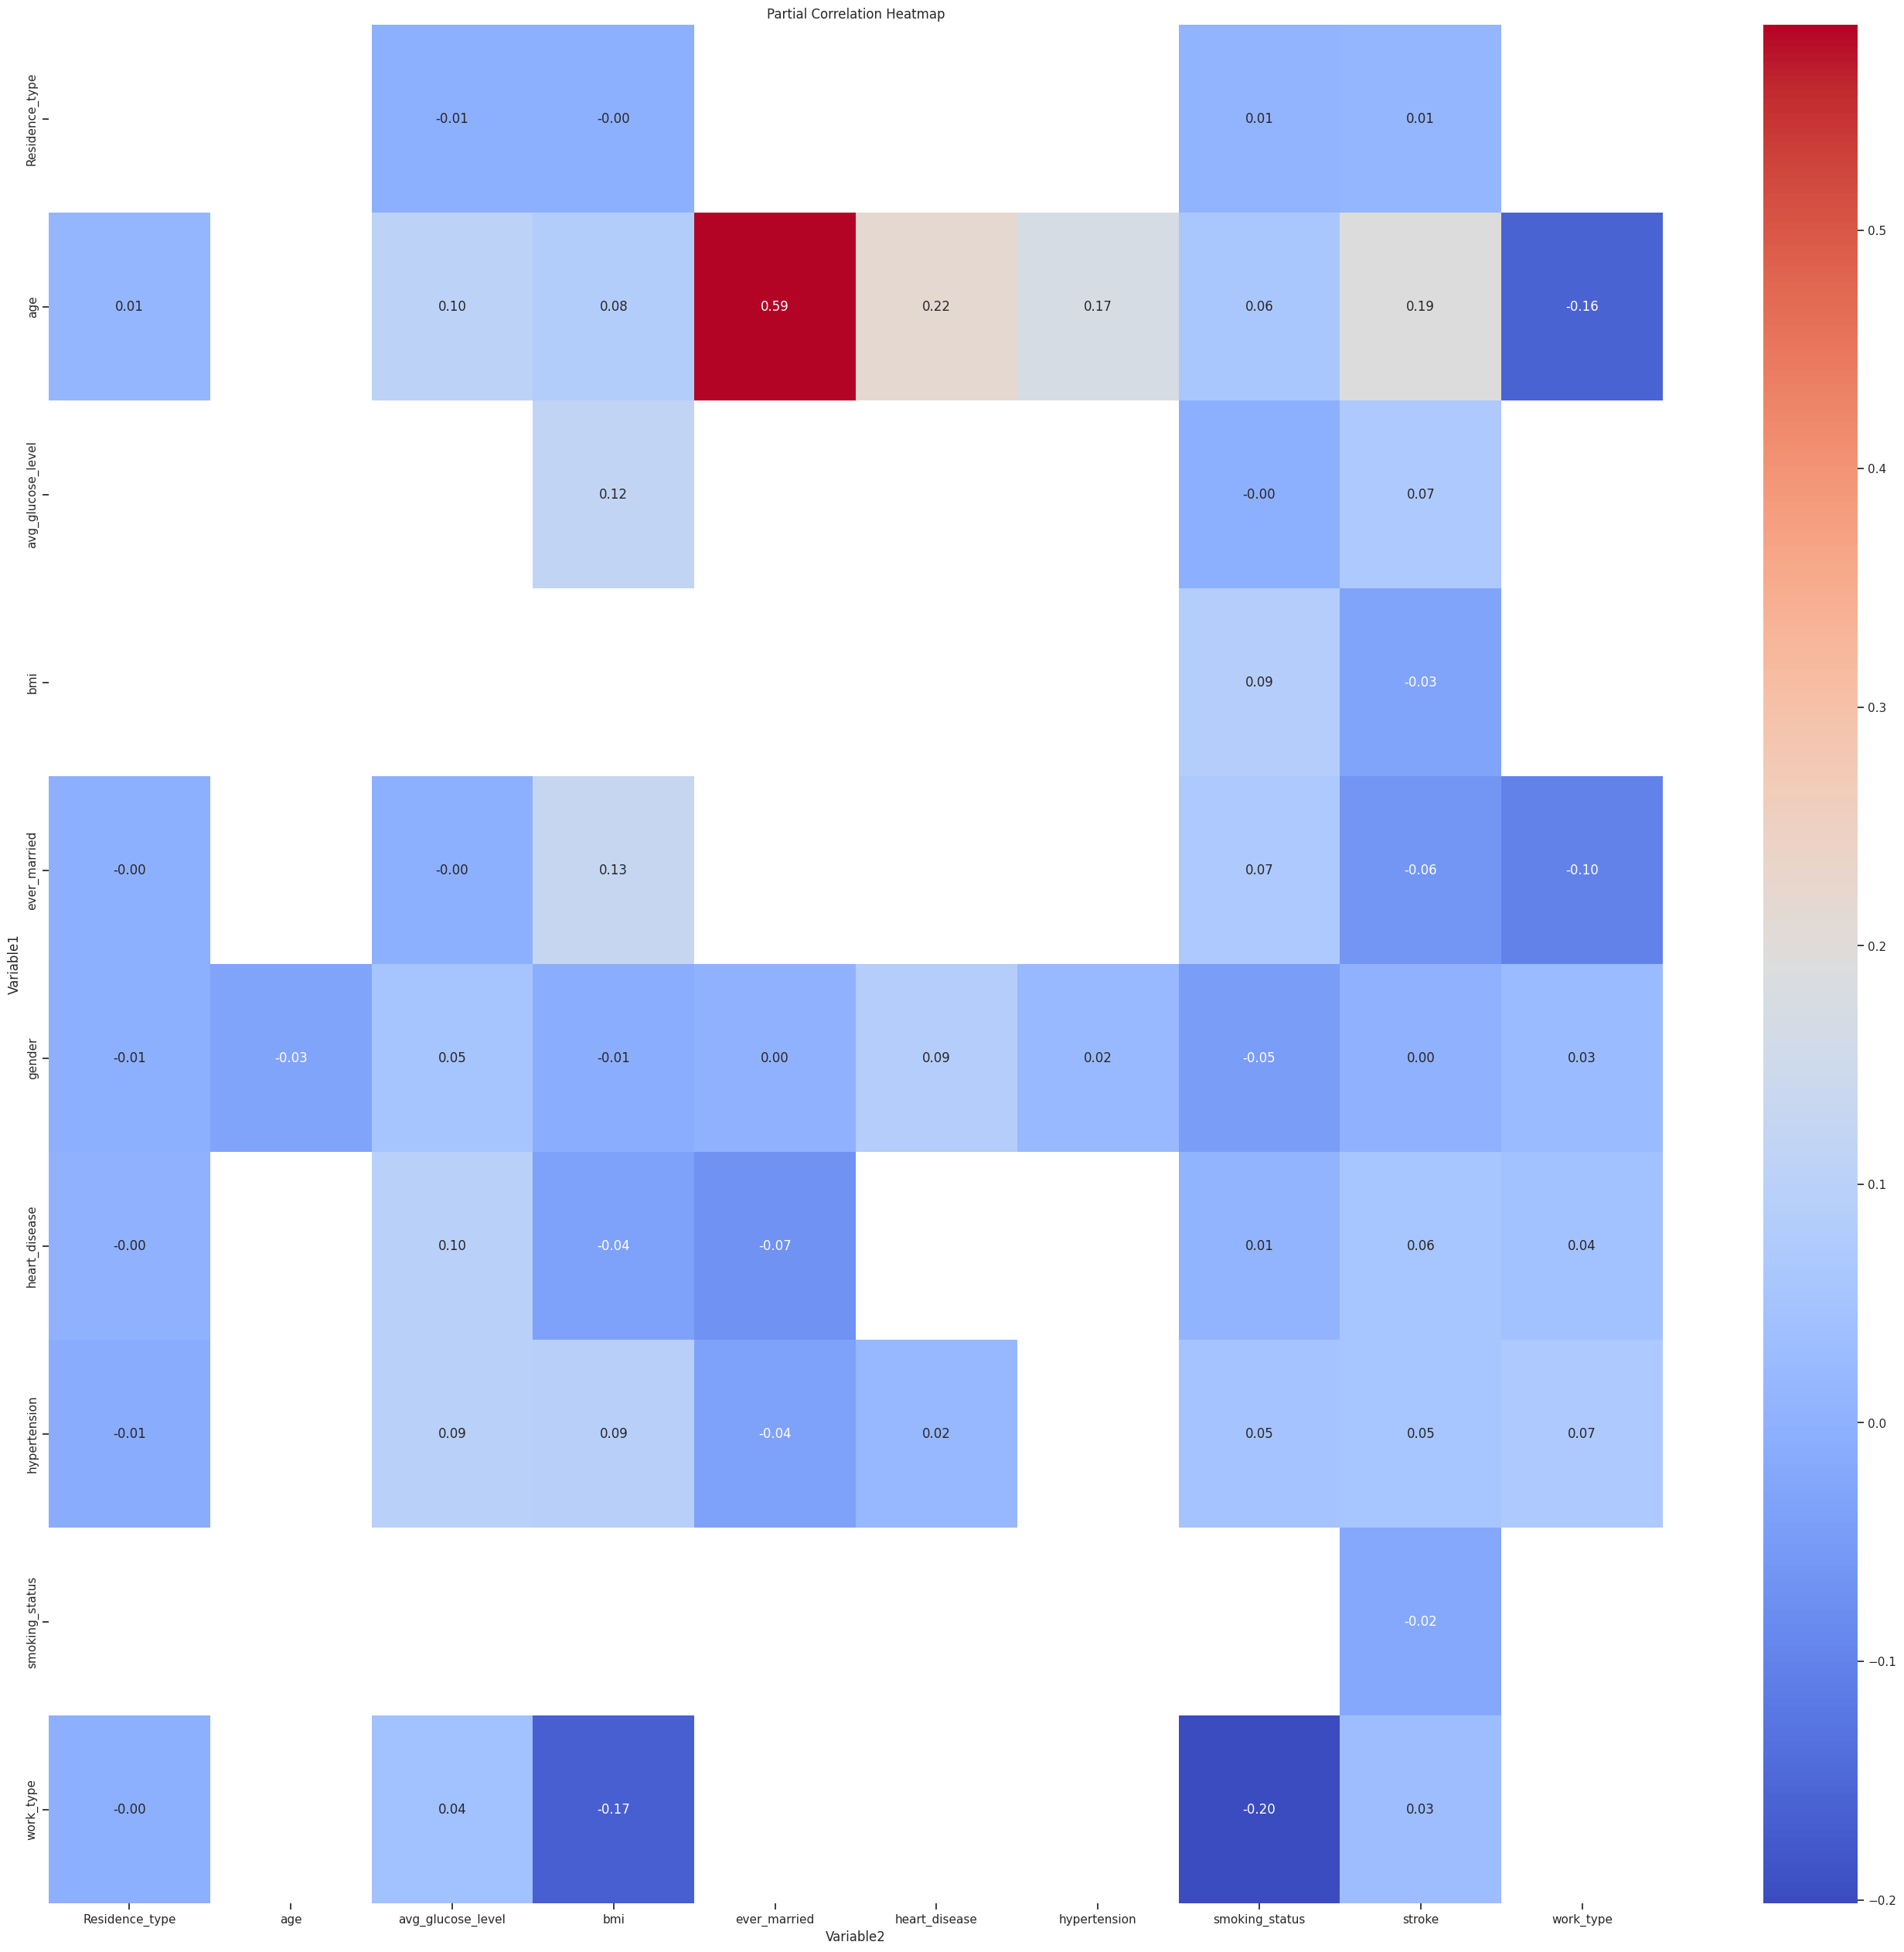

In [ ]:
# Assuming 'partial_corr_results' is your DataFrame containing the results

# Create a heatmap of the partial correlations
plt.figure(figsize=(30, 30))
# Use keyword arguments for index, columns, and values in pivot
sns.heatmap(partial_corr_results.pivot(index='Variable1', columns='Variable2', values='Partial Correlation'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation Heatmap')
plt.show()

# You can also create a scatter plot to visualize the relationship between two variables
# while controlling for others.
# Example:


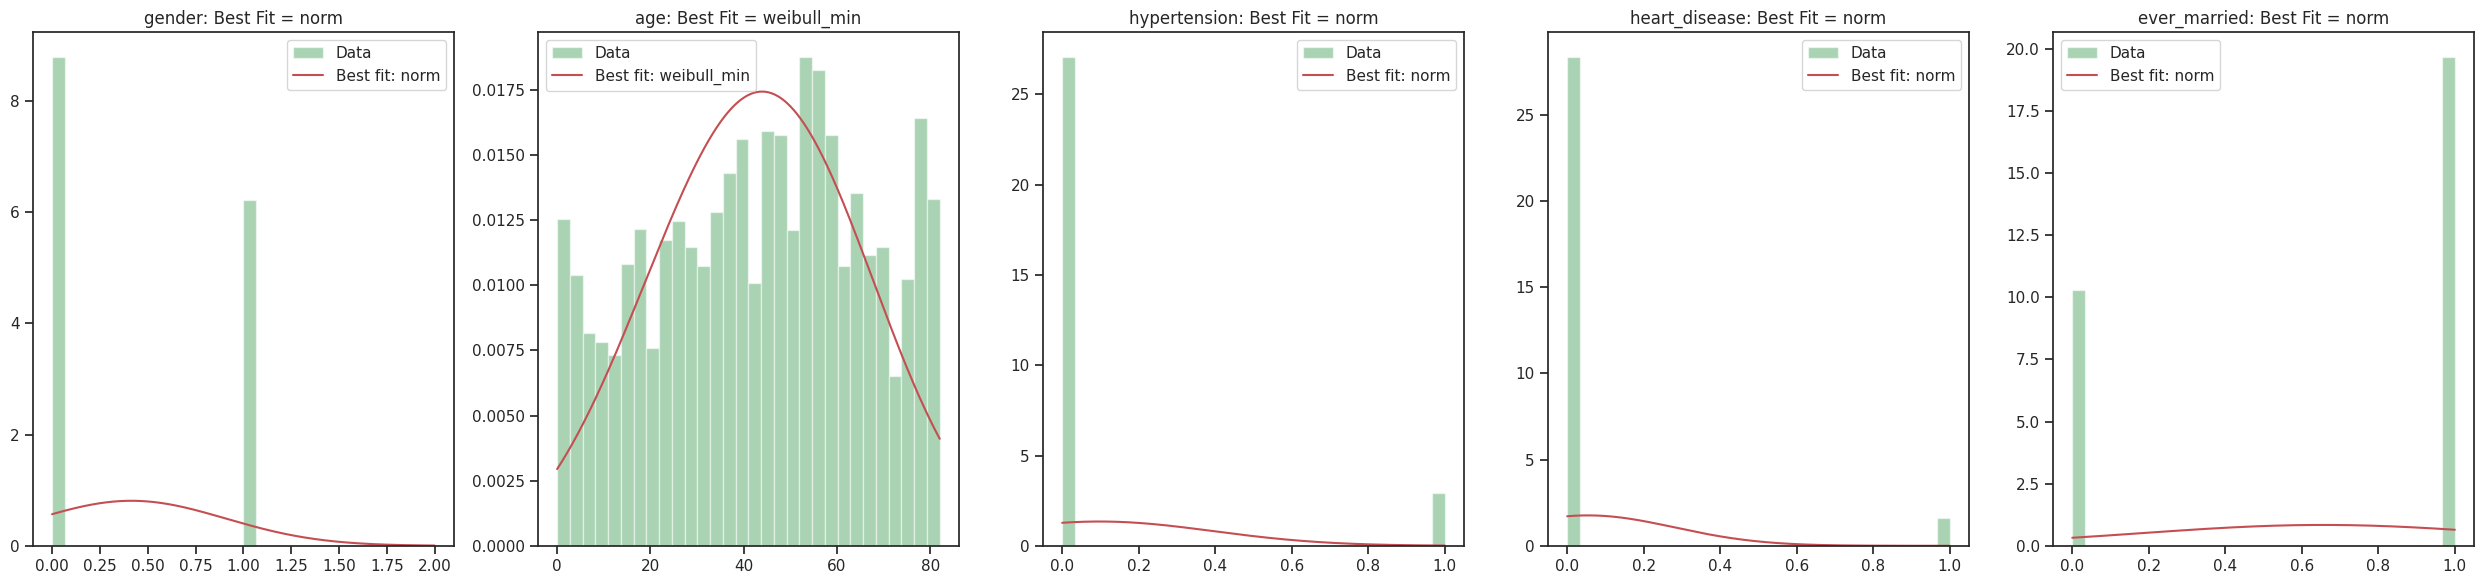

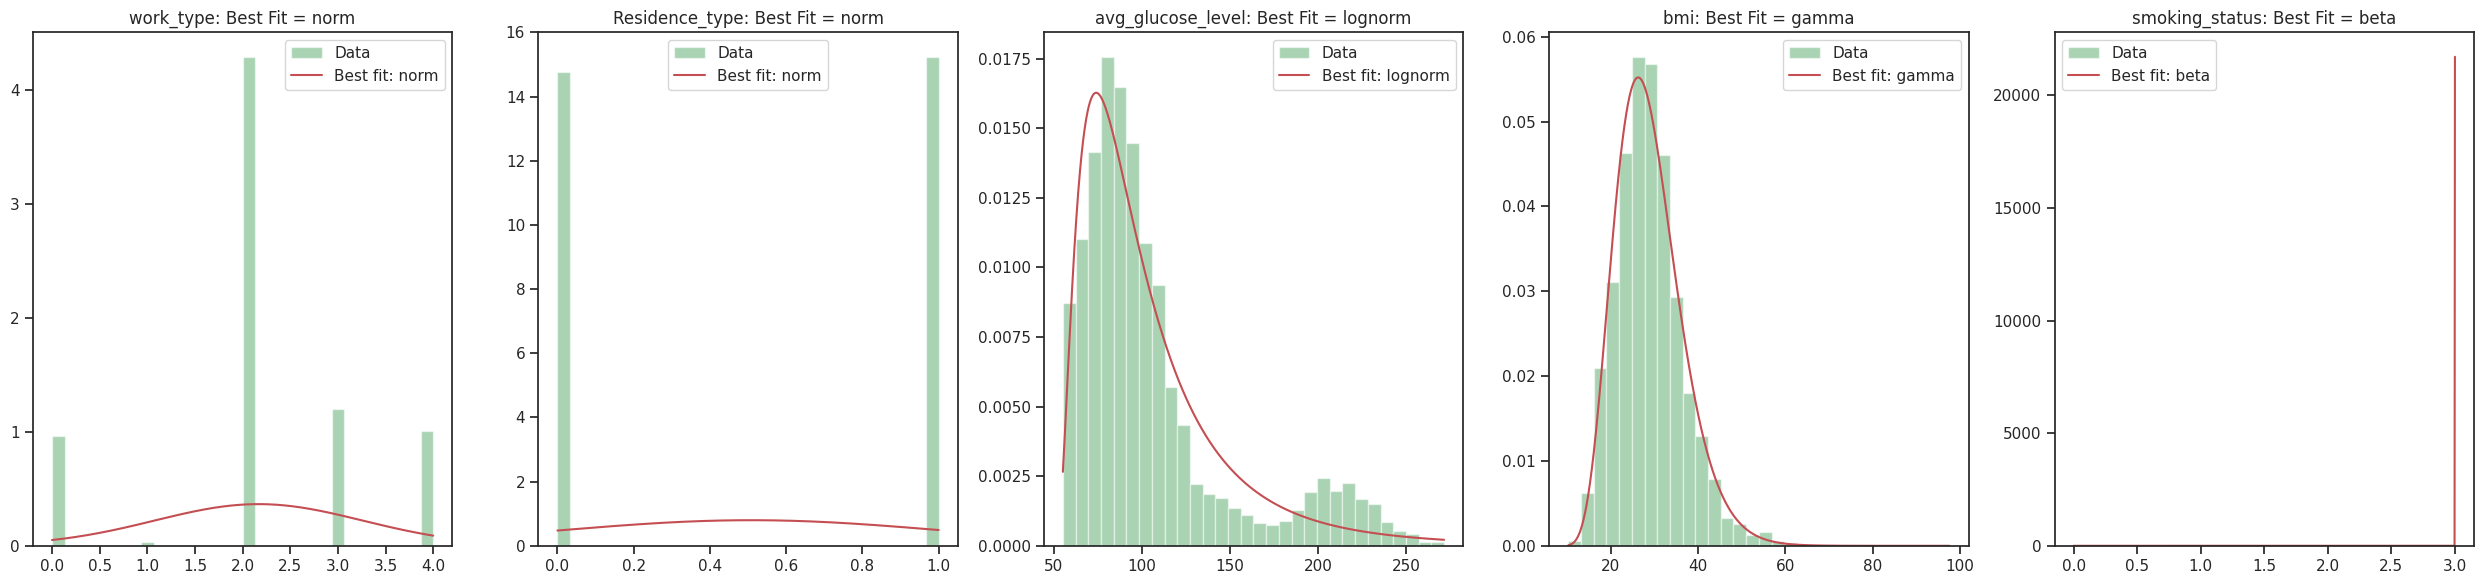

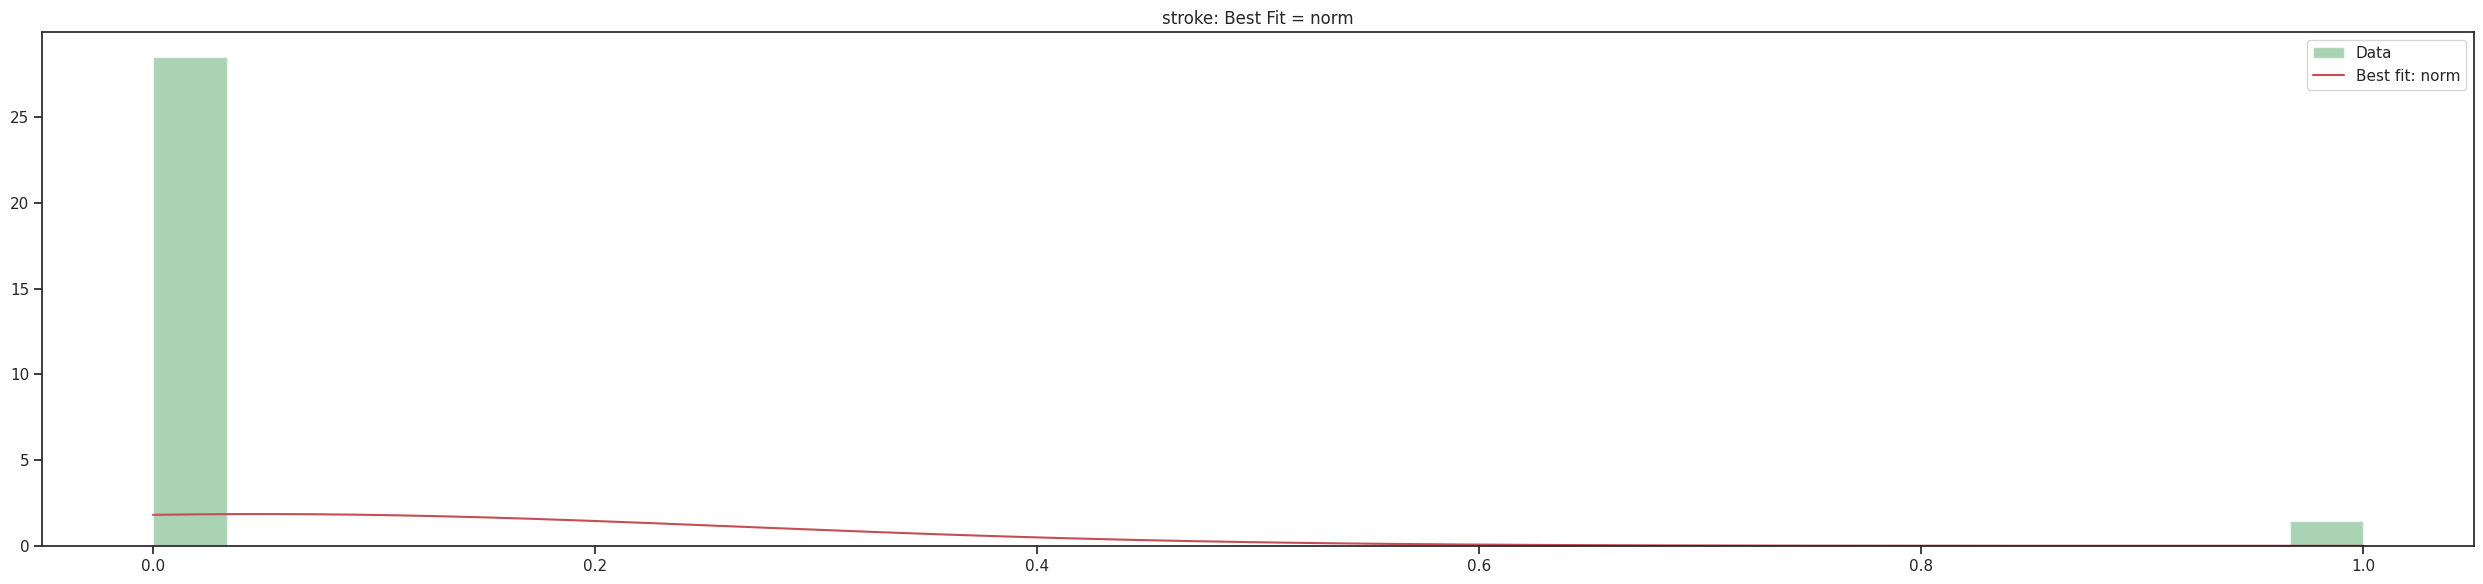

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# List of distributions to test
distributions = ['norm', 'expon', 'lognorm', 'gamma', 'beta', 'weibull_min']

# Function to calculate the goodness-of-fit for each distribution
def test_distribution(data):
    results = {}
    for dist_name in distributions:
        try:
            distribution = getattr(stats, dist_name)
            # Fit the distribution to the data
            params = distribution.fit(data)

            # Perform the Kolmogorov-Smirnov test
            D, p_value = stats.kstest(data, dist_name, args=params)

            # Store the results
            results[dist_name] = {'D-statistic': D, 'p-value': p_value}
        except Exception as e:
            # Skip distributions that fail to fit
            results[dist_name] = {'D-statistic': np.inf, 'p-value': 0}

    return results

# Iterate over each column in the DataFrame and apply the distribution fitting
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

for i in range(0, len(numeric_columns), 5):
    num_plots = min(5, len(numeric_columns) - i)
    fig, axs = plt.subplots(1, num_plots, figsize=(25, 6))  # Create subplots in a row

    for j in range(num_plots):
        column = numeric_columns[i + j]
        data = df[column].dropna()  # Drop NaN values to avoid issues with fitting

        # Test distributions and print results
        results = test_distribution(data)

        # Sort by best p-value (higher is better)
        sorted_results = sorted(results.items(), key=lambda x: x[1]['p-value'], reverse=True)
        best_fit = sorted_results[0][0]
        best_distribution = getattr(stats, best_fit)

        # Get the current Axes object
        ax = axs if num_plots == 1 else axs[j]  # If num_plots is 1, axs is a single Axes object

        try:
            params = best_distribution.fit(data)

            # Plot histogram and best-fit distribution
            ax.hist(data, bins=30, density=True, alpha=0.5, color='g', label='Data')

            # Generate points for plotting the distribution
            x = np.linspace(min(data), max(data), 1000)
            pdf = best_distribution.pdf(x, *params)
            ax.plot(x, pdf, 'r-', label=f'Best fit: {best_fit}')

            ax.set_title(f"{column}: Best Fit = {best_fit}")
            ax.legend(loc='best')
        except Exception as e:
            ax.set_title(f"{column}: Fit Failed")
            ax.hist(data, bins=30, density=True, alpha=0.5, color='g', label='Data')
            ax.legend(loc='best')

    plt.tight_layout()
    plt.show()

## Shapiro-Wilk test

In [ ]:
# prompt: do test for normality of data and save in excel with proper conclusion

import pandas as pd
from scipy.stats import shapiro

# Assuming 'df' is your DataFrame and 'numeric_columns' contains the names of numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Create an empty list to store the normality test results
normality_test_results = []

# Perform the Shapiro-Wilk test for each numeric column
for column in numeric_columns:
    data = df[column].dropna()  # Remove missing values before testing
    statistic, p_value = shapiro(data)

    conclusion = "Normally distributed" if p_value > 0.05 else "Not normally distributed"

    normality_test_results.append([column, statistic, p_value, conclusion])

# Create a DataFrame from the results
normality_df = pd.DataFrame(normality_test_results, columns=['Column', 'Statistic', 'P-value', 'Conclusion'])

# Save the results to an Excel file
normality_df.to_excel('normality_test_results.xlsx', index=False)
print("Normality test results saved to normality_test_results.xlsx")

Normality test results saved to normality_test_results.xlsx


In [ ]:
import numpy as np
from scipy.stats import shapiro

# Exclude the 'stroke' variable from transformations
excluded_variable = 'stroke'

# Get numeric columns except the excluded variable
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col != excluded_variable]

# Number of samples to generate for the Central Limit Theorem
n_samples = 5110

# Create a new DataFrame to store the transformed data
transformed_df = df.copy()

# Apply Central Limit Theorem to each numeric column
for column in numeric_columns:
    # Drop NA values before sampling to avoid errors
    data = df[column].dropna().values

    # Generate random samples with replacement using the original data as a population
    transformed_data = np.array([
        np.mean(np.random.choice(data, size=len(data), replace=True))
        for _ in range(n_samples)
    ])

    # Replace the original column with the transformed data
    transformed_df[column] = transformed_data

# Perform the Shapiro-Wilk test for normality on transformed data
normality_results = []
for column in numeric_columns:
    statistic, p_value = shapiro(transformed_df[column])
    normality_results.append({
        'Column': column,
        'Shapiro-Wilk Statistic': statistic,
        'P-value': p_value,
        'Conclusion': 'Normal' if p_value > 0.05 else 'Not Normal'
    })

# Convert results to a DataFrame
normality_results_df = pd.DataFrame(normality_results)



In [ ]:
normality_results_df.to_excel('CLT_normality_test_results.xlsx', index=False)

In [ ]:
df = transformed_df.copy()

# Outlier Handling

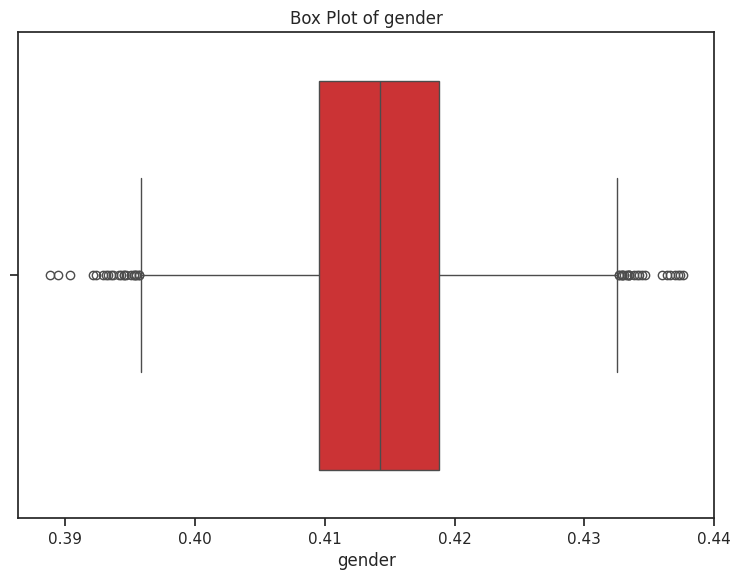

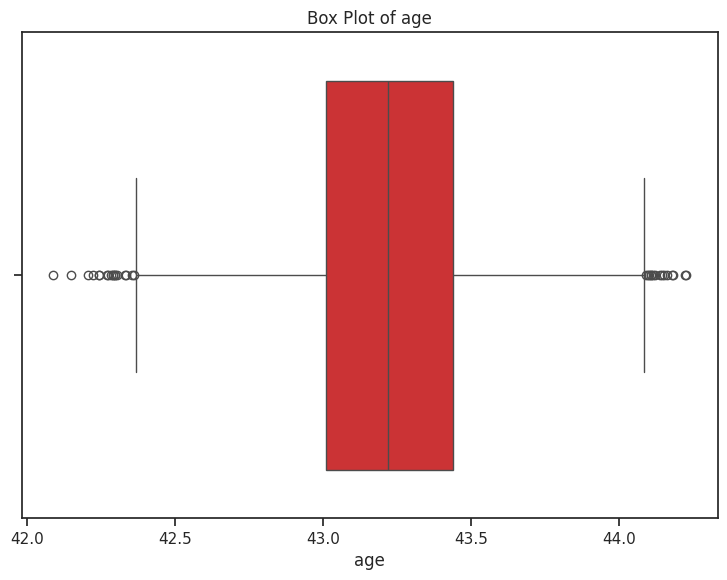

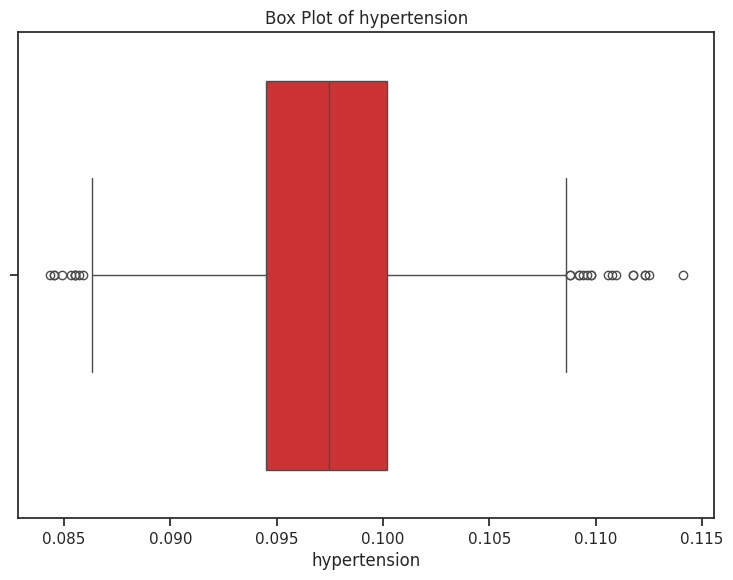

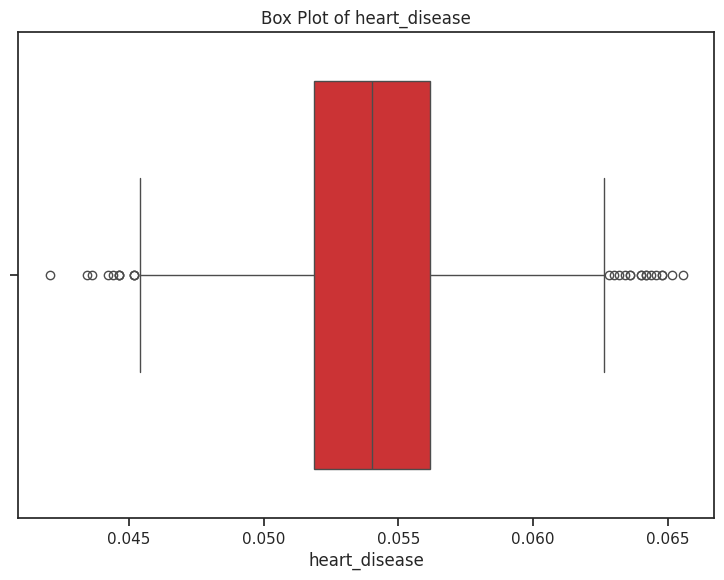

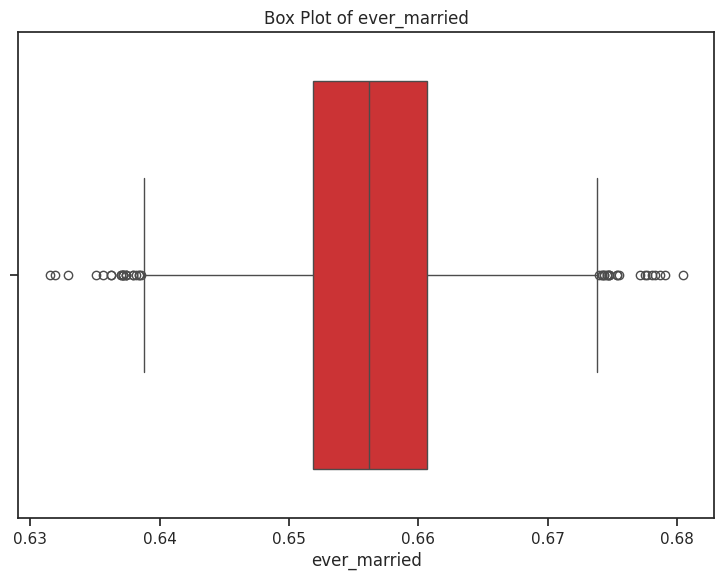

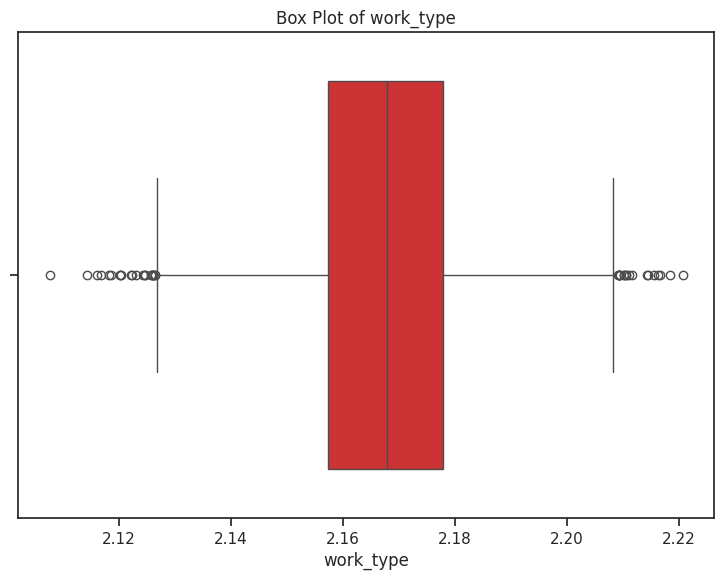

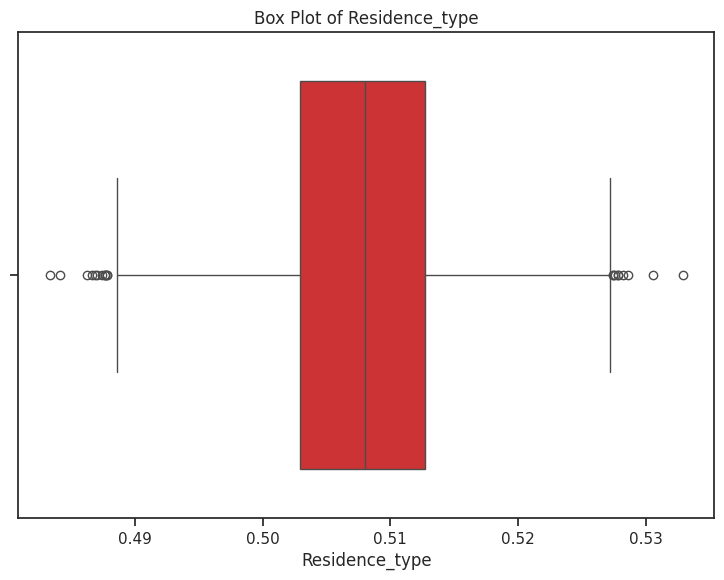

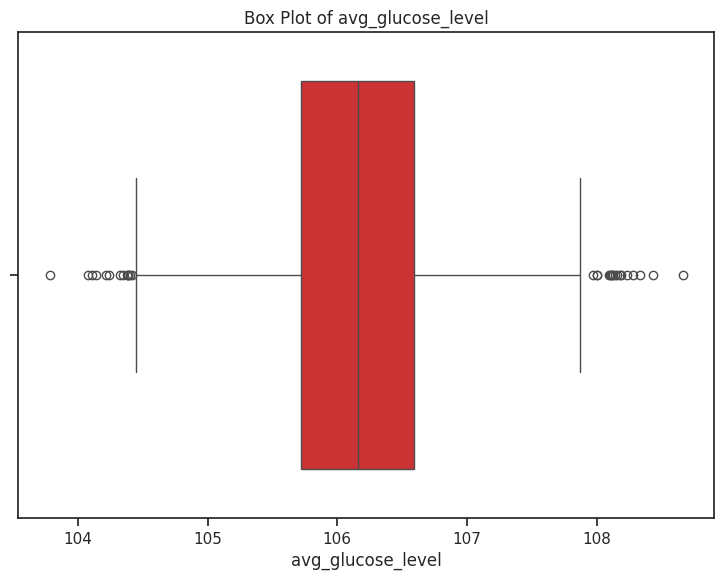

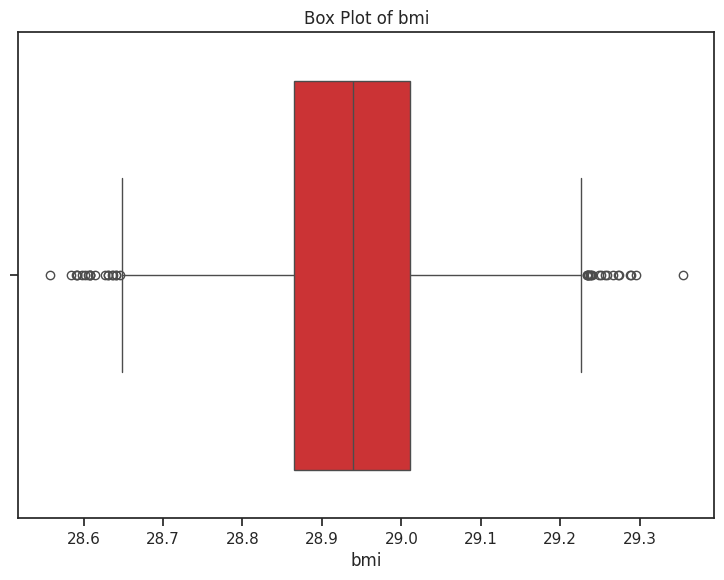

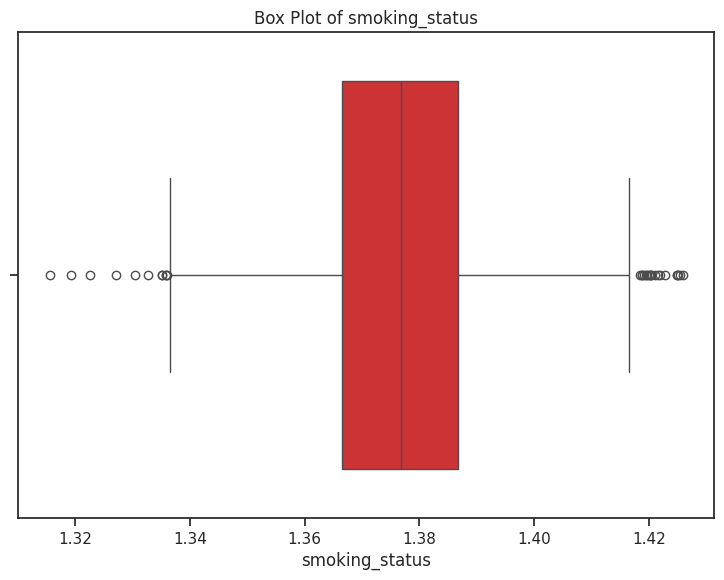

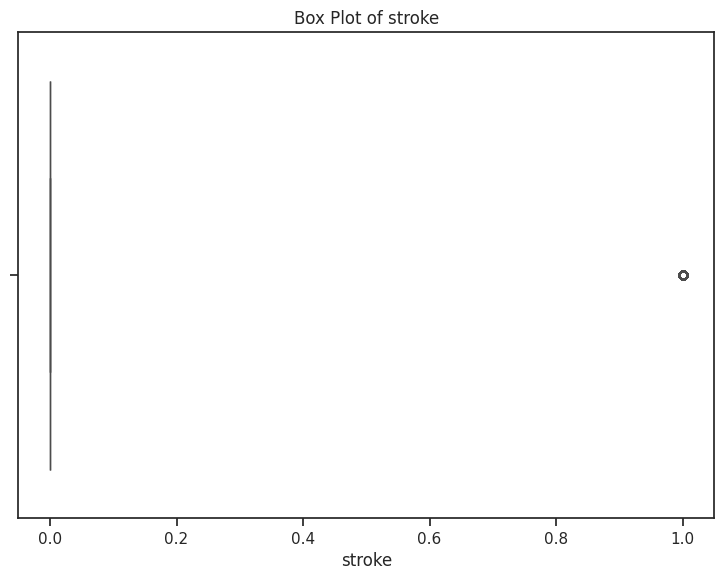

In [ ]:

numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
excluded_column = 'stroke'

# Get numeric columns excluding the 'stroke' column
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col != excluded_column]

# Initialize total outliers counter
total_outliers = 0

# Calculate outliers for each numeric column
for col in numeric_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    total_outliers += len(outliers)

# Output the total number of outliers
total_outliers


337

In [ ]:
# Exclude the 'stroke' column from Winsorization
excluded_column = 'stroke'

# Get numeric columns excluding the 'stroke' column
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col != excluded_column]

# Winsorizing the data
for col in numeric_columns:
    lower_bound = np.percentile(df[col], 5)
    upper_bound = np.percentile(df[col], 95)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Display the modified DataFrame to the user


In [ ]:
# Exclude the 'stroke' column from the outlier calculation
excluded_column = 'stroke'

# Get numeric columns excluding the 'stroke' column
numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if col != excluded_column]

# Initialize total outliers counter
total_outliers = 0

# Calculate outliers for each numeric column
for col in numeric_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for the current column
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    total_outliers += len(outliers)

# Output the total number of outliers
total_outliers


0

# Test of independence

In [ ]:
# prompt: apply chi square test in df with the last column with other columns and save the results with conclusion incsv

import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import chi2_contingency

# ... (Your existing code for data loading, preprocessing, etc.) ...

# Chi-square test
def perform_chi2_test(df, target_column):
    results = []
    for col in df.columns:
      if col != target_column and pd.api.types.is_numeric_dtype(df[col]):
        contingency_table = pd.crosstab(df[col], df[target_column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        conclusion = "Reject Null Hypothesis (Significant association)" if p < 0.05 else "Fail to Reject Null Hypothesis (No significant association)"

        results.append({
            'Column': col,
            'Chi2': chi2,
            'P-value': p,
            'Degrees of Freedom': dof,
            'Conclusion': conclusion
        })
    return results

chi2_results = perform_chi2_test(df, 'stroke')  # Assuming 'Category' is your target column

# Save results to a CSV file
results_df = pd.DataFrame(chi2_results)
results_df.to_csv("chi_square_test_results.csv", index=False)

print("Chi-square test results saved to 'chi_square_test_results.csv'")

Chi-square test results saved to 'chi_square_test_results.csv'


# Imbalance handling

In [ ]:
df['stroke'].value_counts()

stroke
0.0    4861
1.0     249
Name: count, dtype: int64

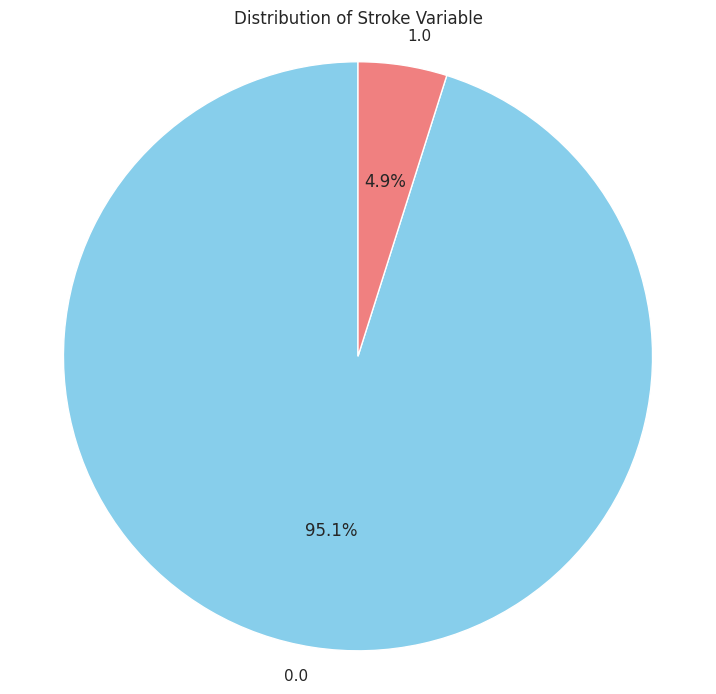

In [ ]:
# prompt: plot pie chart with the stroke varible value count

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'stroke' is your target variable
stroke_counts = df['stroke'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# prompt: apply smote

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['stroke'] = y_resampled

# Print the value counts of the target variable in the resampled DataFrame
print(df_resampled['stroke'].value_counts())

df1 = df_resampled.copy()

stroke
1.0    4861
0.0    4861
Name: count, dtype: int64


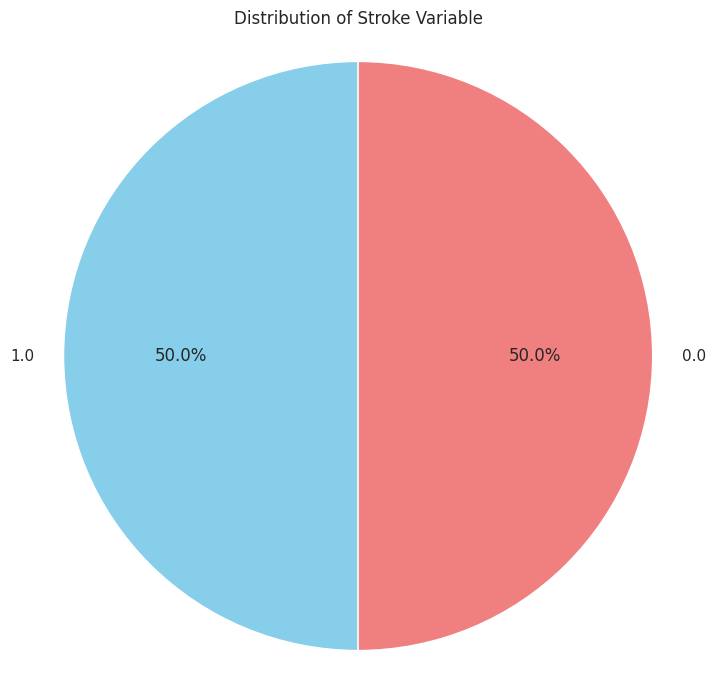

In [ ]:
# prompt: plot pie chart with the stroke varible value count

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'stroke' is your target variable
stroke_counts = df1['stroke'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Training

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df1 is your DataFrame and 'stroke' is your target variable
X = df1.drop('stroke', axis=1)
y = df1['stroke']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

              precision    recall  f1-score   support

         0.0       0.56      0.49      0.52       973
         1.0       0.55      0.61      0.58       972

    accuracy                           0.55      1945
   macro avg       0.55      0.55      0.55      1945
weighted avg       0.55      0.55      0.55      1945



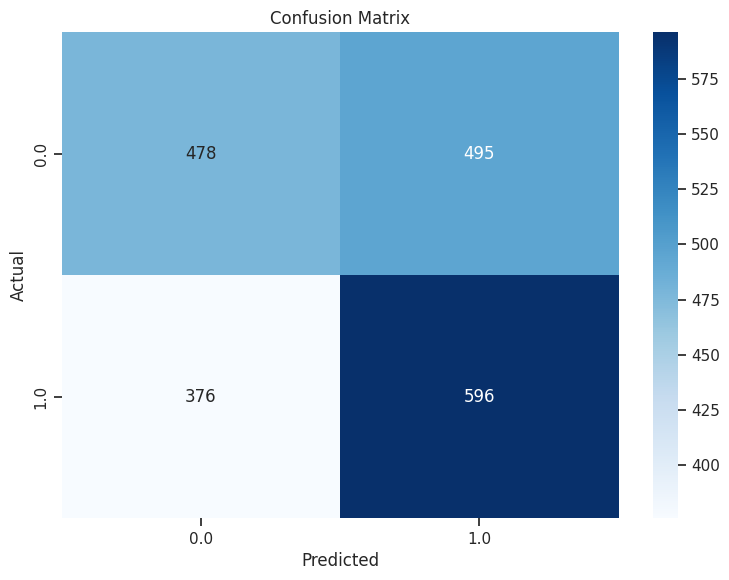

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Binarize the labels for multi-class
classes = np.unique(y_train)  # Get the unique class labels
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict probabilities for all classes
y_prob = svm_model.predict_proba(X_test)

# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



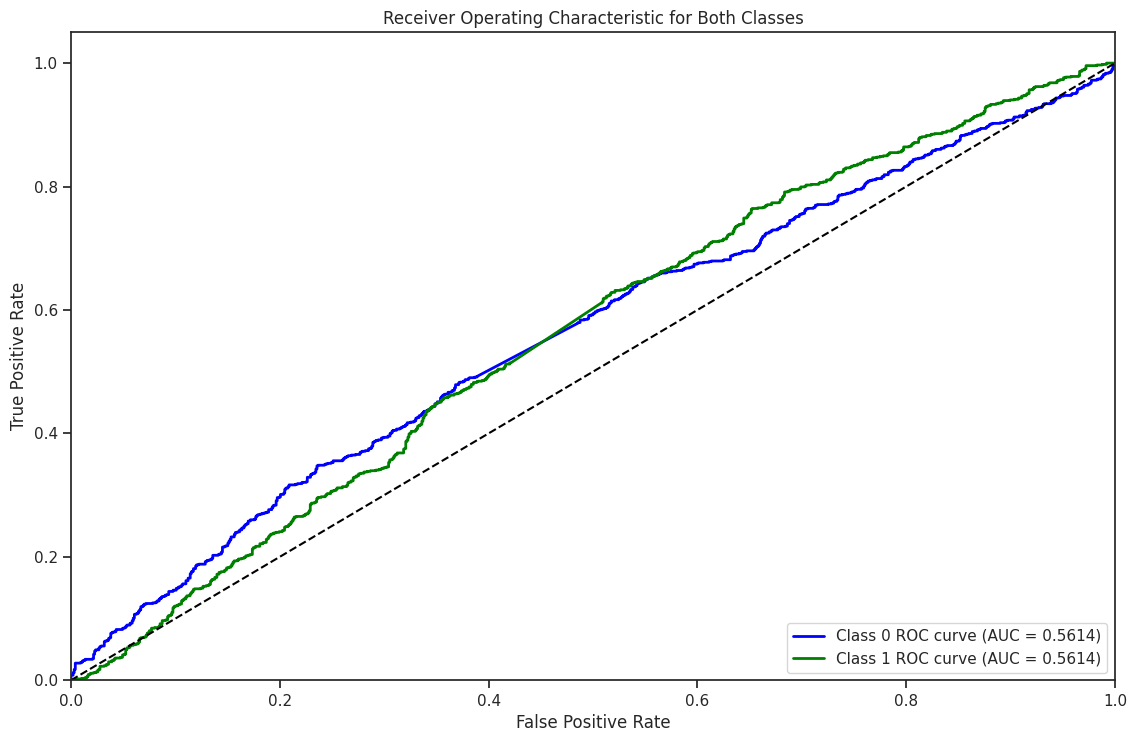

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the SVM model with probability outputs enabled
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = svm_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes')
plt.legend(loc="lower right")
plt.show()


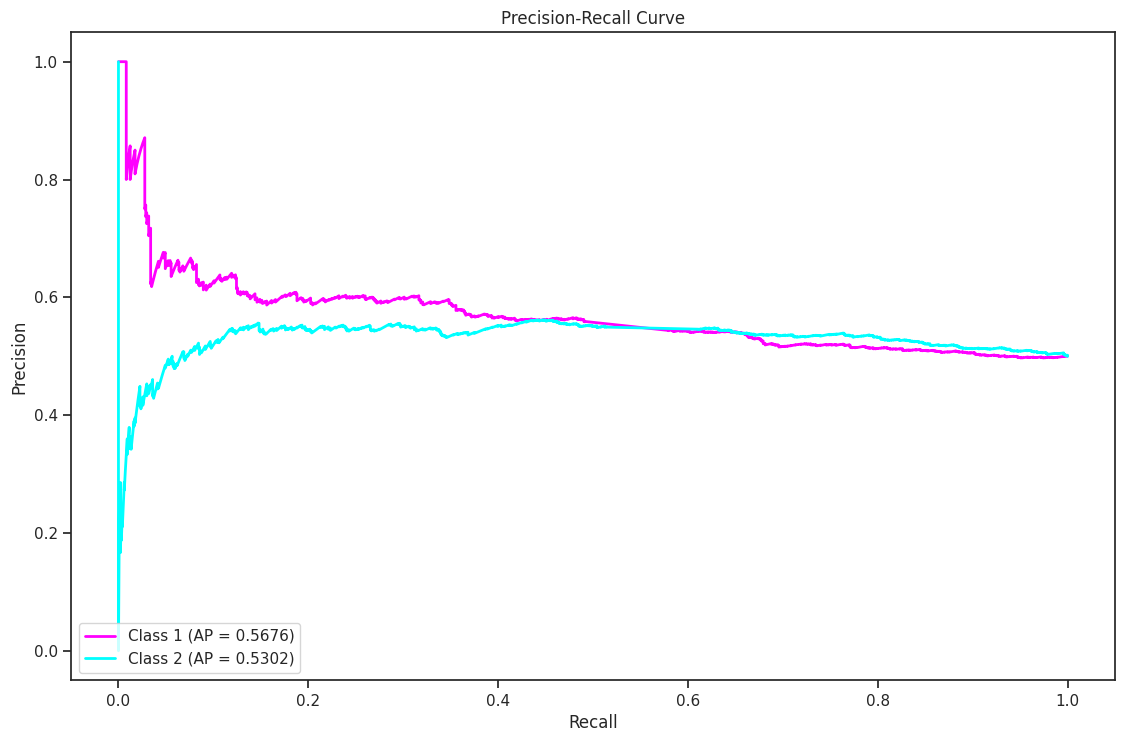

Average Precision scores:
Class 1: 0.5676269800357508
Class 2: 0.530237865017637


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = svm_model.predict_proba(X_test)

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(svm_model.classes_)

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


In [ ]:
# prompt: apply k fold cross validation also find accuracy,
# precision, recall, f1score, kappa score, tpr, tnr, fpr, fnr and save all in csv file

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    tpr = tp / (tp + fn) if (tp + fn) !=0 else 0
    tnr = tn / (tn + fp) if (tn + fp) !=0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
    return accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr


def kfold_cross_validation(X, y, model, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr = calculate_metrics(y_test, y_pred)
        results.append([fold + 1, accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr])
    return results

# Example usage (assuming you have X, y, and svm_model defined as in your previous code):
results = kfold_cross_validation(X, y, svm_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('kfold_results.csv', index=False)

In [ ]:
import shap
import pandas as pd
import numpy as np

# Ensure SVM model supports predict_proba
assert hasattr(svm_model, "predict_proba"), "svm_model must support predict_proba. Ensure it's trained with probability=True."

# Select a random subset of 100 samples from X_test
X_test_sample = X_test.sample(n=100, random_state=42)  # Randomly select 100 samples for SHAP
print(f"Sampled X_test shape: {X_test_sample.shape}")

# Sample background data to optimize SHAP computations
background = shap.sample(X_test_sample, 50)  # Use 50 representative samples for background data
explainer = shap.KernelExplainer(svm_model.predict_proba, background)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Handle SHAP values for classification or regression
if isinstance(shap_values, list):  # Classification model
    shap_values_array = np.stack(shap_values, axis=-1)  # Shape: (n_samples, n_features, n_classes)
else:  # Regression model
    shap_values_array = shap_values  # Shape: (n_samples, n_features)

# Print the shape of shap_values_array
print("shap_values_array.shape:", shap_values_array.shape)

# Sum over the classes axis (last axis) without taking absolute values
summed_shap_values = shap_values_array.sum(axis=-1)  # Shape: (n_samples, n_features)

# Print the shape after summing over classes
print("summed_shap_values.shape:", summed_shap_values.shape)

# Compute mean SHAP values over all samples
mean_shap_values = summed_shap_values.mean(axis=0)  # Shape: (n_features,)

# Verify the shapes match
assert mean_shap_values.shape == X_test_sample.columns.shape, "Mismatch between SHAP values and feature columns"
print("Shape of mean_shap_values:", mean_shap_values.shape)
print("Shape of X_test_sample.columns:", X_test_sample.columns.shape)

# Create a DataFrame with feature names and their importances
feature_importance = pd.DataFrame({
    'feature': X_test_sample.columns,
    'importance': mean_shap_values
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Get the top 5 features
top_5_features = feature_importance.head(5)

print("Top 5 Important Features:")
print(top_5_features)

# Visualize SHAP summary plot for the top features
shap.summary_plot(summed_shap_values, X_test_sample, plot_size=(12, 8), max_display=5)


Sampled X_test shape: (100, 10)


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

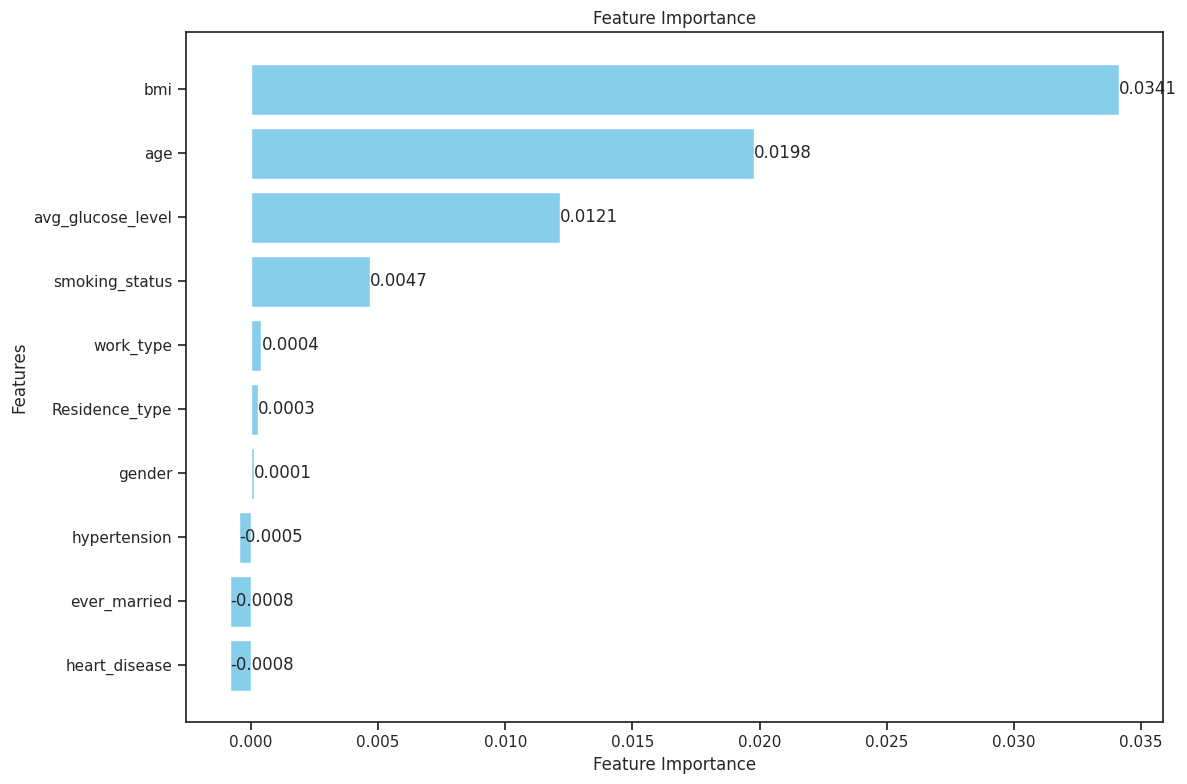

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    svm_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# Decision Tree

              precision    recall  f1-score   support

         0.0       0.92      0.39      0.55       973
         1.0       0.61      0.97      0.75       972

    accuracy                           0.68      1945
   macro avg       0.76      0.68      0.65      1945
weighted avg       0.77      0.68      0.65      1945



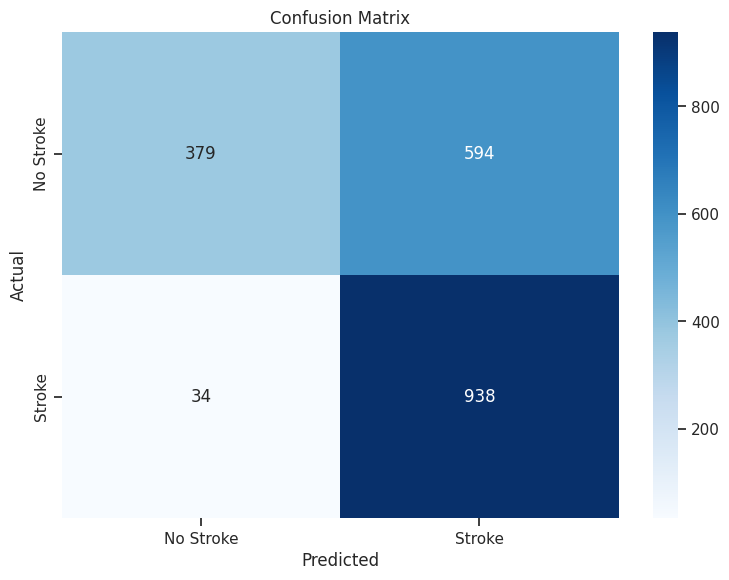

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)  # You can adjust the hyperparameters as needed
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, dt_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('Decision_tree_kfold_results.csv', index=False)

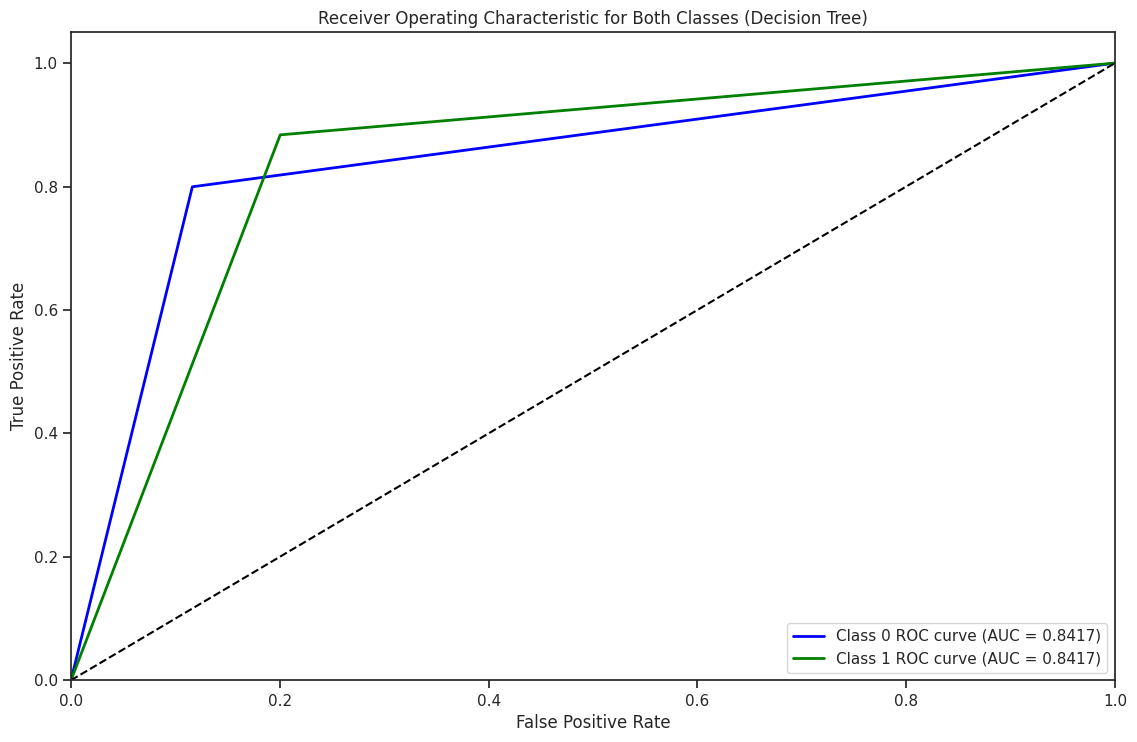

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = dt_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


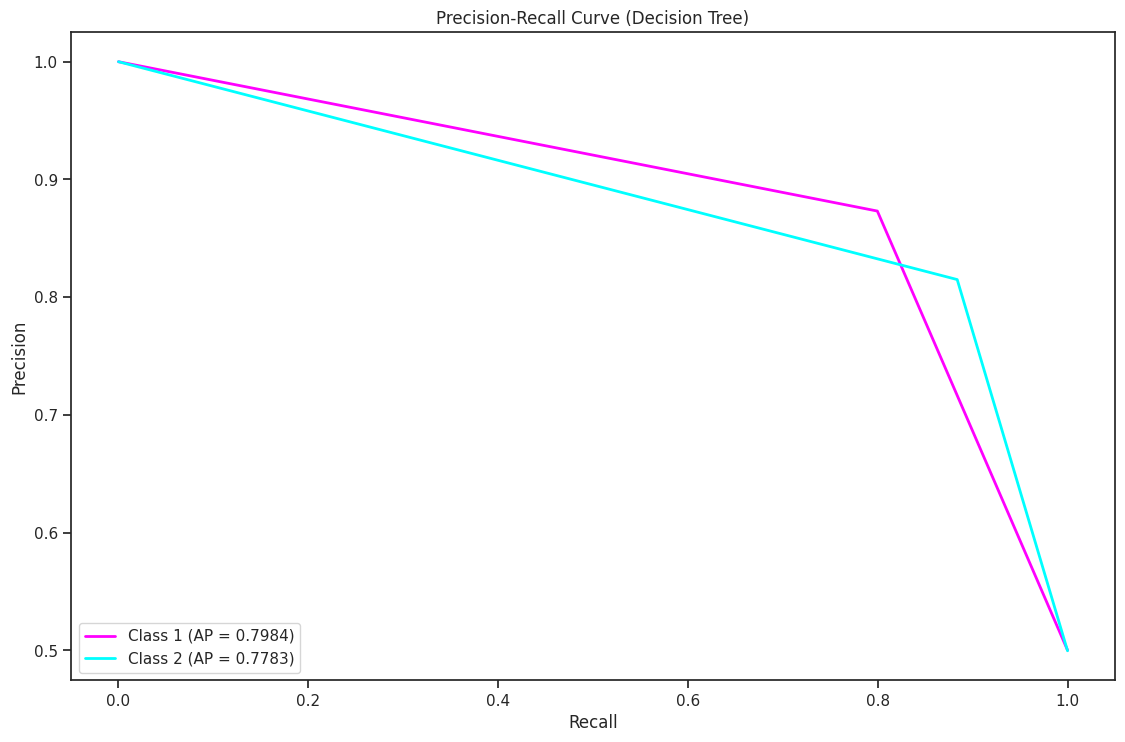

Average Precision scores:
Class 1: 0.798439072147098
Class 2: 0.7783413593124372


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = dt_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(dt_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


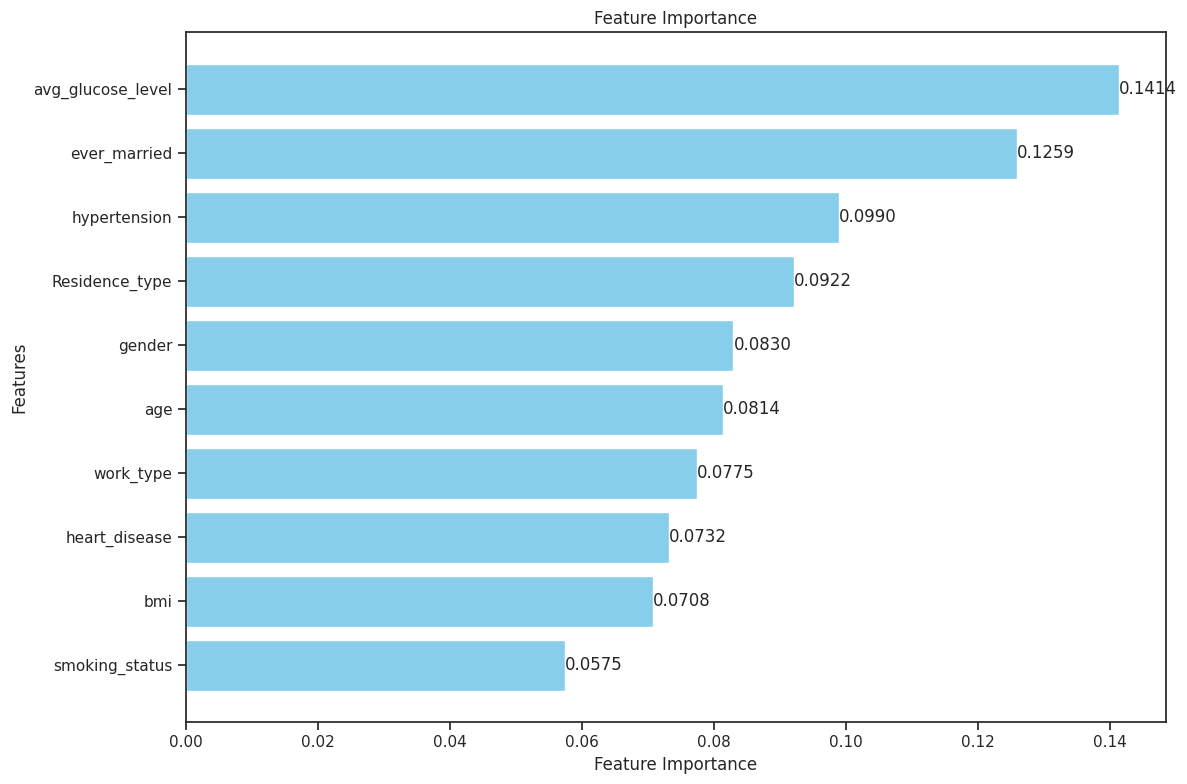

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    dt_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


#random Forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       973
         1.0       0.89      0.96      0.92       972

    accuracy                           0.92      1945
   macro avg       0.92      0.92      0.92      1945
weighted avg       0.92      0.92      0.92      1945



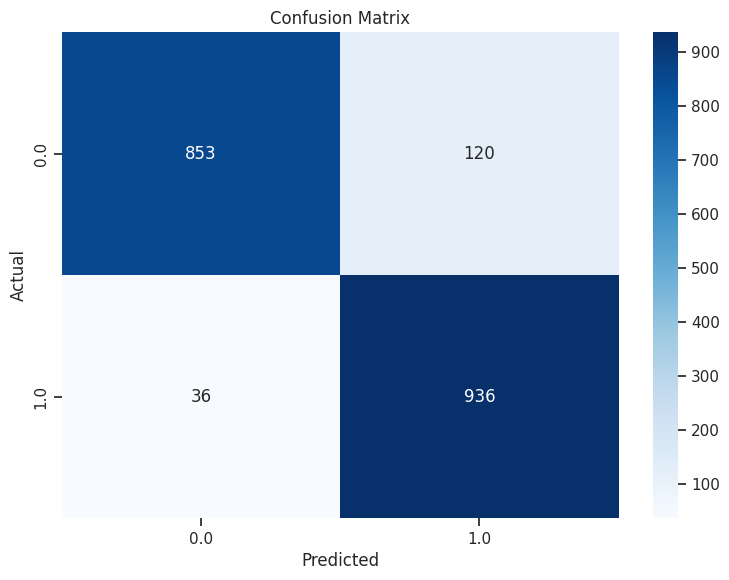

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=200)  # Adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, rf_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('Random_forest_kfold_results.csv', index=False)

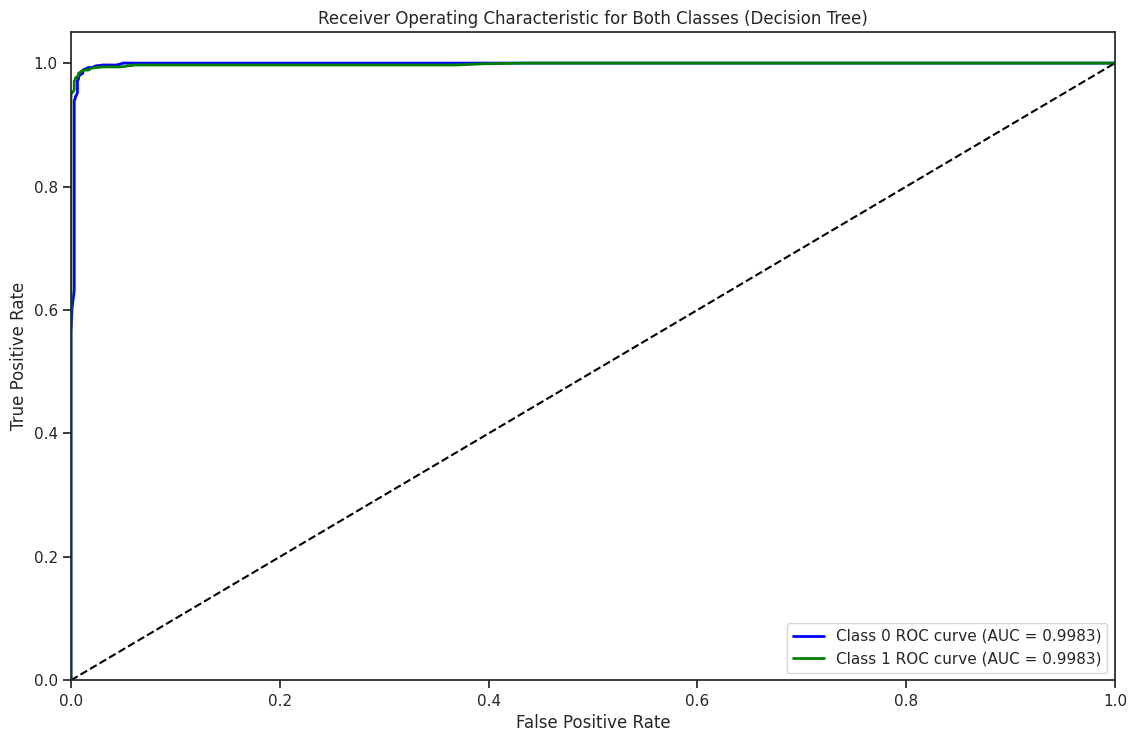

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = rf_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


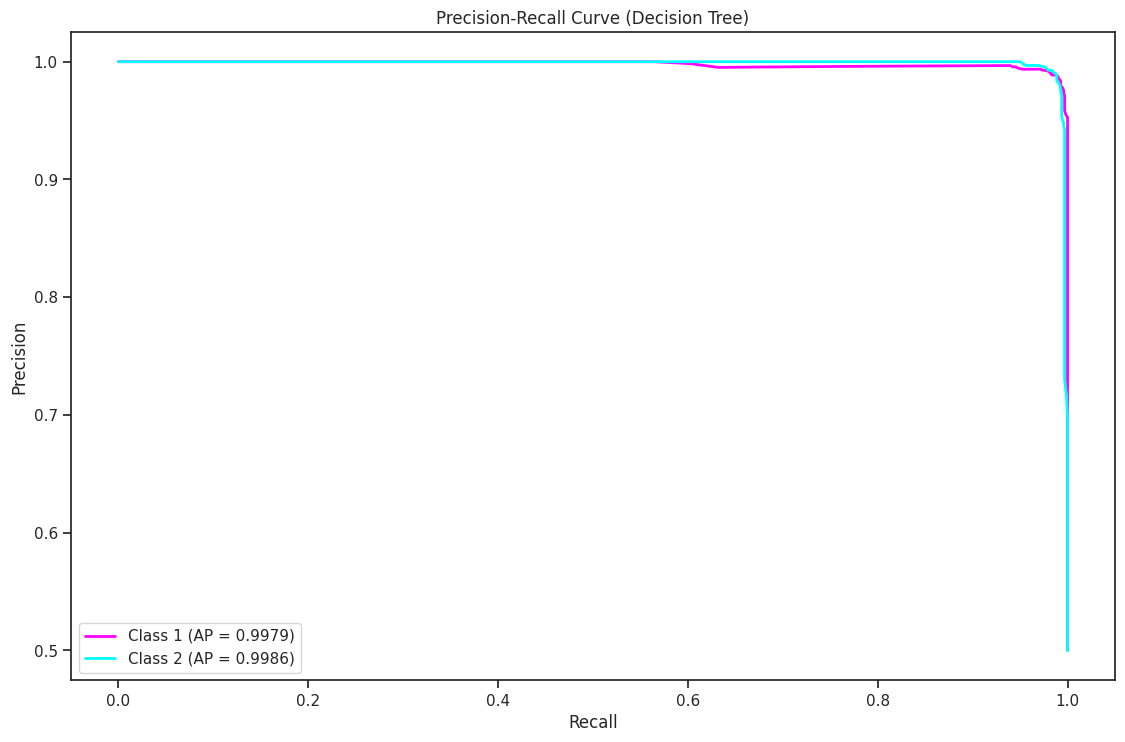

Average Precision scores:
Class 1: 0.9979431946168744
Class 2: 0.9986412027950754


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = rf_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(rf_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


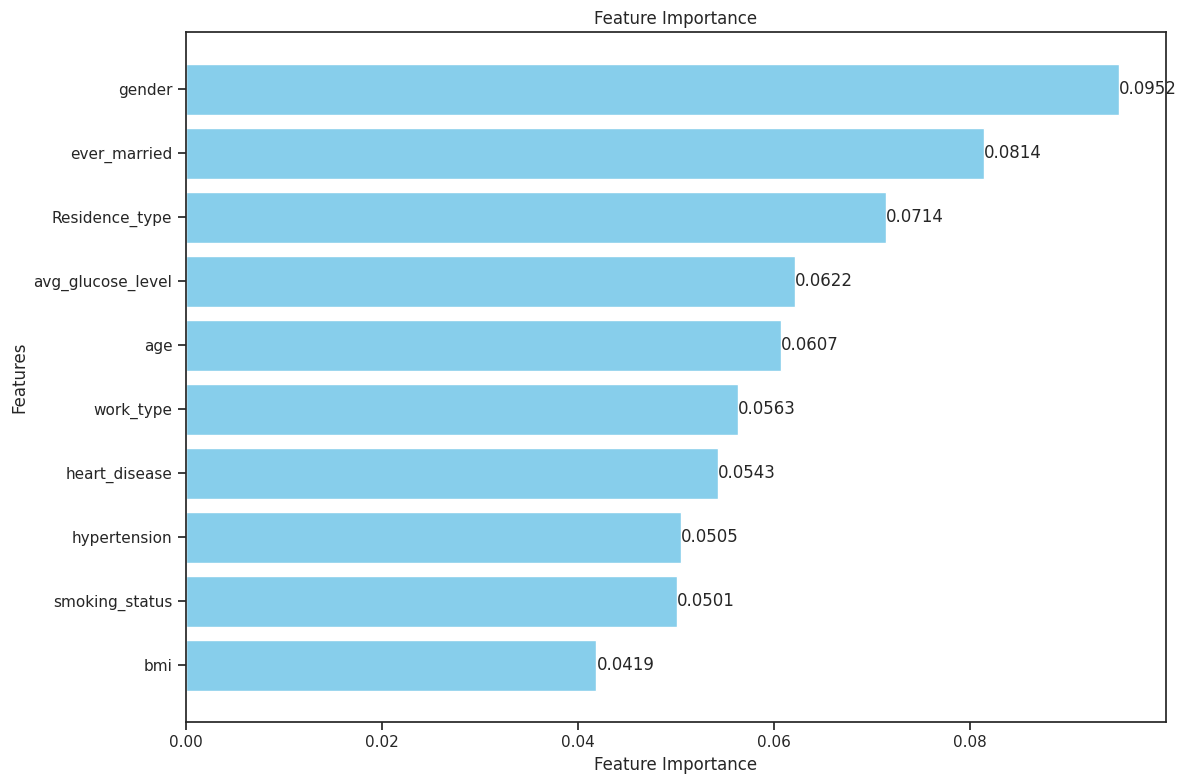

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# KNN

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81       973
         1.0       0.77      0.97      0.86       972

    accuracy                           0.84      1945
   macro avg       0.86      0.84      0.83      1945
weighted avg       0.86      0.84      0.83      1945



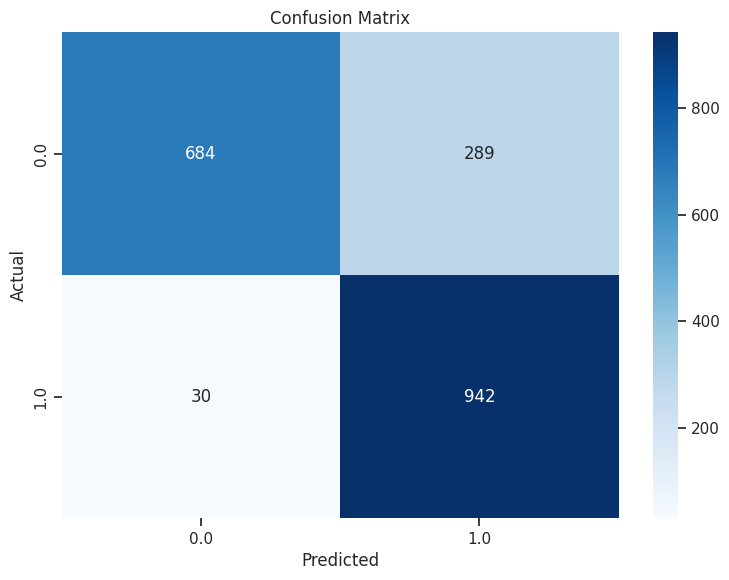

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, knn_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('KNN_kfold_results.csv', index=False)

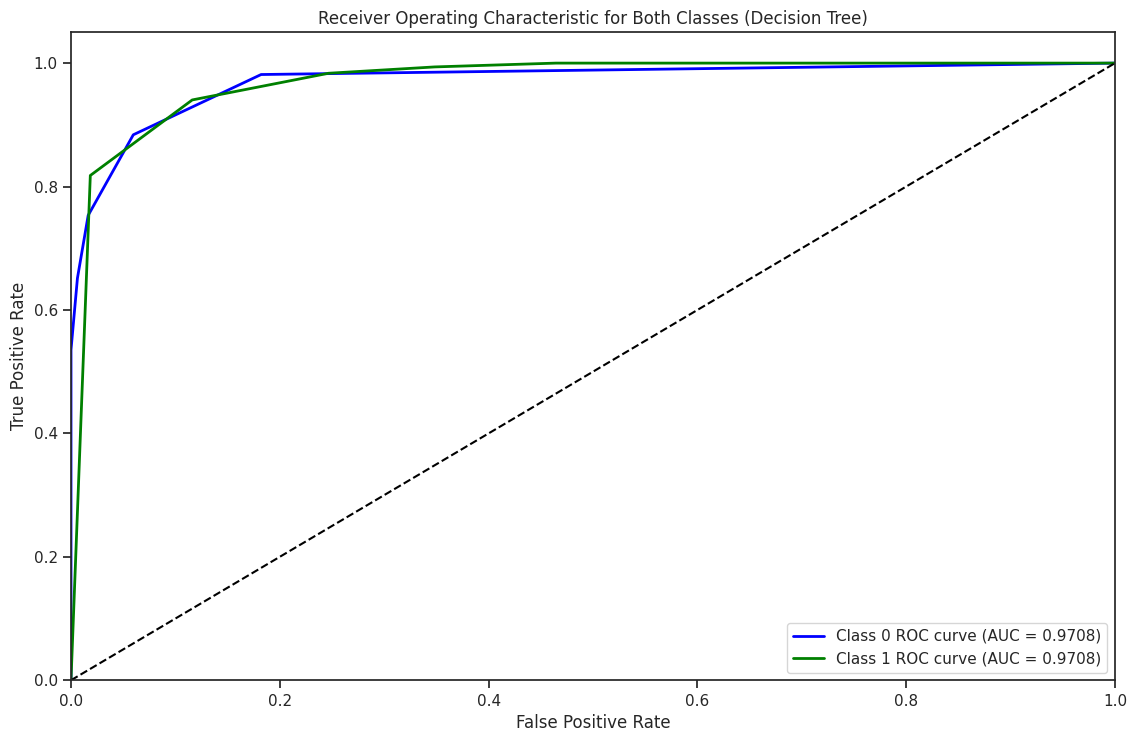

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = knn_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


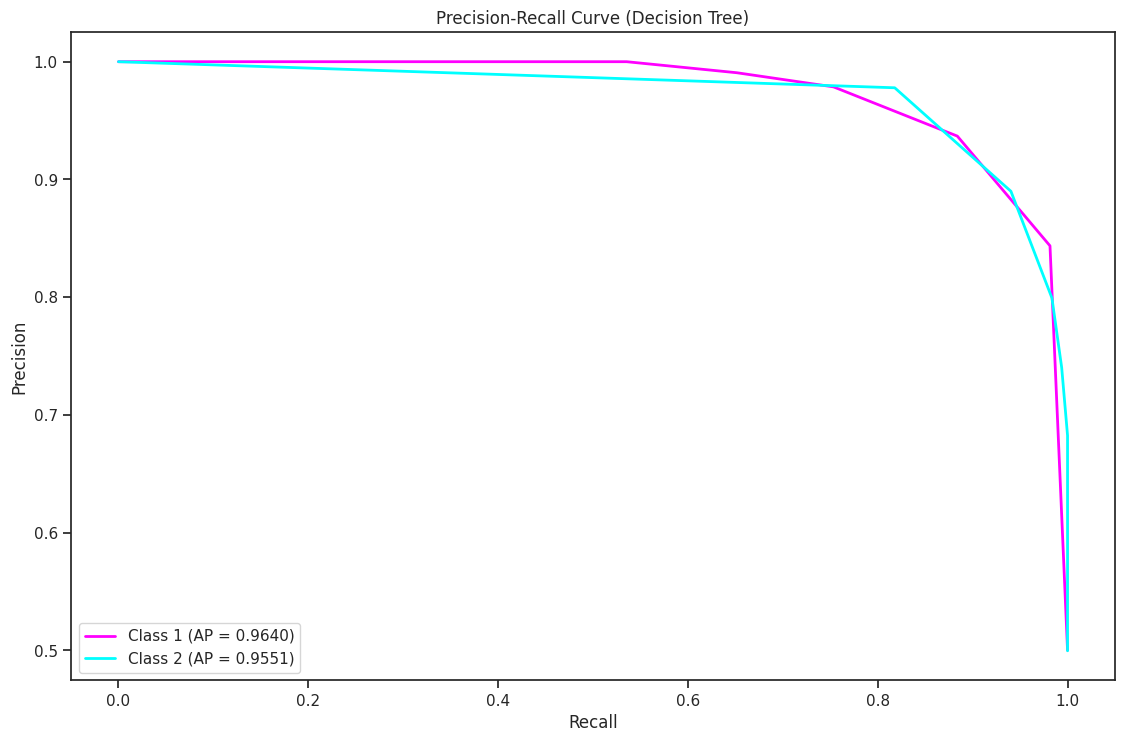

Average Precision scores:
Class 1: 0.9639796783816855
Class 2: 0.9551180644693396


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = knn_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(knn_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


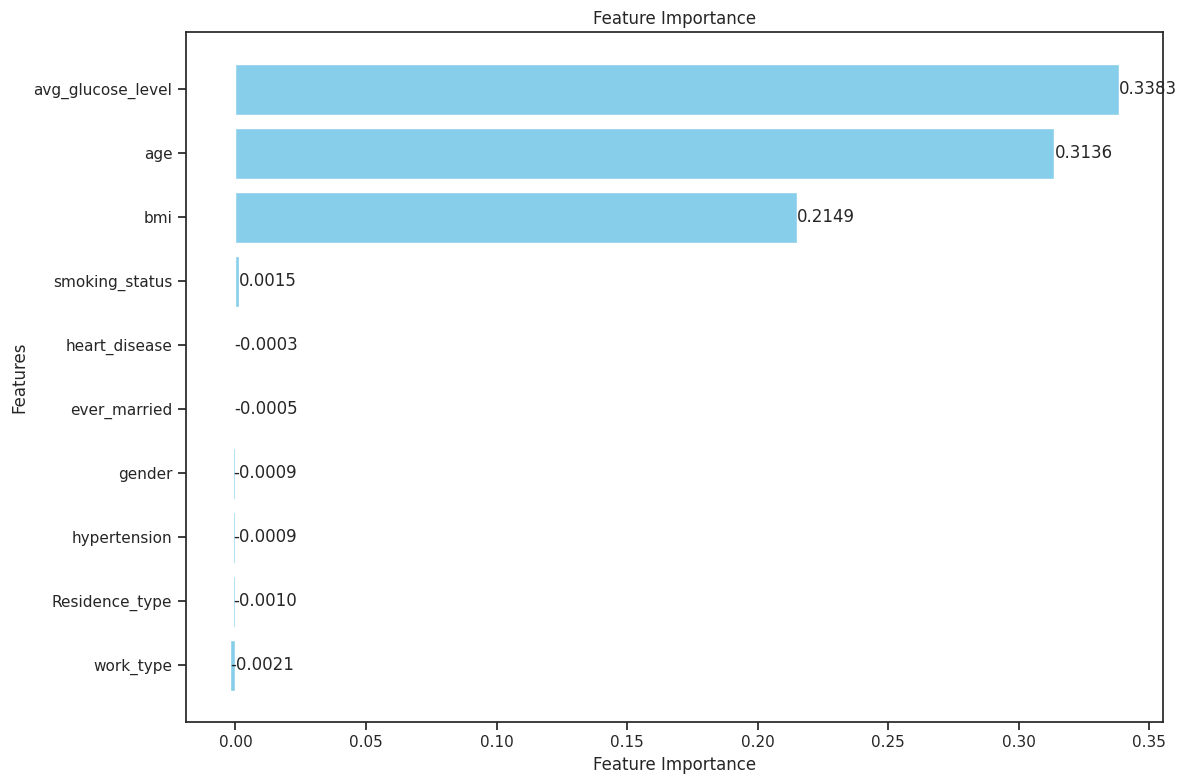

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    knn_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# Naive Bayes

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67       973
         1.0       0.67      0.76      0.71       972

    accuracy                           0.69      1945
   macro avg       0.70      0.69      0.69      1945
weighted avg       0.70      0.69      0.69      1945



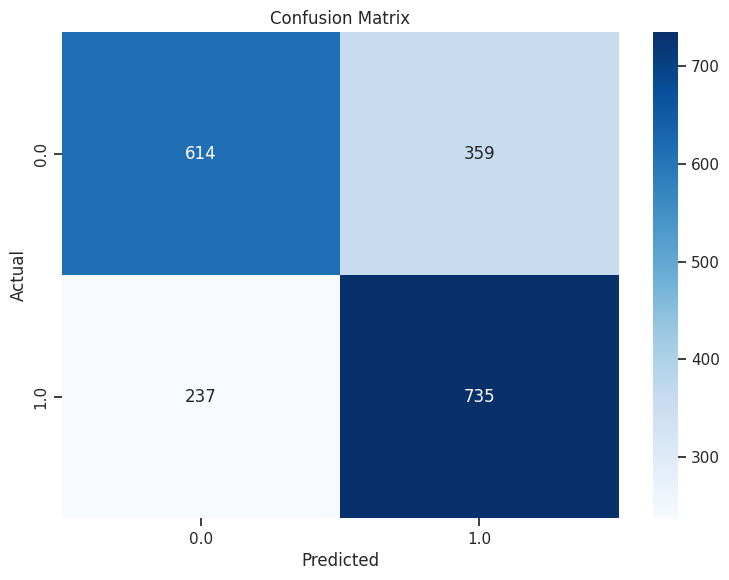

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Gaussian Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gnb_model.classes_, yticklabels=gnb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, gnb_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('GaussianNB_kfold_results.csv', index=False)

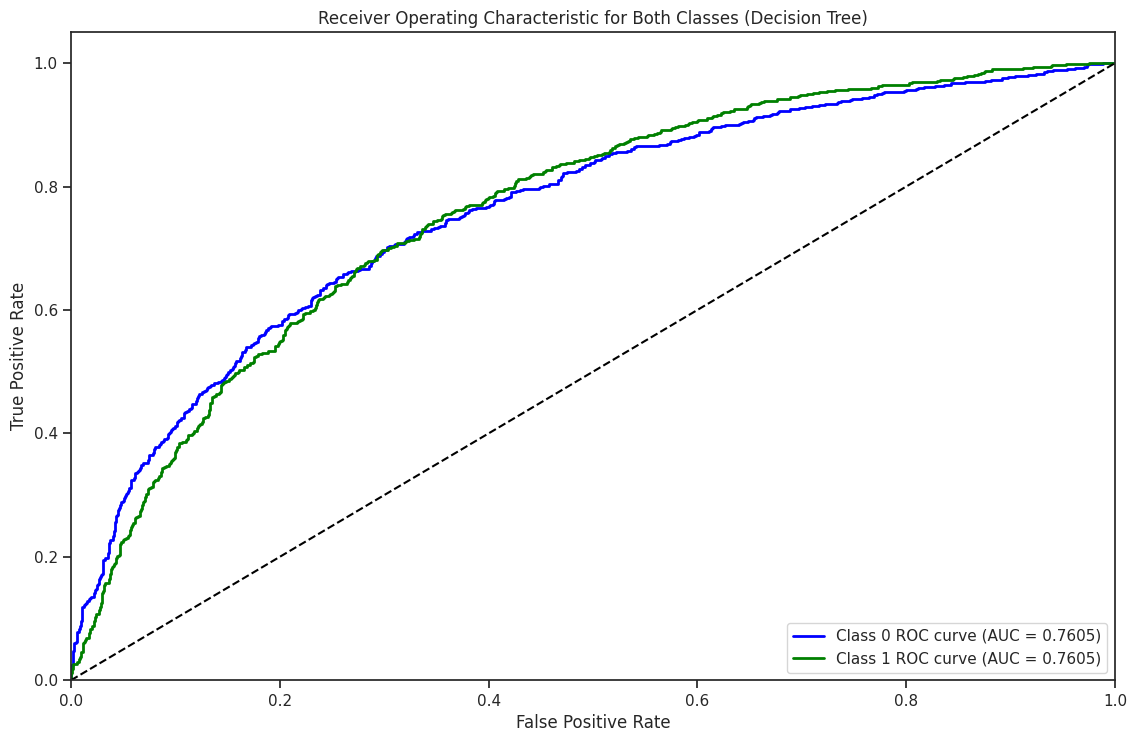

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = gnb_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


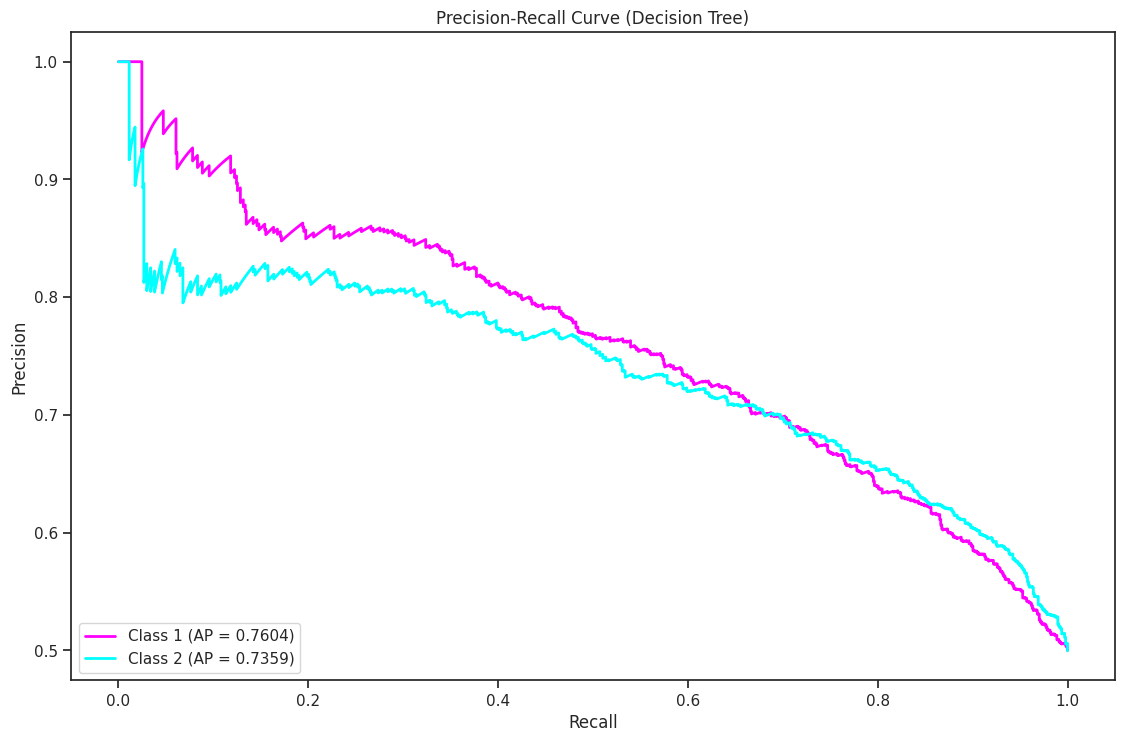

Average Precision scores:
Class 1: 0.7604481674877517
Class 2: 0.7358913108981431


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = gnb_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(gnb_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


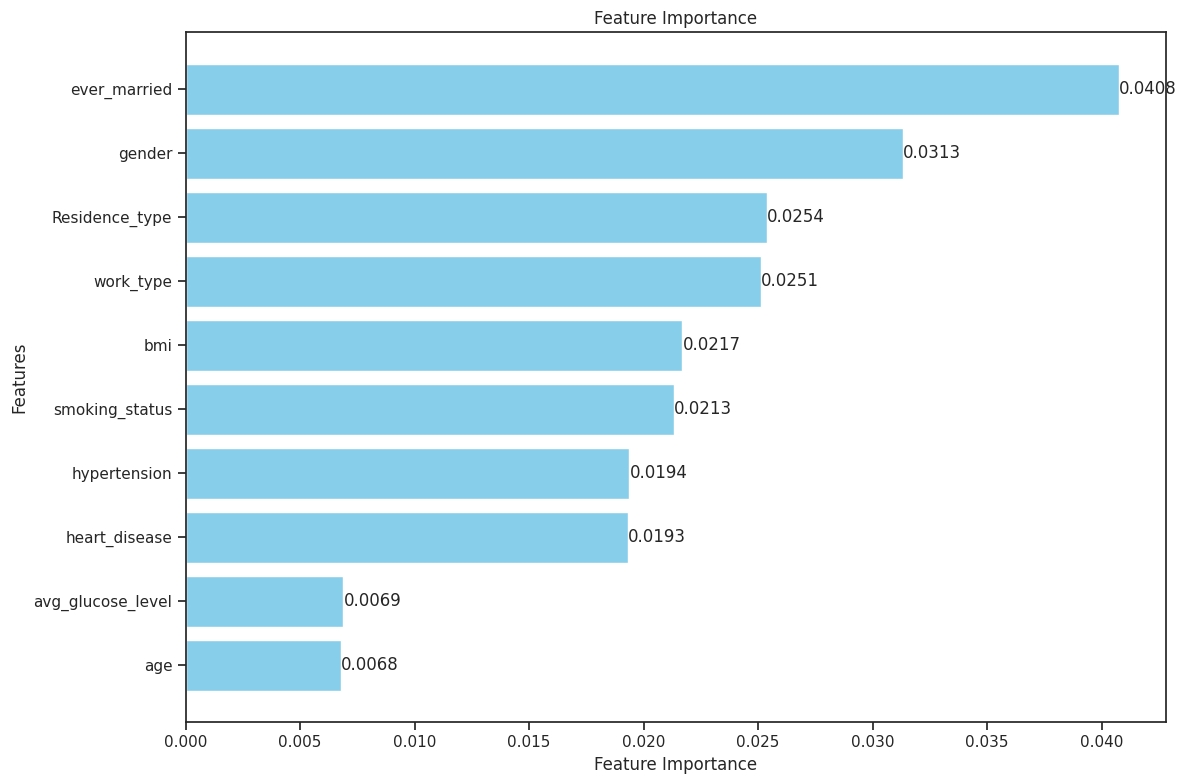

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    gnb_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# MLP

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.46      0.47       973
         1.0       0.48      0.49      0.49       972

    accuracy                           0.48      1945
   macro avg       0.48      0.48      0.48      1945
weighted avg       0.48      0.48      0.48      1945



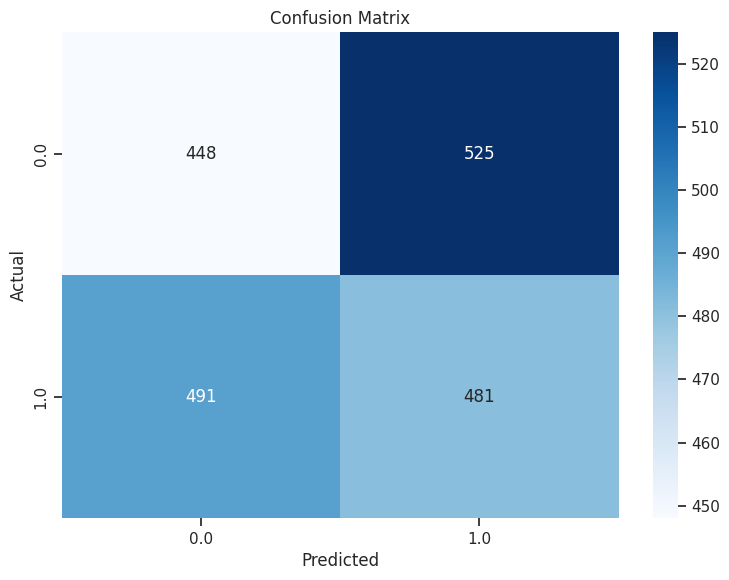

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Multilayer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=50, random_state=42)  # Adjust hyperparameters as needed
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=mlp_model.classes_, yticklabels=mlp_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, mlp_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('MLP_kfold_results.csv', index=False)

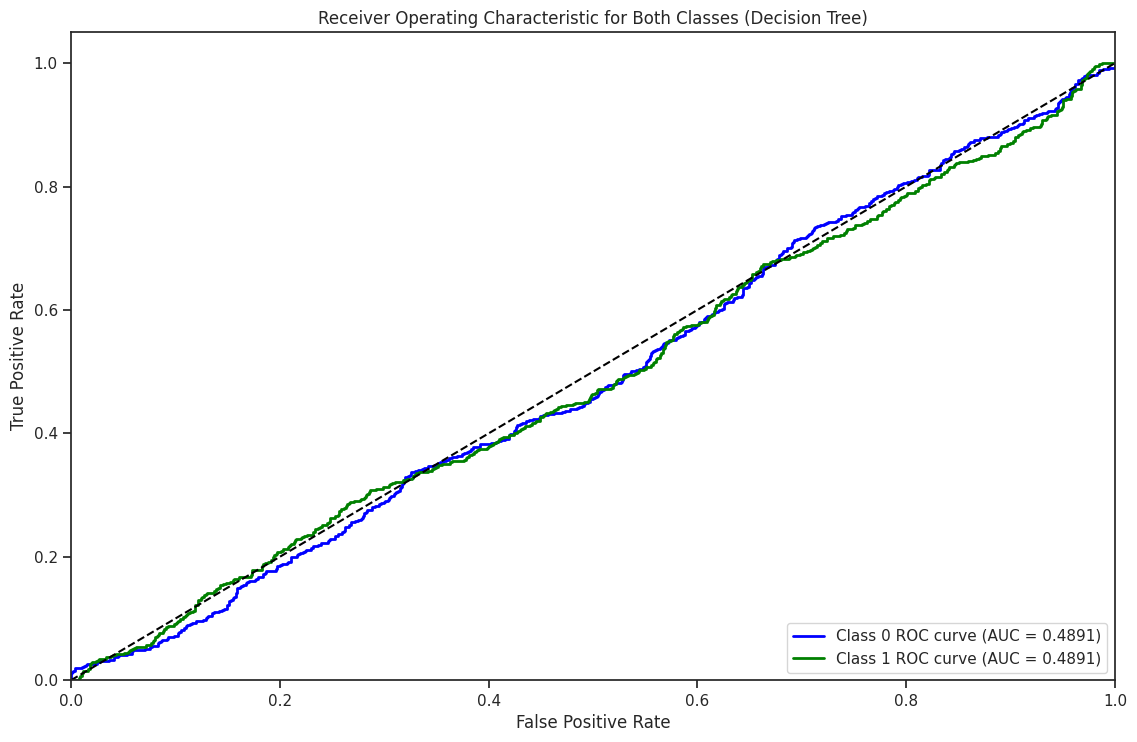

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = mlp_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


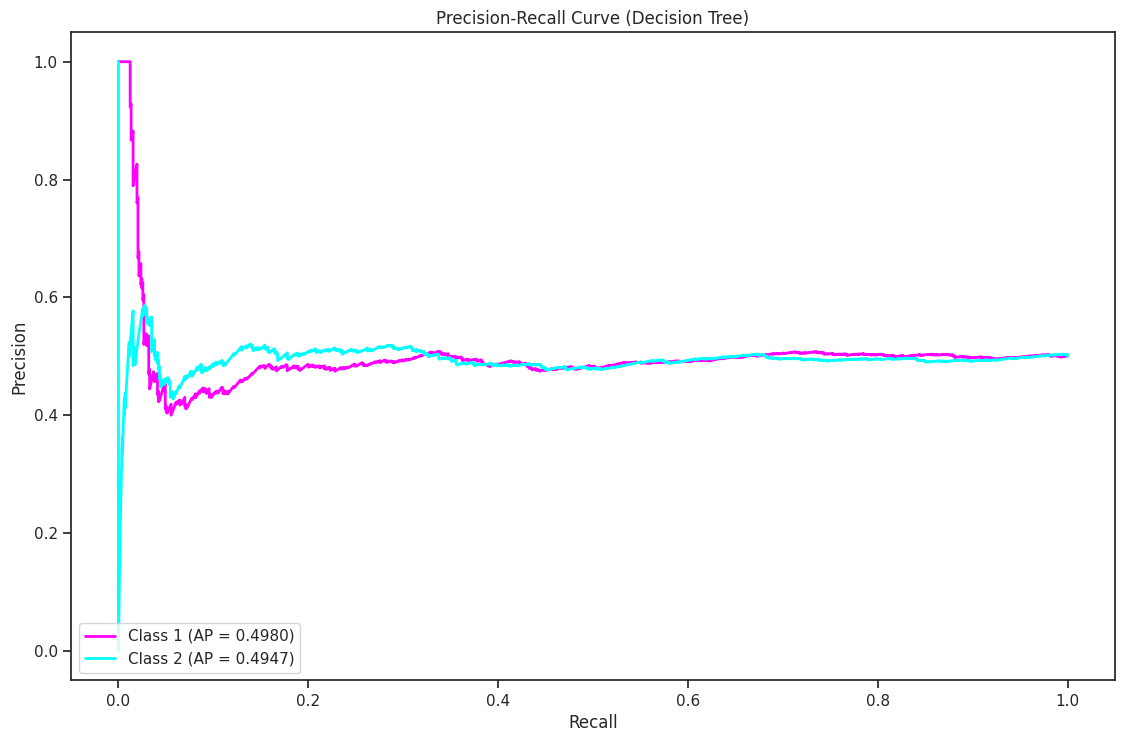

Average Precision scores:
Class 1: 0.49803124073771265
Class 2: 0.4946876585911309


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = mlp_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(mlp_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


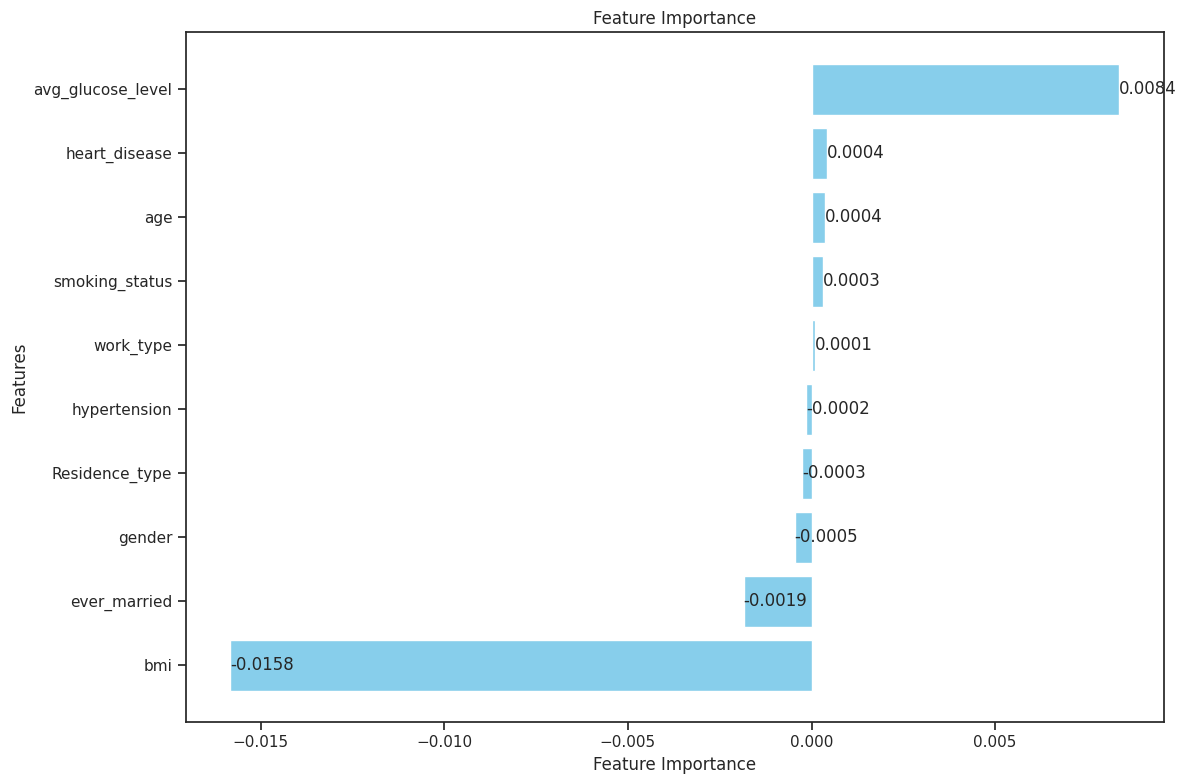

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    mlp_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# Logestic Regression

Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.53      0.54       973
         1.0       0.54      0.55      0.55       972

    accuracy                           0.54      1945
   macro avg       0.54      0.54      0.54      1945
weighted avg       0.54      0.54      0.54      1945



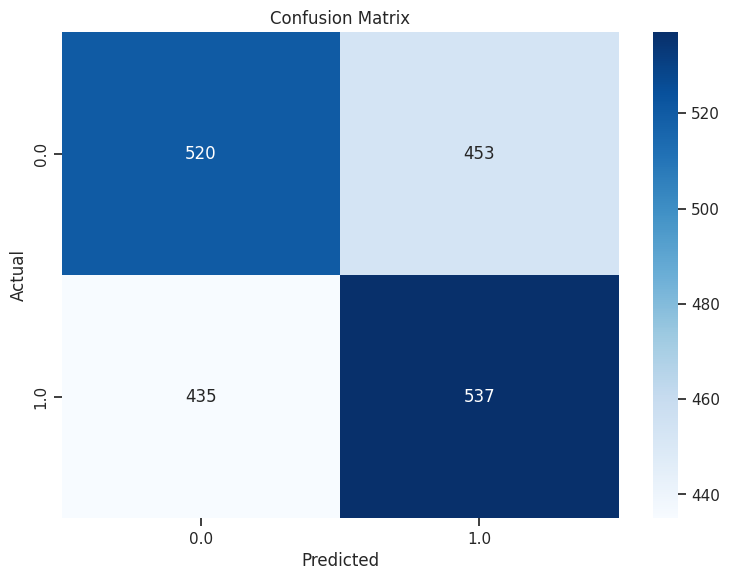

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=10)  # Adjust hyperparameters as needed
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, logistic_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('Logestic Regression_kfold_results.csv', index=False)

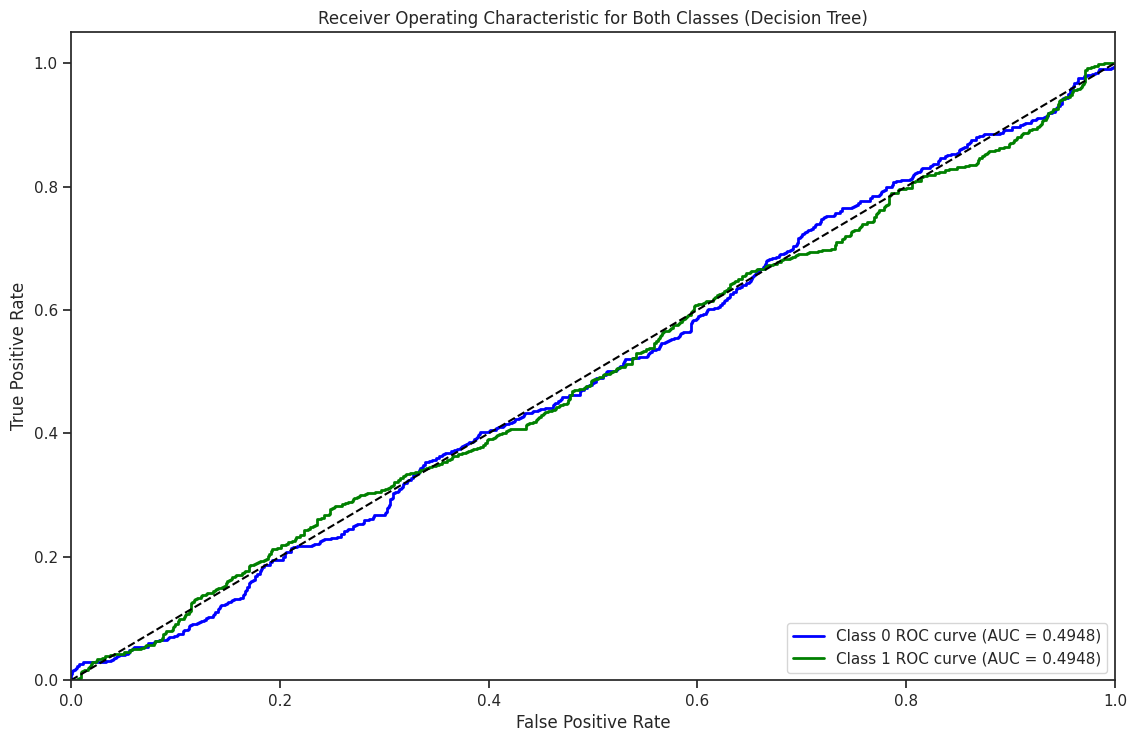

In [ ]:

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = logistic_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


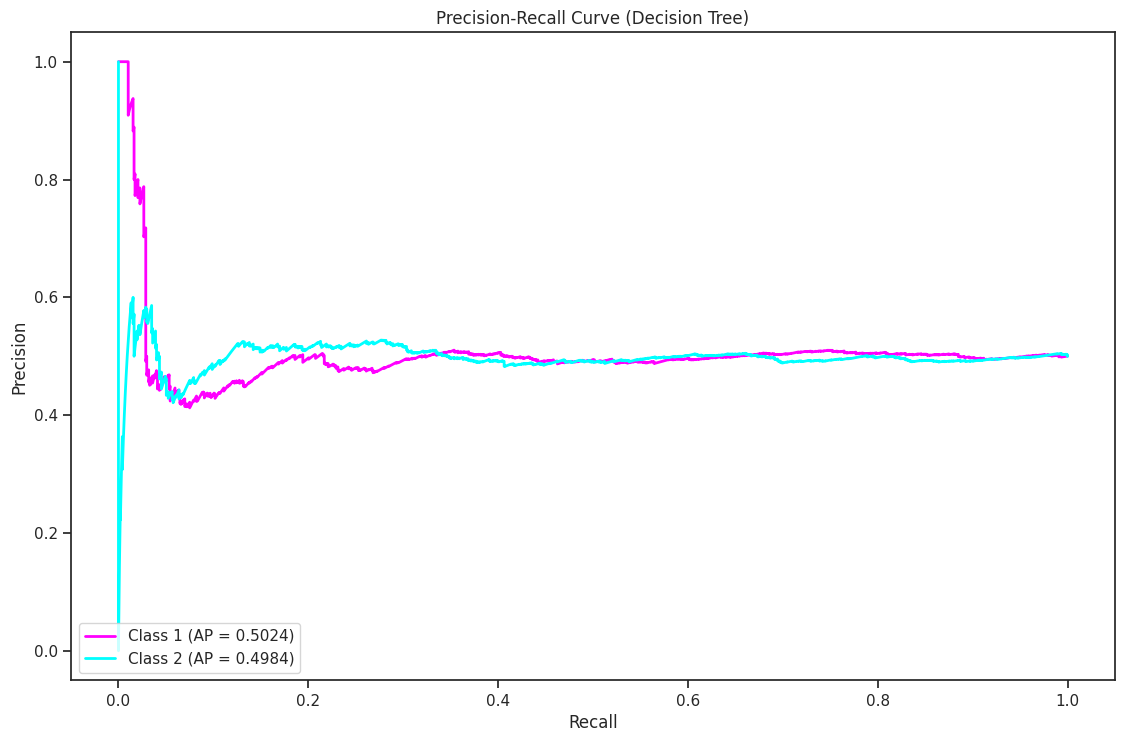

Average Precision scores:
Class 1: 0.5024304641864982
Class 2: 0.49842103677483063


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = logistic_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(mlp_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


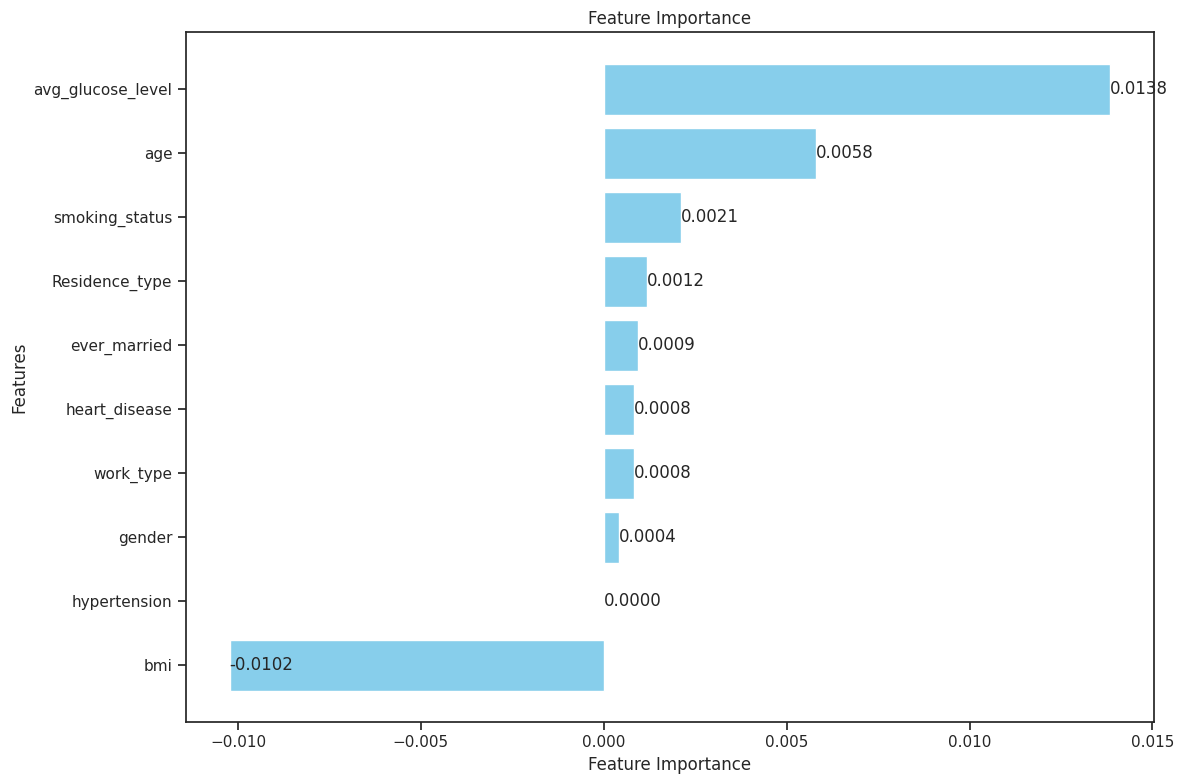

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    logistic_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# XGBOOST

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89       973
         1.0       0.86      0.94      0.90       972

    accuracy                           0.89      1945
   macro avg       0.90      0.89      0.89      1945
weighted avg       0.90      0.89      0.89      1945



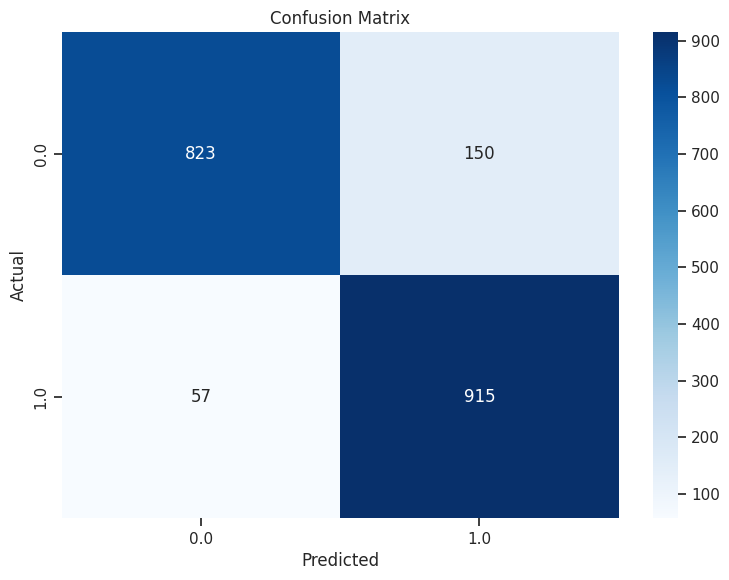

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, n_estimators=100, max_depth=200, learning_rate=0.01)  # Adjust hyperparameters as needed
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, xgb_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('XGboost_kfold_results.csv', index=False)

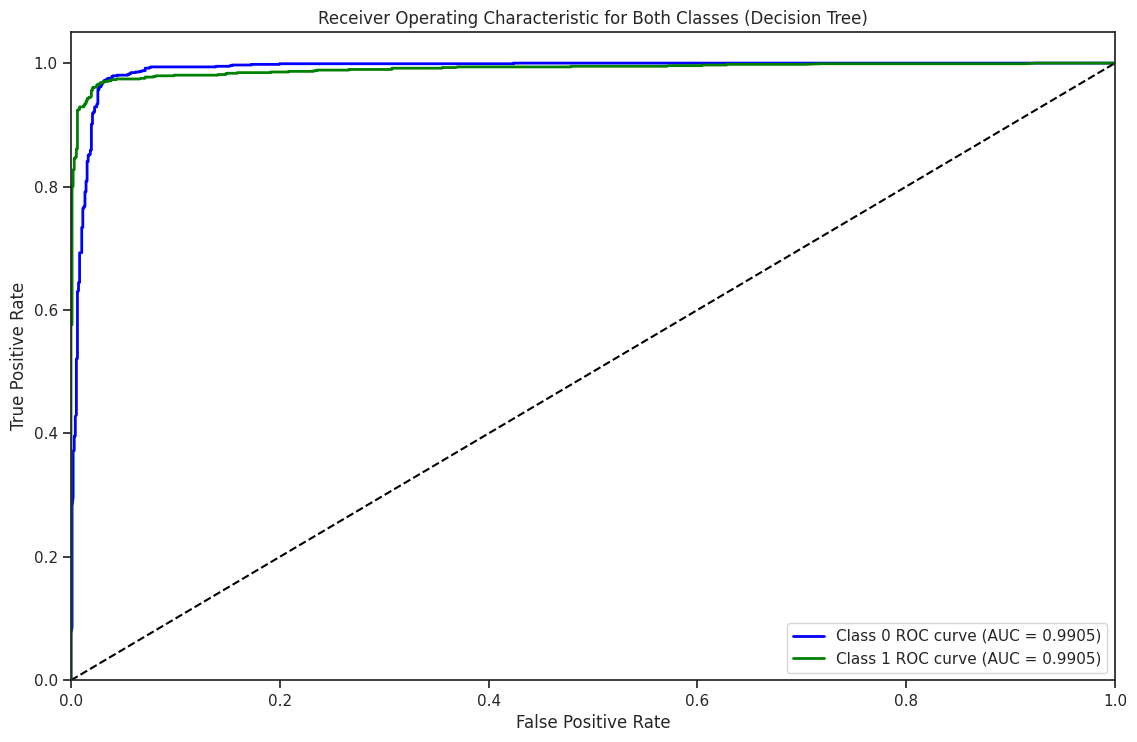

In [ ]:

y_prob = xgb_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


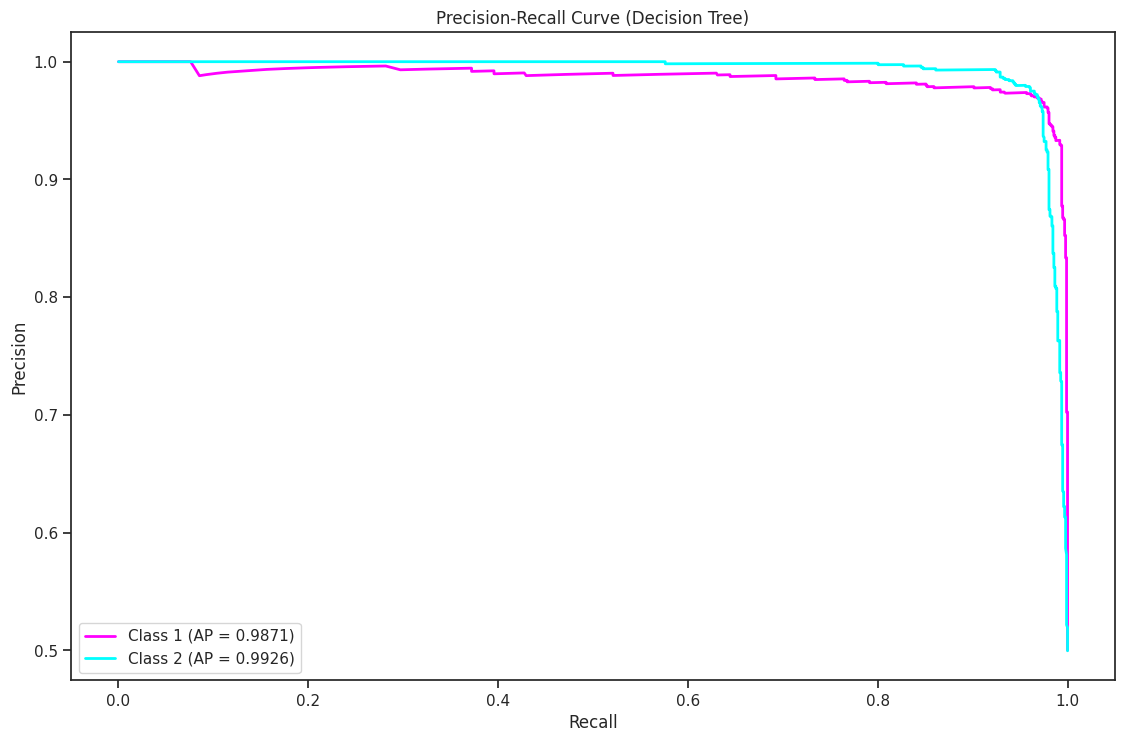

Average Precision scores:
Class 1: 0.9871062432547795
Class 2: 0.9925649125467071


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = xgb_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(xgb_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


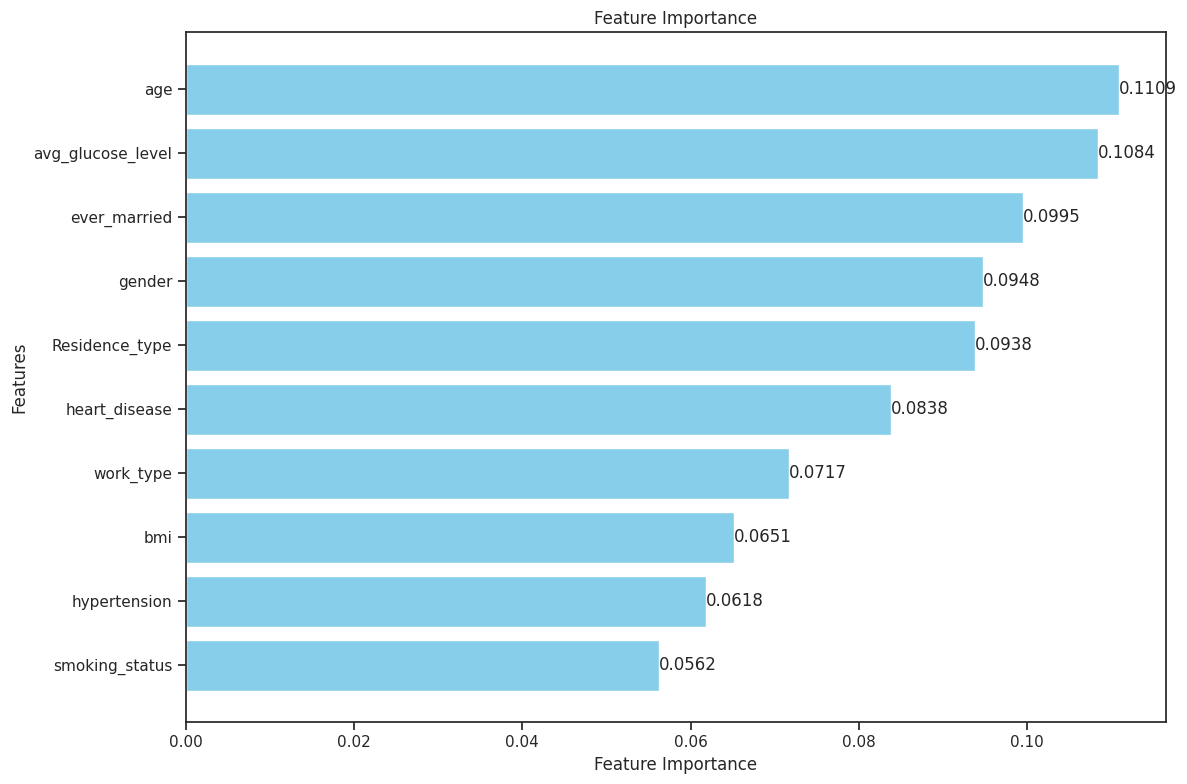

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    xgb_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# Adaboost

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.65      0.72       973
         1.0       0.71      0.85      0.78       972

    accuracy                           0.75      1945
   macro avg       0.76      0.75      0.75      1945
weighted avg       0.76      0.75      0.75      1945



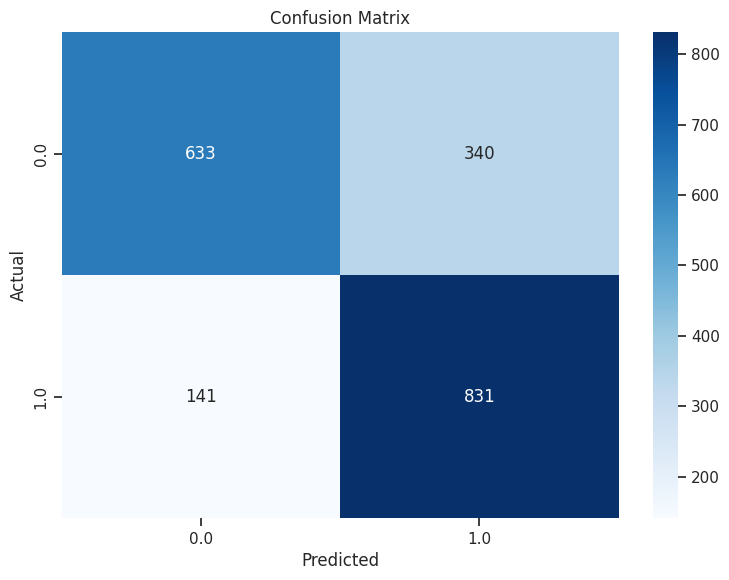

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)  # Adjust hyperparameters as needed
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, adaboost_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('ADAboost_kfold_results.csv', index=False)

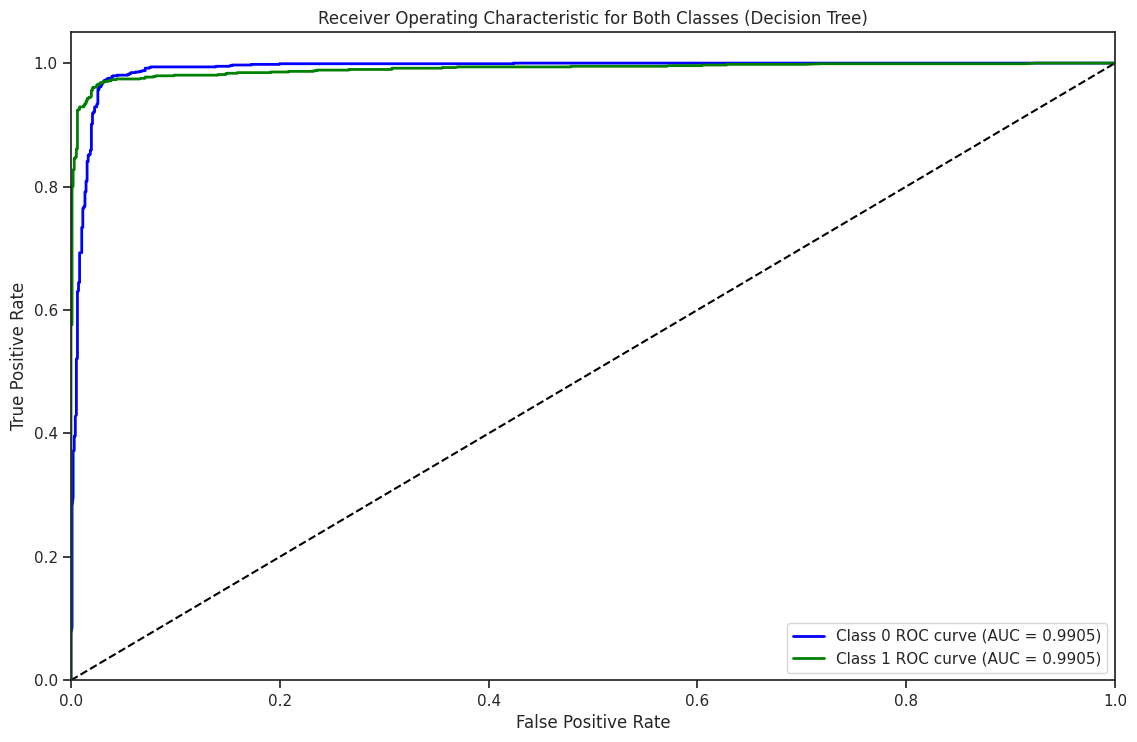

In [ ]:

y_prob = xgb_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


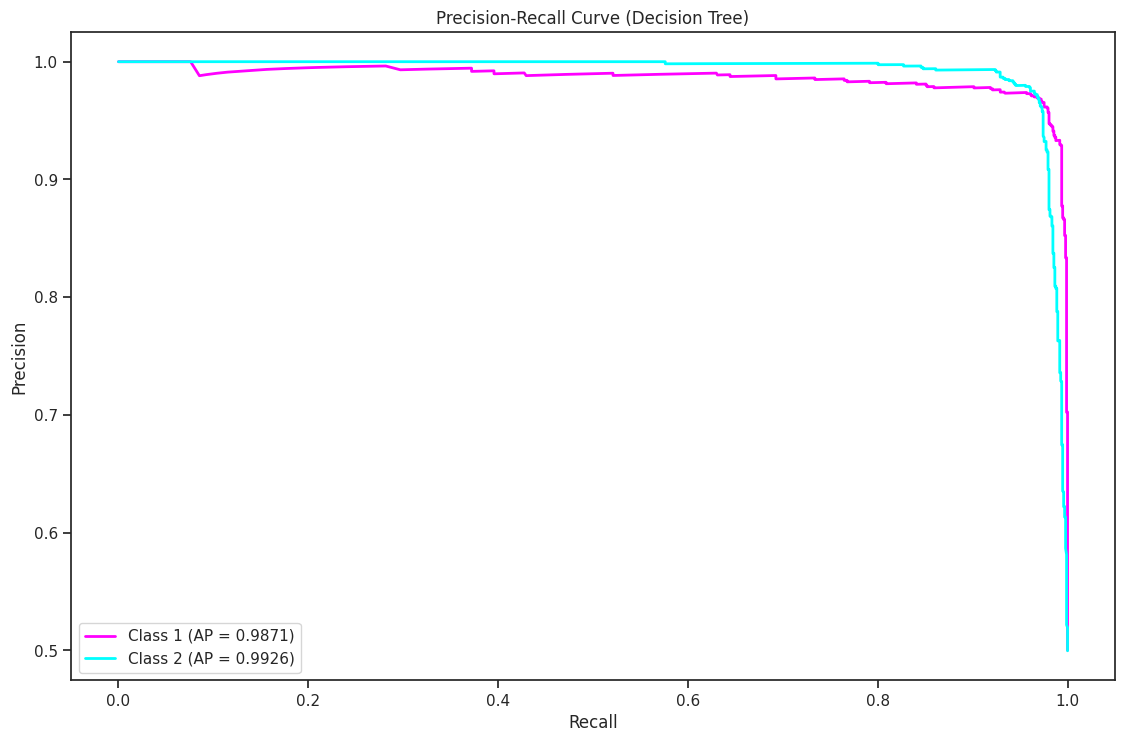

Average Precision scores:
Class 1: 0.9871062432547795
Class 2: 0.9925649125467071


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = xgb_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(xgb_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


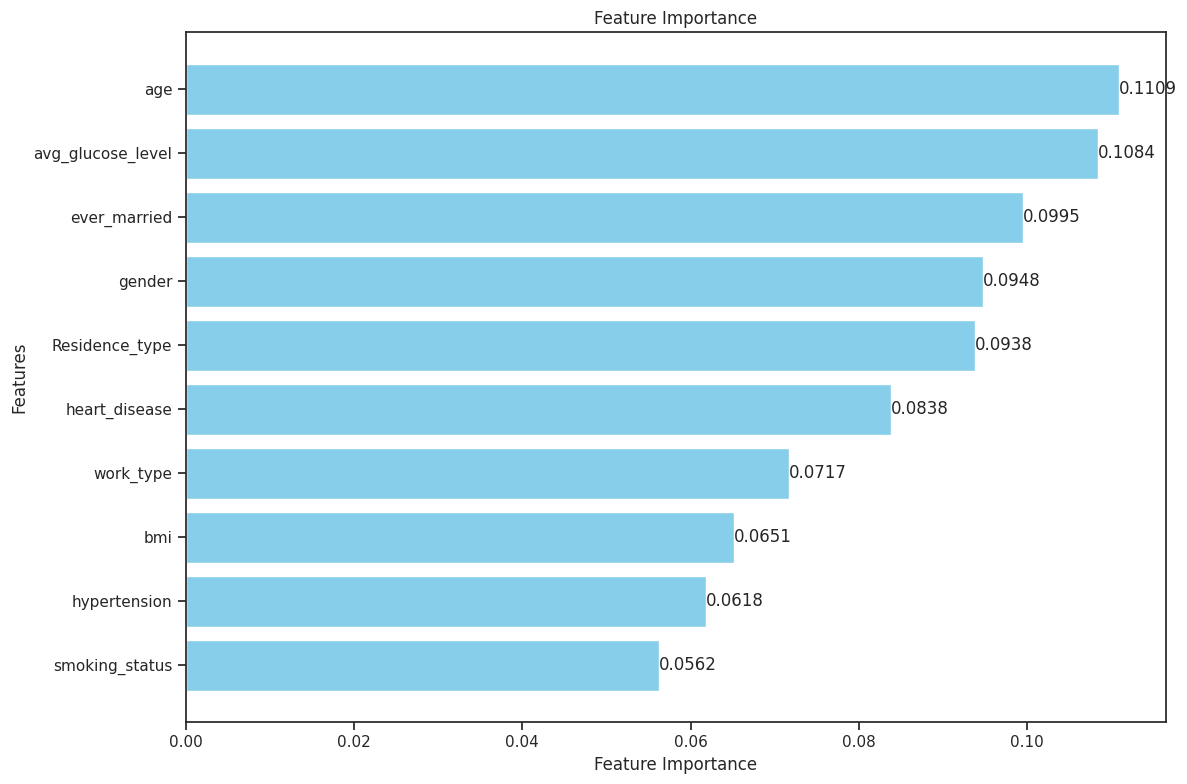

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    xgb_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# knn + random forest

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       973
         1.0       0.94      0.96      0.95       972

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



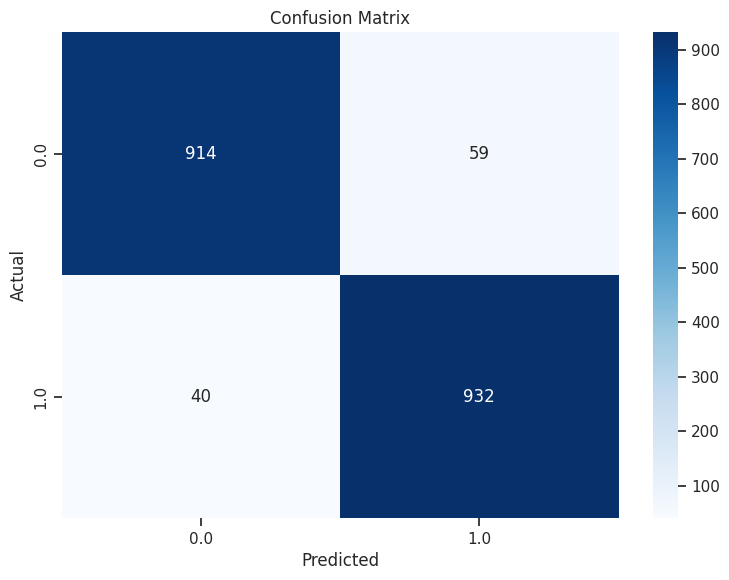

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the base models
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('knn', knn), ('rf', rf)],
    final_estimator=meta_model,
    cv=5  # Cross-validation splits
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=stacking_model.classes_, yticklabels=stacking_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, stacking_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('knn+rf_kfold_results.csv', index=False)

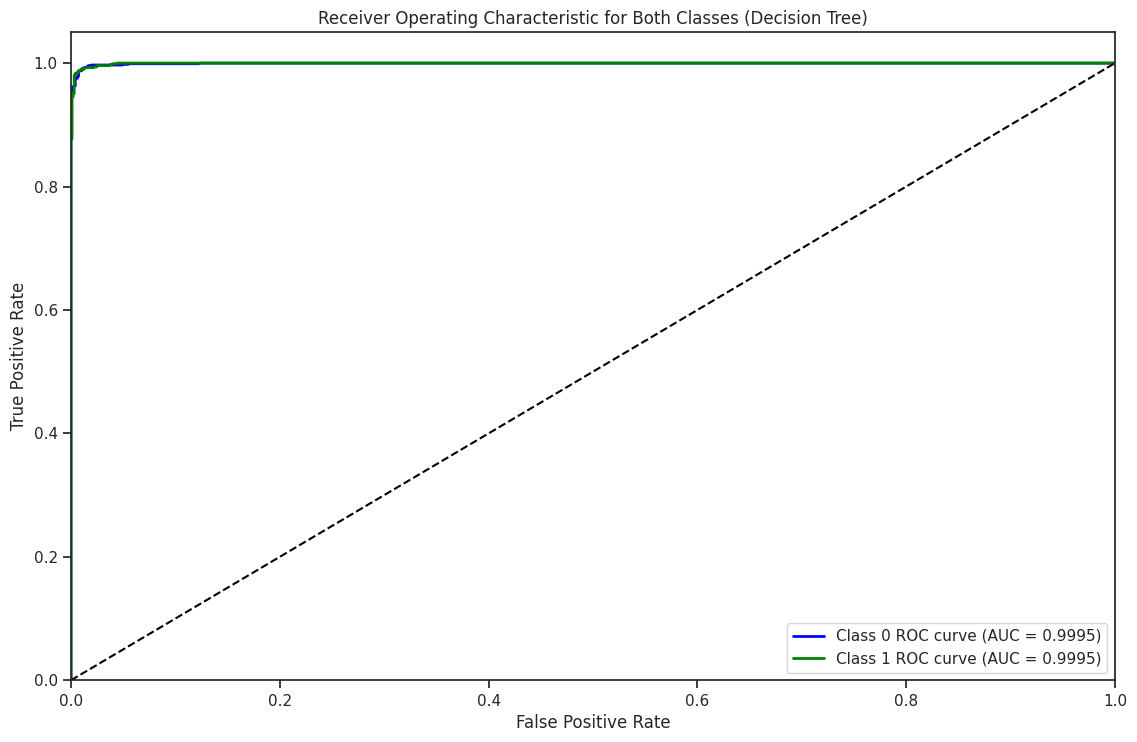

In [ ]:

y_prob = stacking_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


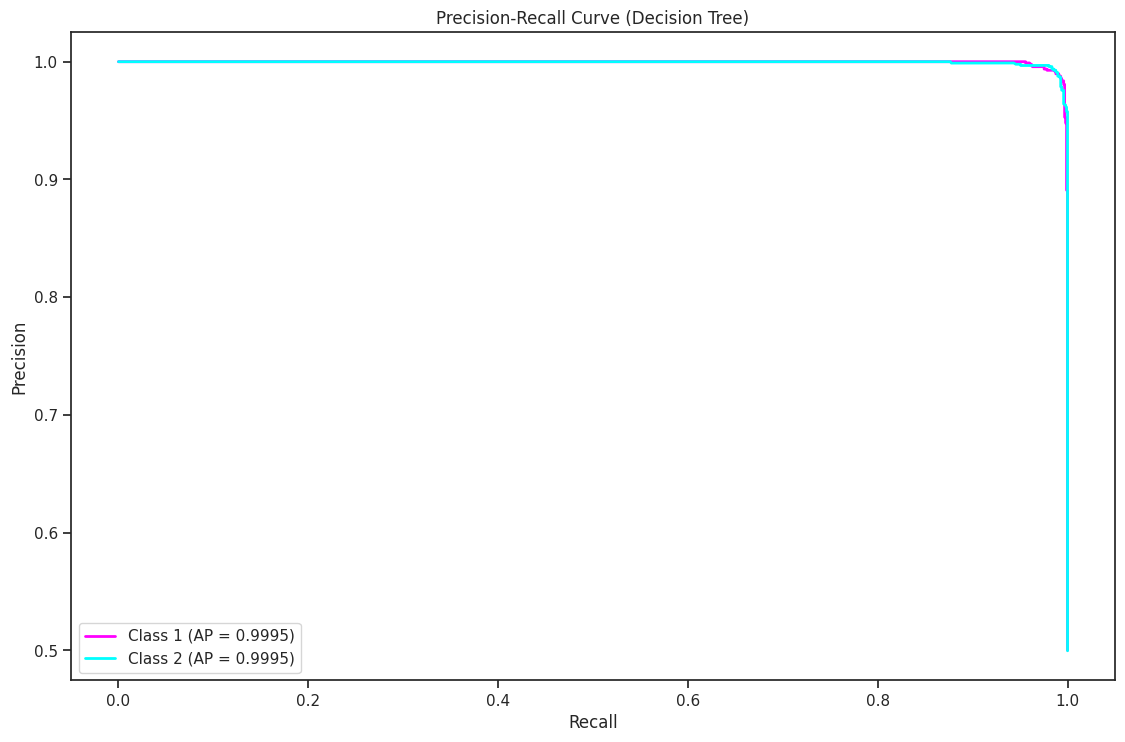

Average Precision scores:
Class 1: 0.9995062417547381
Class 2: 0.9994847678103221


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = stacking_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(stacking_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


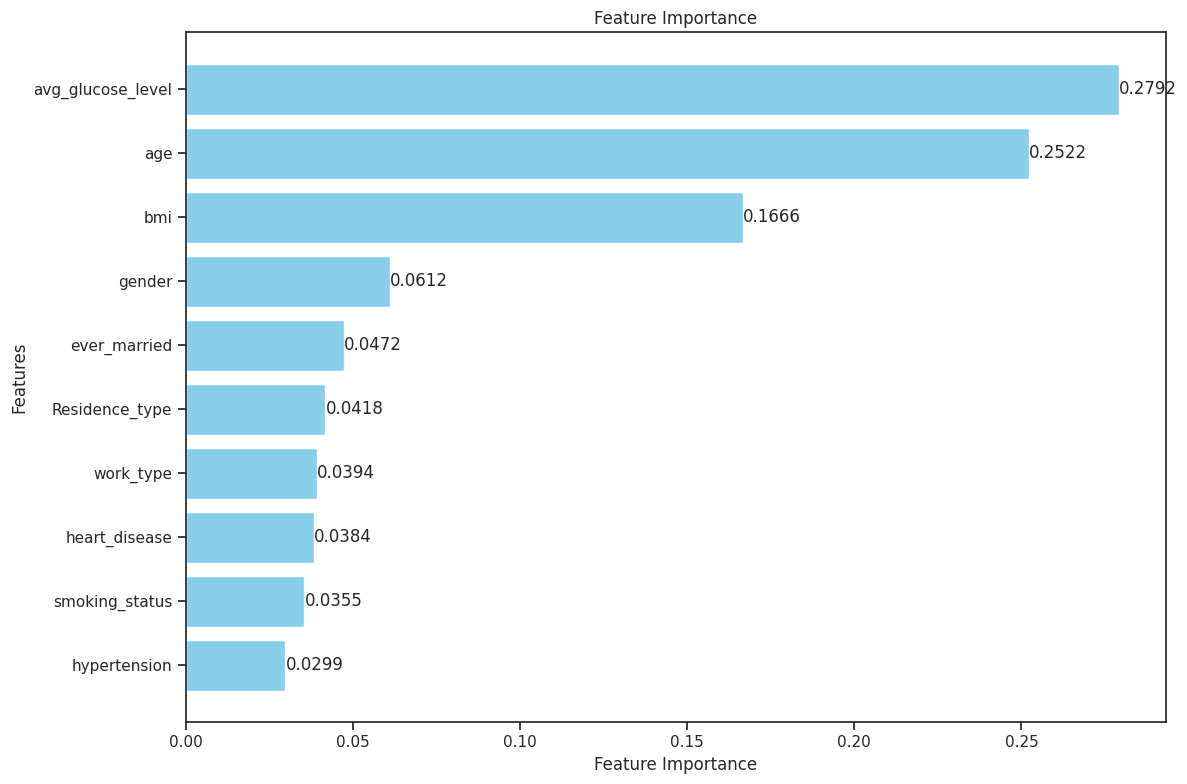

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


#knn + XGboost

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       973
         1.0       0.91      0.95      0.93       972

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



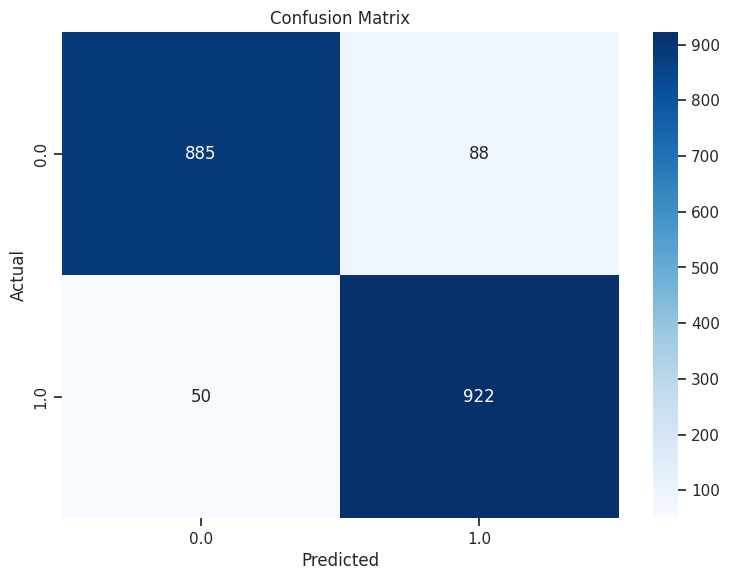

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the base models
knn = KNeighborsClassifier(n_neighbors=5)
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Initialize the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('knn', knn), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5  # Cross-validation splits
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=stacking_model.classes_, yticklabels=stacking_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, stacking_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('knn+xgb_kfold_results.csv', index=False)

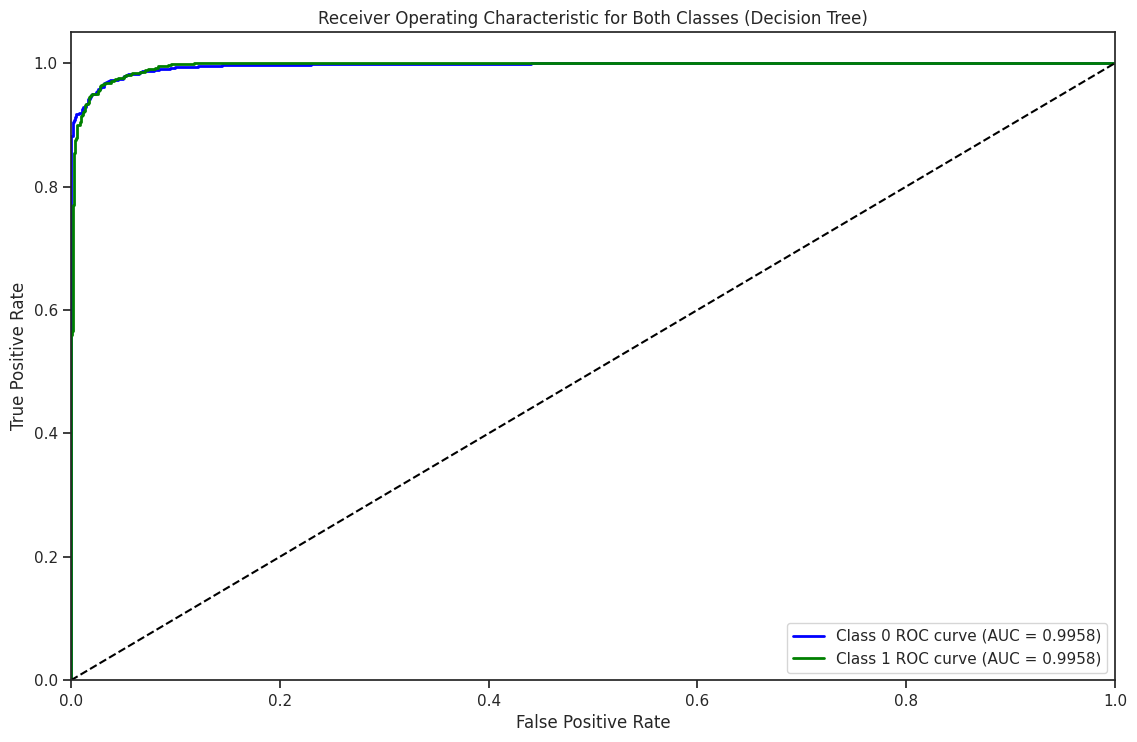

In [ ]:

y_prob = stacking_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


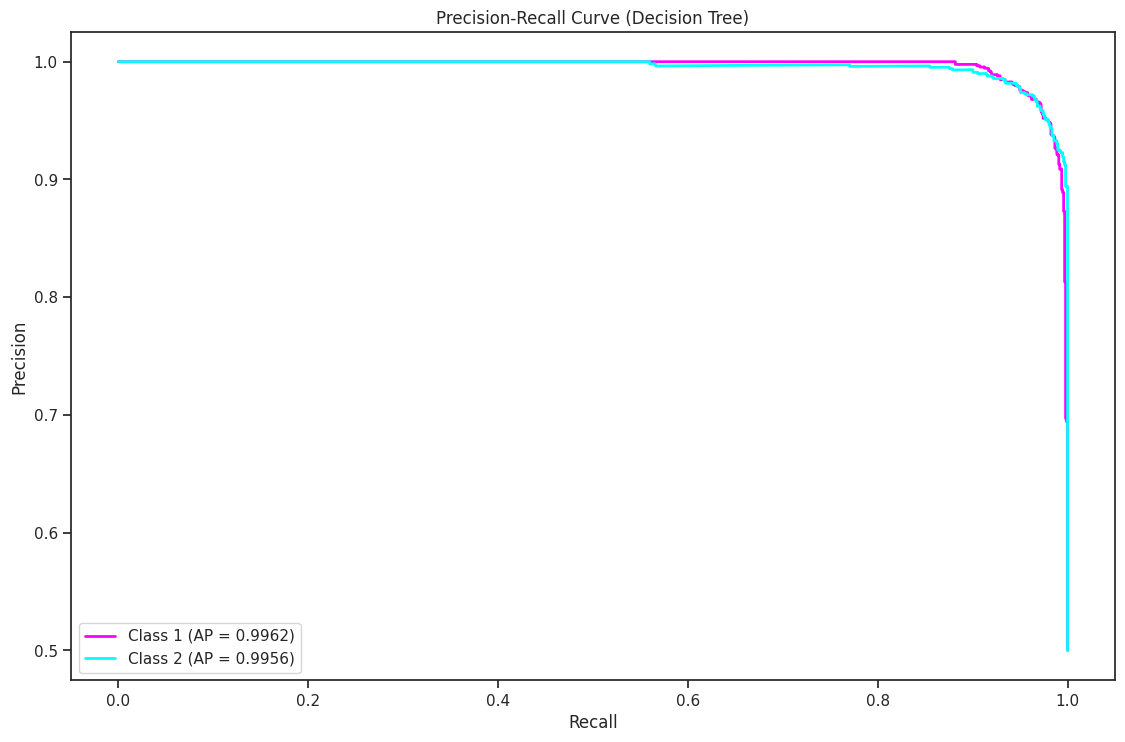

Average Precision scores:
Class 1: 0.9962075150660971
Class 2: 0.9955699251450991


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = stacking_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(stacking_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


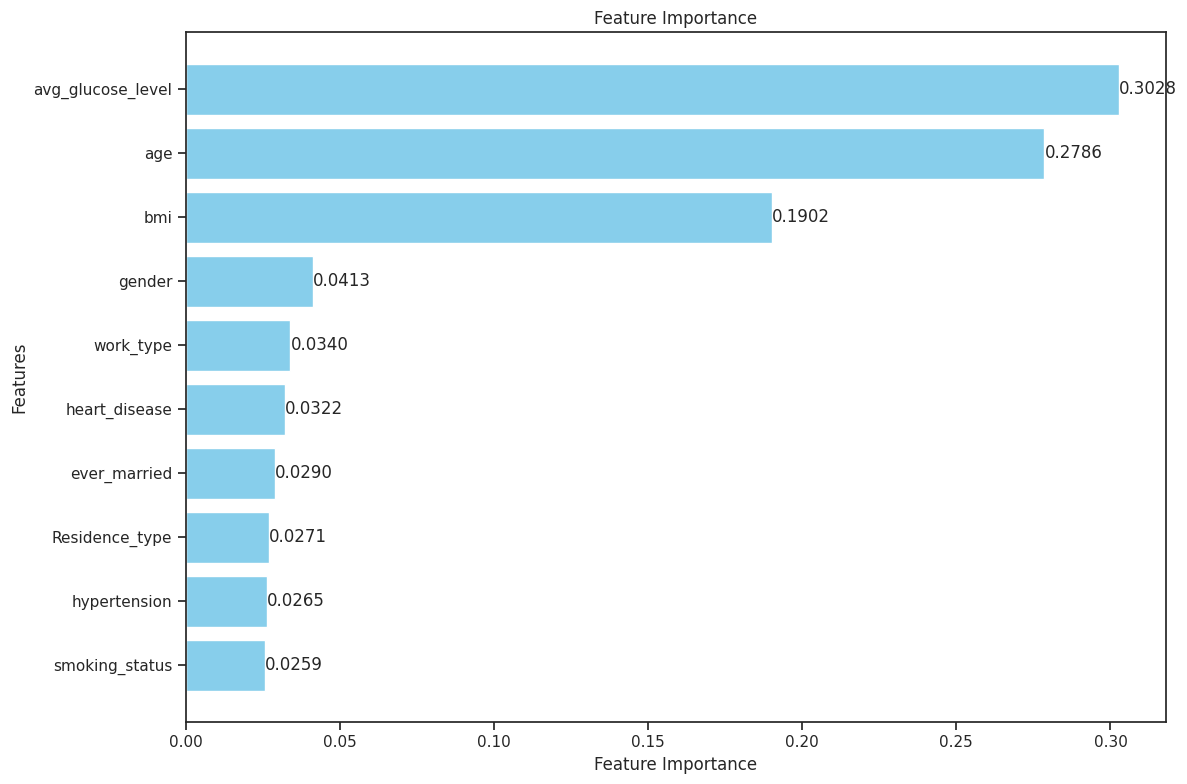

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# XGB + RF

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       973
         1.0       0.93      0.95      0.94       972

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945



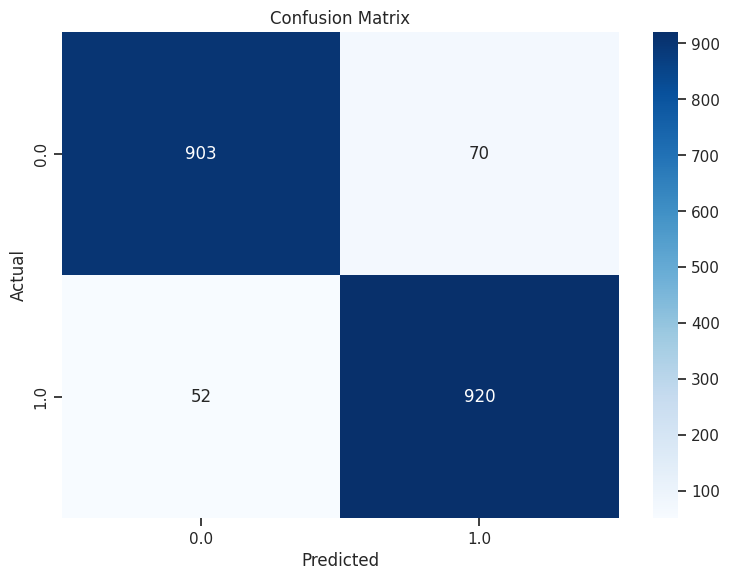

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Initialize the meta-model
meta_model = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=[('rf', rf), ('xgb', xgb)],
    final_estimator=meta_model,
    cv=5  # Cross-validation splits
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=stacking_model.classes_, yticklabels=stacking_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
results = kfold_cross_validation(X, y, stacking_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('rf+xgb_kfold_results.csv', index=False)

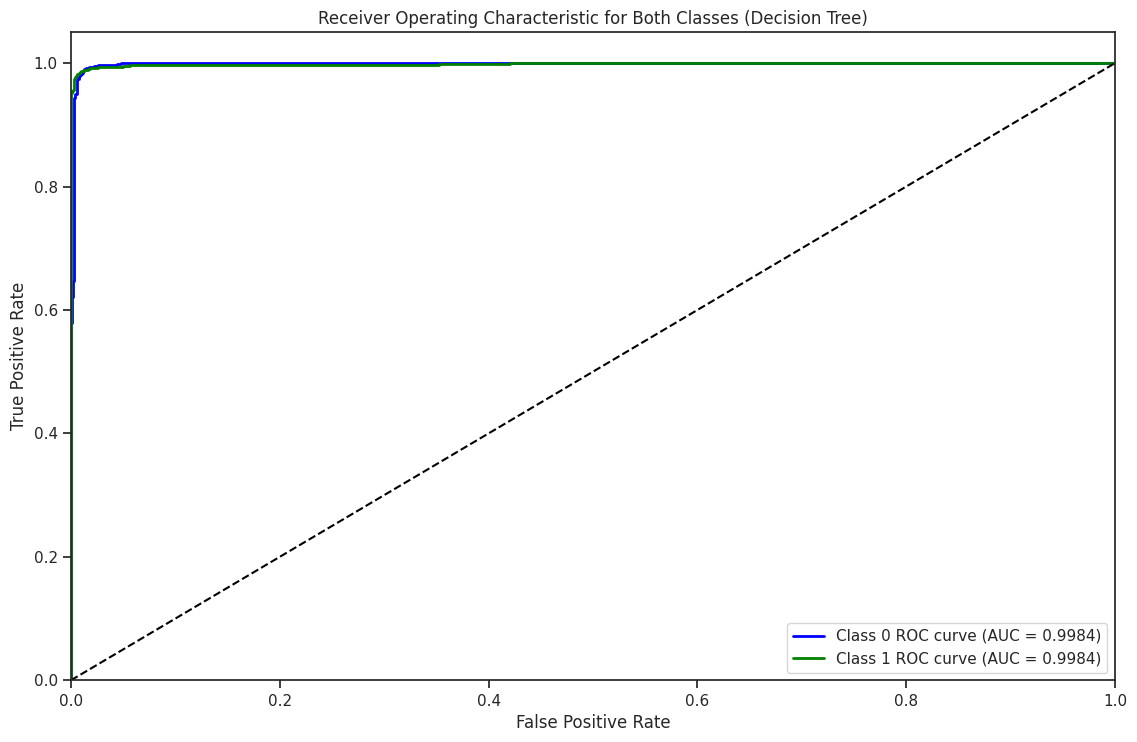

In [ ]:

y_prob = stacking_model.predict_proba(X_test)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


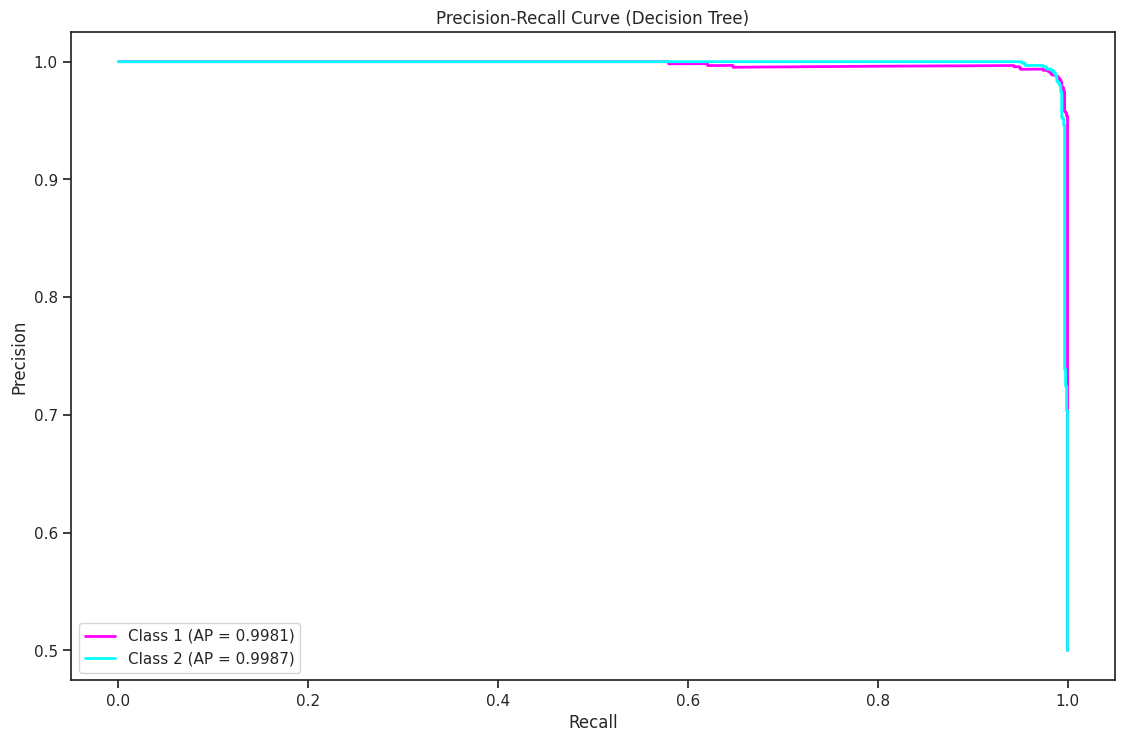

Average Precision scores:
Class 1: 0.9980909602322906
Class 2: 0.9987244394929214


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = stacking_model.predict_proba(X_test)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(stacking_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


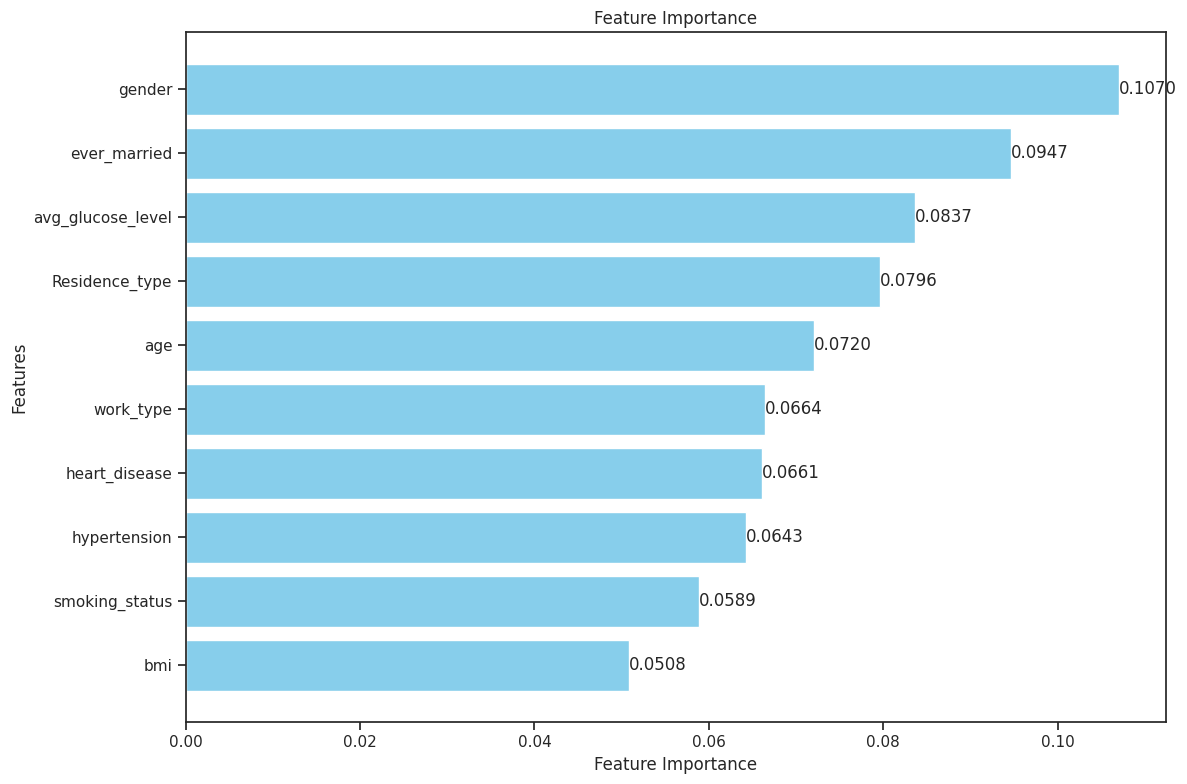

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    stacking_model, X_test, y_test, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_names = X_train.columns  # If X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12,8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()


# CNN Feature extraction

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense



# Define a Conv1D model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Ensure the model is explicitly called with input data
model.predict(X_train[:1])  # Calling the model to build its input/output structure




Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4533 - loss: 0.6949
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5121 - loss: 0.6933
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 0.6899
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - loss: 0.6872
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5421 - loss: 0.6886
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5775 - loss: 0.6764
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5688 - loss: 0.6768
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6309 - loss: 0.6593
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 0.6550
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6649 - loss: 0.6391
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6952 - loss: 0.6167
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - lo

array([[0.17876294]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 8, 32)               │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 4, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 2, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,509 (177.77 KB)

 Trainable params: 15,169 (59.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,340 (118.52 KB)

In [ ]:
# Create a model to output features from the Flatten layer

# Extract features from training data
features = model.predict(X_train)
print("Extracted features shape:", features.shape)  # Shape: (n_samples, 64)

# Example: Use extracted features for a downstream task
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the dataset
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(features, y_train, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Evaluate the classifier
y_pred_rf = rf_model.predict(X_test_rf)
print("Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Extracted features shape: (1000, 1)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       101
           1       0.99      1.00      0.99        99

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



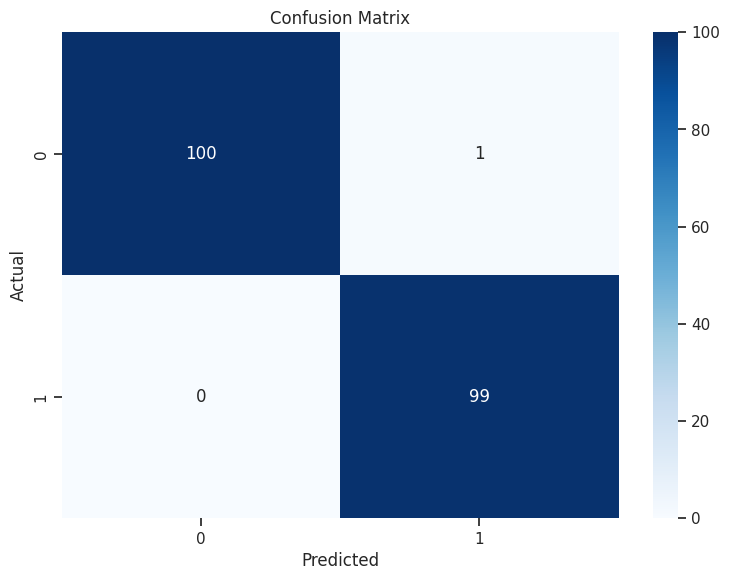

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Make predictions on the test set
y_pred = rf_model.predict(X_test_rf)



# Confusion Matrix
cm = confusion_matrix(y_test_rf, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    tnr = tn / (tn + fp) if (tn + fp) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) != 0 else 0
    return accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr

def kfold_cross_validation(X, y, model, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        # Use slicing instead of .iloc
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr = calculate_metrics(y_test, y_pred)
        results.append([fold + 1, accuracy, precision, recall, f1, kappa, tpr, tnr, fpr, fnr])
    return results

# Run k-fold cross-validation
results = kfold_cross_validation(features, y_train, rf_model, n_splits=5)

# Convert results to a DataFrame and save to CSV
results_df = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'Kappa', 'TPR', 'TNR', 'FPR', 'FNR'])
results_df.to_csv('CNN+Random_forest_kfold_results.csv', index=False)


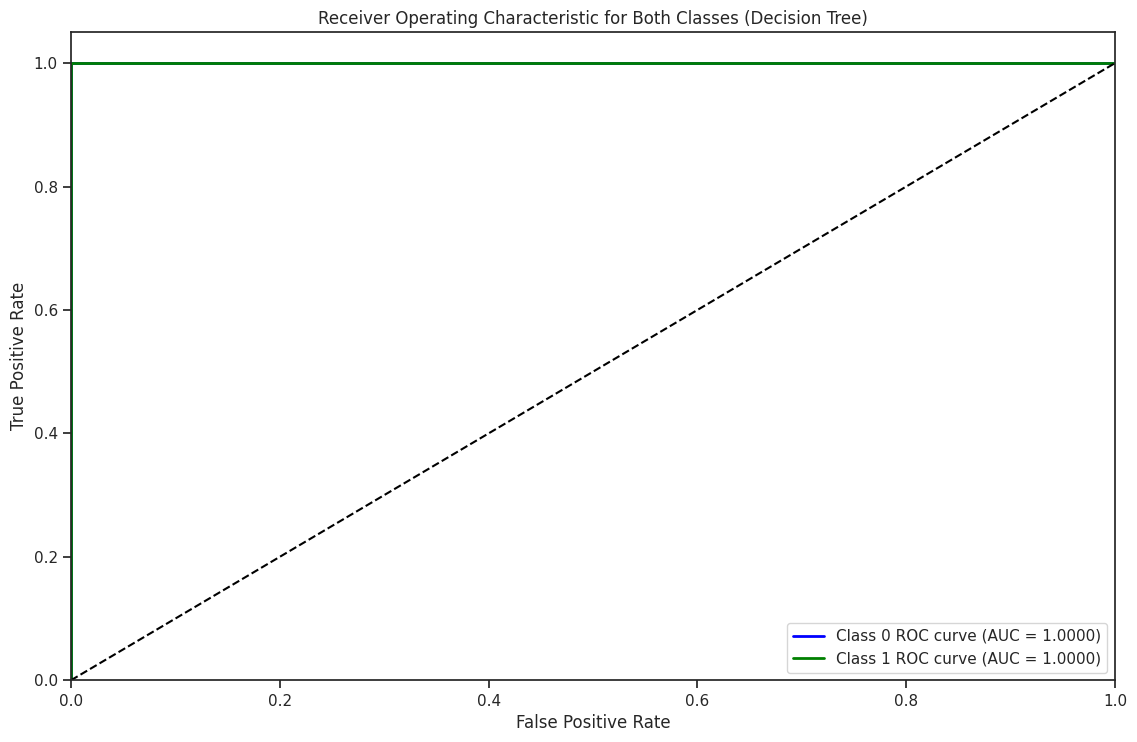

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# # Initialize the Decision Tree model
# dt_model = DecisionTreeClassifier(random_state=42)

# # Train the model on the training data
# dt_model.fit(X_train, y_train)

# Get predicted probabilities for both classes
y_prob = rf_model.predict_proba(X_test_rf)

# Calculate ROC curve and AUC for class 0
fpr_0, tpr_0, _ = roc_curve(y_test_rf, y_prob[:, 0], pos_label=0)
roc_auc_0 = auc(fpr_0, tpr_0)

# Calculate ROC curve and AUC for class 1
fpr_1, tpr_1, _ = roc_curve(y_test_rf, y_prob[:, 1], pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Plot the ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'Class 0 ROC curve (AUC = {roc_auc_0:.4f})')
plt.plot(fpr_1, tpr_1, color='green', lw=2, label=f'Class 1 ROC curve (AUC = {roc_auc_1:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Both Classes (Decision Tree)')
plt.legend(loc="lower right")
plt.show()


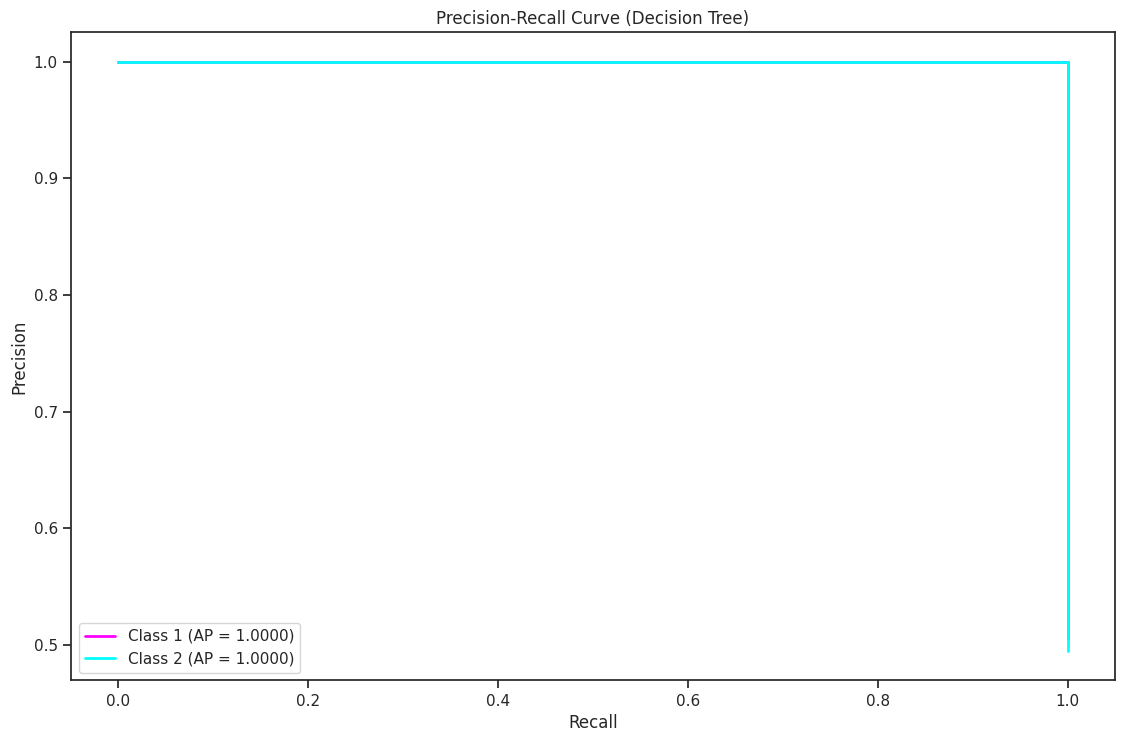

Average Precision scores:
Class 1: 1.0
Class 2: 1.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming `classes` is a list of class names
# Get predicted probabilities for each class
y_probs = rf_model.predict_proba(X_test_rf)  # Use the Decision Tree model's probabilities

# Get the true labels
y_true = y_test_rf

# Calculate precision-recall curve and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

n_classes = len(rf_model.classes_)  # Number of classes in the Decision Tree model

for i in range(n_classes):
    # Binarize the labels for each class (one-vs-rest)
    precision[i], recall[i], _ = precision_recall_curve(
        (y_true == i).astype(int), y_probs[:, i]
    )
    average_precision[i] = average_precision_score(
        (y_true == i).astype(int), y_probs[:, i]
    )

# Plot the PR curve for each class
plt.figure(figsize=(12, 8))
vibrant_colors = ['magenta', 'cyan', 'lime', 'orange']  # Adjust colors as needed for classes

for i, color in zip(range(n_classes), vibrant_colors[:n_classes]):
    plt.plot(
        recall[i],
        precision[i],
        lw=2,
        color=color,
        label=f"Class {i+1} (AP = {average_precision[i]:.4f})",
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Decision Tree)")
plt.legend(loc="lower left")
plt.show()

# Print average precision scores for each class
print("Average Precision scores:")
for i, score in average_precision.items():
    print(f"Class {i+1}: {score}")


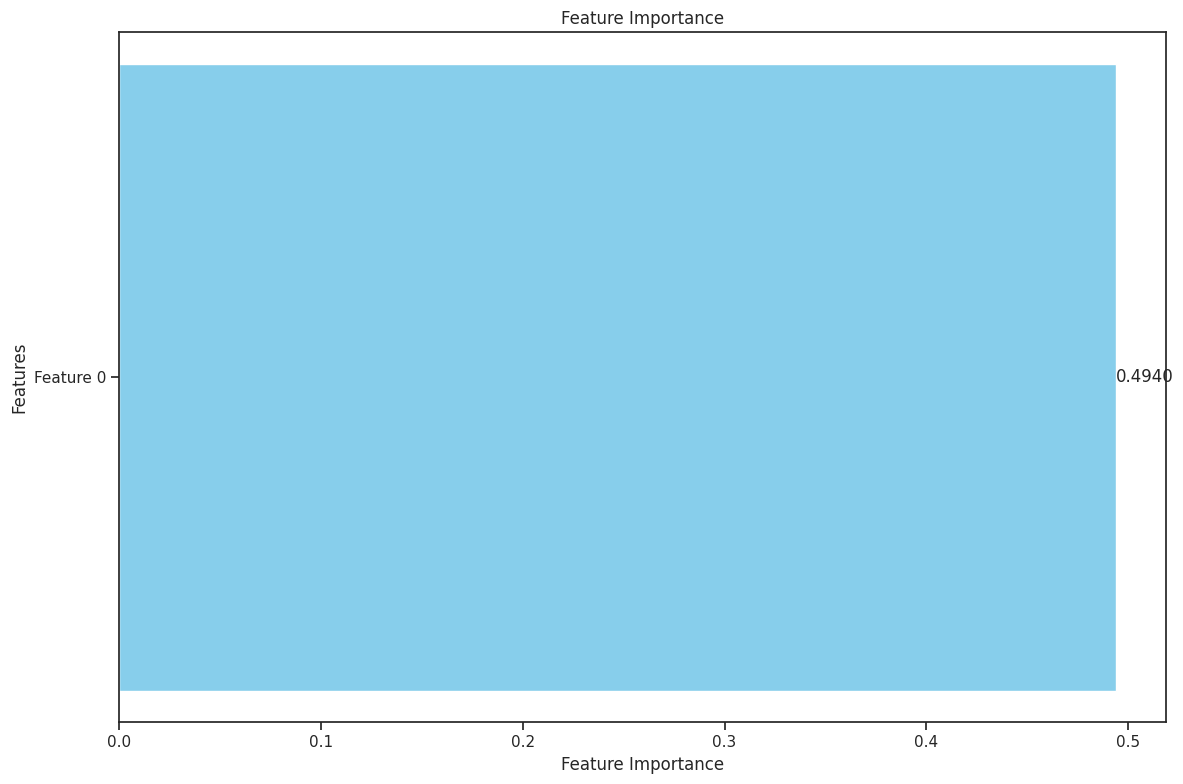

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt

# If your original data was a DataFrame, ensure you save the column names
# Replace this with your actual feature names
feature_names = [f'Feature {i}' for i in range(features.shape[1])]

# Step 1: Perform permutation importance with the scoring parameter
scoring_function = 'accuracy'  # Use 'accuracy' for classification problems
result = permutation_importance(
    rf_model, X_test_rf, y_test_rf, n_repeats=10, random_state=42, scoring=scoring_function
)

# Step 2: Create a DataFrame with feature names and importance scores
importances = result.importances_mean
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Step 3: Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importances
plt.figure(figsize=(12, 8))

plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To have the most important feature at the top

# Add the importance scores as text annotations
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.tight_layout()
plt.show()
